In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 한글폰트 설정 (실행 후 런타임 다시 시작하고 다시 실행하면 한글폰트 적용 가능) -> colab 기준, jupyter 사용시 문의바람
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [3]:
total_df = pd.read_csv('/content/drive/Shareddrives/[GH x RiderDash]/Data/raw_data/W_total.csv')
total_df

,Unnamed: 0,regist_dt,car,store,store_addr,price,pay_kind,by_dealer,product_1,product_2,product_3,product_4,product_5,product_6
0,0,20201231165209,렉스턴,21312de55841d2c624d4873b1f13d1f5,서울 영등포구 신길동1155,650000,1,0,101.0,101.0,101.0,101.0,102.0,101.0
1,1,20201231164930,K7,bb6a02da9253f463cbbdecf49352246a,대덕구 중리동 394-16,500000,1,0,85.0,85.0,NaN,85.0,87.0,NaN
2,2,20201231164557,투싼,f87010f9e1357101908204837a9f05fd,경남 창원시 성산구,500000,1,0,284.0,284.0,284.0,284.0,285.0,NaN
3,3,20201231154431,기아 4세대 카니발 KA4,3b1de9448312d7ae5811d04787b27fb9,전북 익산시 어곳2길,700000,2,0,84.0,84.0,NaN,84.0,87.0,NaN
4,4,20201231145042,QM6,5fb9e60a3686436567a032d93539f07c,인천광역시 부평구 부평북로,500000,1,0,284.0,284.0,NaN,284.0,285.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395884,395884,20180101211409,코나,9066e4eaf0847da687522158d39a212d,충북 청주시 청원구,810000,1,0,35.0,35.0,NaN,35.0,27.0,27.0
395885,395885,20180101174328,스포티지QL,53813806d052950f7838d65a1c810dee,광주시 서구 상무대로,410000,1,0,31.0,31.0,NaN,31.0,37.0,NaN
395886,395886,20180101141541,GLE,75951c44e1785f1a8b38bbe0ac306a3f,대전시 유성구 복용동,590000,1,0,23.0,27.0,NaN,27.0,NaN,NaN
395887,395887,20180101140030,티볼리,52251649fb0a77f0a0b0bb57f37d1473,대전시 유성구 관들1길,580000,1,0,35.0,35.0,NaN,35.0,150.0,NaN


In [4]:
# 차 이름 - 모델 매칭 테이블 불러오기
name = pd.read_csv('/content/drive/Shareddrives/[GH x RiderDash]/Data/Preprocessing/all_cars(modified).csv')
name.head()

,Unnamed: 0,name,model,maker,prefix,postfix,kind
0,0,렉스턴,렉스턴,쌍용,0,0,['Mid-Large suv']
1,1,K7,K7,기아,0,0,['Sedan']
2,2,투싼,투싼,현대,0,0,['Mid-Large suv']
3,3,기아 4세대 카니발 KA4,카니발,기아,0,0,['van']
4,4,QM6,QM6,르노삼성,0,0,['Mid-Large suv']


In [5]:
# 차 이름 - 모델 매칭 테이블과 조인
total_df = total_df.merge(name[['name', 'model', 'maker','kind']], left_on = 'car', right_on = 'name', how = 'left')
total_df.head()

,Unnamed: 0,regist_dt,car,store,store_addr,price,pay_kind,by_dealer,product_1,product_2,product_3,product_4,product_5,product_6,name,model,maker,kind
0,0,20201231165209,렉스턴,21312de55841d2c624d4873b1f13d1f5,서울 영등포구 신길동1155,650000,1,0,101.0,101.0,101.0,101.0,102.0,101.0,렉스턴,렉스턴,쌍용,['Mid-Large suv']
1,1,20201231164930,K7,bb6a02da9253f463cbbdecf49352246a,대덕구 중리동 394-16,500000,1,0,85.0,85.0,NaN,85.0,87.0,NaN,K7,K7,기아,['Sedan']
2,2,20201231164557,투싼,f87010f9e1357101908204837a9f05fd,경남 창원시 성산구,500000,1,0,284.0,284.0,284.0,284.0,285.0,NaN,투싼,투싼,현대,['Mid-Large suv']
3,3,20201231154431,기아 4세대 카니발 KA4,3b1de9448312d7ae5811d04787b27fb9,전북 익산시 어곳2길,700000,2,0,84.0,84.0,NaN,84.0,87.0,NaN,기아 4세대 카니발 KA4,카니발,기아,['van']
4,4,20201231145042,QM6,5fb9e60a3686436567a032d93539f07c,인천광역시 부평구 부평북로,500000,1,0,284.0,284.0,NaN,284.0,285.0,NaN,QM6,QM6,르노삼성,['Mid-Large suv']


In [6]:
# 상품번호 - 상품명 매칭 테이블 가져오기 및 조인
product = pd.read_csv('/content/drive/Shareddrives/[GH x RiderDash]/Data/raw_data/product.csv')
product = product.rename(columns = {'name' : 'product_name'})
total_df_item = total_df.copy()
for i in range(1, 7):
  total_df_item = total_df_item.merge(product[['product', 'product_name']], left_on = 'product_%d'%i, right_on = 'product', how = 'left')
  total_df_item = total_df_item.rename(columns = {'product_name' : 'product_%d_name' % i})
  total_df_item = total_df_item.drop(columns = ['product'])
total_df_item.head()

,Unnamed: 0,regist_dt,car,store,store_addr,price,pay_kind,by_dealer,product_1,product_2,product_3,product_4,product_5,product_6,name,model,maker,kind,product_1_name,product_2_name,product_3_name,product_4_name,product_5_name,product_6_name
0,0,20201231165209,렉스턴,21312de55841d2c624d4873b1f13d1f5,서울 영등포구 신길동1155,650000,1,0,101.0,101.0,101.0,101.0,102.0,101.0,렉스턴,렉스턴,쌍용,['Mid-Large suv'],Pinnacle,Pinnacle,Pinnacle,Pinnacle,Pinnacle,Pinnacle
1,1,20201231164930,K7,bb6a02da9253f463cbbdecf49352246a,대덕구 중리동 394-16,500000,1,0,85.0,85.0,NaN,85.0,87.0,NaN,K7,K7,기아,['Sedan'],Star,Star,NaN,Star,Star,NaN
2,2,20201231164557,투싼,f87010f9e1357101908204837a9f05fd,경남 창원시 성산구,500000,1,0,284.0,284.0,284.0,284.0,285.0,NaN,투싼,투싼,현대,['Mid-Large suv'],Super,Super,Super,Super,Super,NaN
3,3,20201231154431,기아 4세대 카니발 KA4,3b1de9448312d7ae5811d04787b27fb9,전북 익산시 어곳2길,700000,2,0,84.0,84.0,NaN,84.0,87.0,NaN,기아 4세대 카니발 KA4,카니발,기아,['van'],Star,Star,NaN,Star,Star,NaN
4,4,20201231145042,QM6,5fb9e60a3686436567a032d93539f07c,인천광역시 부평구 부평북로,500000,1,0,284.0,284.0,NaN,284.0,285.0,NaN,QM6,QM6,르노삼성,['Mid-Large suv'],Super,Super,NaN,Super,Super,NaN


In [7]:
#스토어 위도경도 정보 머지
total_df_item_store = pd.merge(total_df_item,pd.read_csv('/content/drive/Shareddrives/[GH x RiderDash]/Data/Preprocessing/store_latlng.csv').drop('Unnamed: 0', axis=1),on = 'store_addr')
import ast
def str_to_tuple(latlng):
  return float(ast.literal_eval(latlng)[0]),float(ast.literal_eval(latlng)[1])
total_df_item_store.latlng = total_df_item_store.latlng.map(lambda x: str_to_tuple(x))
total_df_item_store

,Unnamed: 0,regist_dt,car,store,store_addr,price,pay_kind,by_dealer,product_1,product_2,product_3,product_4,product_5,product_6,name,model,maker,kind,product_1_name,product_2_name,product_3_name,product_4_name,product_5_name,product_6_name,latlng,predicted_name
0,0,20201231165209,렉스턴,21312de55841d2c624d4873b1f13d1f5,서울 영등포구 신길동1155,650000,1,0,101.0,101.0,101.0,101.0,102.0,101.0,렉스턴,렉스턴,쌍용,['Mid-Large suv'],Pinnacle,Pinnacle,Pinnacle,Pinnacle,Pinnacle,Pinnacle,"(126.922874651726, 37.5070772373459)",모토익스 여의도센터
1,28,20201230100632,X3,21312de55841d2c624d4873b1f13d1f5,서울 영등포구 신길동1155,250000,1,0,NaN,NaN,NaN,NaN,103.0,NaN,X3,X3,BMW,Mid-Large suv,NaN,NaN,NaN,NaN,Pinnacle,NaN,"(126.922874651726, 37.5070772373459)",모토익스 여의도센터
2,29,20201230092303,렉스턴스포츠Q200,21312de55841d2c624d4873b1f13d1f5,서울 영등포구 신길동1155,450000,1,0,284.0,284.0,NaN,284.0,102.0,NaN,렉스턴스포츠Q200,스포츠,르노,Coupe,Super,Super,NaN,Super,Pinnacle,NaN,"(126.922874651726, 37.5070772373459)",모토익스 여의도센터
3,192,20201221111340,그랜저 IG 하이브리드,21312de55841d2c624d4873b1f13d1f5,서울 영등포구 신길동1155,450000,1,0,285.0,285.0,NaN,284.0,103.0,NaN,그랜저 IG 하이브리드,그랜저,현대,Sedan,Super,Super,NaN,Super,Pinnacle,NaN,"(126.922874651726, 37.5070772373459)",모토익스 여의도센터
4,333,20201214110601,쿠퍼,21312de55841d2c624d4873b1f13d1f5,서울 영등포구 신길동1155,450000,1,0,284.0,284.0,NaN,284.0,102.0,NaN,쿠퍼,쿠퍼,미니,Coupe,Super,Super,NaN,Super,Pinnacle,NaN,"(126.922874651726, 37.5070772373459)",모토익스 여의도센터
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395884,386130,20180309180001,쏘나타,938dd892811c1c0aefafdef07cb7e1df,대구시 수성구 희망로,550000,1,0,35.0,35.0,NaN,35.0,37.0,NaN,쏘나타,쏘나타,현대,['Sedan'],Artisan,Artisan,NaN,Artisan,Artisan,NaN,"(128.61006006358872, 35.84733374684769)",기분좋은주유소
395885,389290,20180214182211,싼타페DM,938dd892811c1c0aefafdef07cb7e1df,대구시 수성구 희망로,450000,1,0,33.0,33.0,NaN,33.0,37.0,NaN,싼타페DM,싼타페,현대,['Mid-Large suv'],Artisan,Artisan,NaN,Artisan,Artisan,NaN,"(128.61006006358872, 35.84733374684769)",기분좋은주유소
395886,389485,20180214095052,오디세이,938dd892811c1c0aefafdef07cb7e1df,대구시 수성구 희망로,1200000,1,0,25.0,27.0,27.0,27.0,17.0,27.0,오디세이,오딧세이,혼다,['van'],Latitude,Latitude,Latitude,Latitude,Vertex,Latitude,"(128.61006006358872, 35.84733374684769)",기분좋은주유소
395887,394683,20180108141320,아이오닉,938dd892811c1c0aefafdef07cb7e1df,대구시 수성구 희망로,950000,1,0,25.0,25.0,NaN,25.0,17.0,NaN,아이오닉,아이오닉,현대,['Sedan'],Latitude,Latitude,NaN,Latitude,Vertex,NaN,"(128.61006006358872, 35.84733374684769)",기분좋은주유소


(array([792., 134.,  86.,  62.,  26.,  28.,  25.,  21.,  19.,  18.,   9.,
         17.,   6.,   4.,   4.,   2.,   2.,   4.,   0.,   2.,   2.,   0.,
          1.,   1.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([1.0000e+00, 1.5760e+02, 3.1420e+02, 4.7080e+02, 6.2740e+02,
        7.8400e+02, 9.4060e+02, 1.0972e+03, 1.2538e+03, 1.4104e+03,
        1.5670e+03, 1.7236e+03, 1.8802e+03, 2.0368e+03, 2.1934e+03,
        2.3500e+03, 2.5066e+03, 2.6632e+03, 2.8198e+03, 2.9764e+03,
        3.1330e+03, 3.2896e+03, 3.4462e+03, 3.6028e+03, 3.7594e+03,
        3.9160e+03, 4.0726e+03, 4.2292e+03, 4.3858e+03, 4.5424e+03,
        4.6990e+03]),
 <a list of 30 Patch objects>)

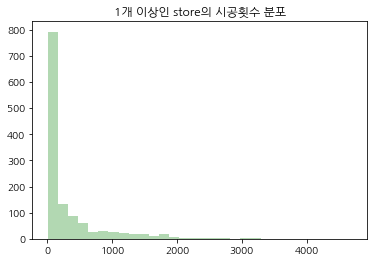

In [16]:
#스토어별 시공횟수 분포 확인
stores = total_df_item_store.groupby(['store','store_addr','predicted_name'])['regist_dt'].count().sort_values(ascending=False)
n = 1
plt.title(f'{n}개 이상인 store의 시공횟수 분포')
plt.hist(stores[stores>=n],bins=30,color='green',alpha=.3)

In [25]:
#사분위수/백분위수 확인
print('데이터 내 시공점 개수: '+str(len(stores)))
print('제 1 사분위수: '+str(stores.quantile(.25)))
print('제 2 사분위수: '+str(stores.quantile(.5)))
print('제 3 사분위수: '+str(stores.quantile(.75)))
print('99 백분위수: '+str(stores.quantile(.99)))

데이터 내 시공점 개수: 1267
제 1 사분위수: 12.0
제 2 사분위수: 73.0
제 3 사분위수: 353.0
99 백분위수: 2571.79999999999


In [29]:
#상위 30개
top_stores = list(stores.reset_index().store.head(30))

In [38]:
#썬팅 조합 표시
com = {
    'TTFTTF' : '1. 측2 후 전 ',
    'FFFFTF' : '2. 전',
    'TTTTTF': '3. 측3 후 전',
    'TTFTTT': '4. 측2 후 전 썬',
    'TTFTFF': '5. 측2 후',
    'TFFTTF': '6. 측1 후 전',
    'TFFFTF': '7. 측1 전',
    'TTTTTT': '8. 측3 후 전 썬',
    'TTFFTF': '9. 측2 전',
    'FFFFFT': '10. 썬'
}
def TF(inp):
  if np.isnan(inp):
    return 'F'
  else:
    return 'T'

def com_tin(df_row):
  try:
    return com[TF(df_row.product_1)+TF(df_row.product_2)+TF(df_row.product_3)+TF(df_row.product_4)+TF(df_row.product_5)+TF(df_row.product_6)]
  except:
    return '11. 그 외'
total_df_item_store['com_type'] = total_df_item_store.apply(com_tin, axis=1)
total_df_item_store.head(20)

,Unnamed: 0,regist_dt,car,store,store_addr,price,pay_kind,by_dealer,product_1,product_2,product_3,product_4,product_5,product_6,name,model,maker,kind,product_1_name,product_2_name,product_3_name,product_4_name,product_5_name,product_6_name,latlng,predicted_name,com_type
0,0,20201231165209,렉스턴,21312de55841d2c624d4873b1f13d1f5,서울 영등포구 신길동1155,650000,1,0,101.0,101.0,101.0,101.0,102.0,101.0,렉스턴,렉스턴,쌍용,['Mid-Large suv'],Pinnacle,Pinnacle,Pinnacle,Pinnacle,Pinnacle,Pinnacle,"(126.922874651726, 37.5070772373459)",모토익스 여의도센터,8. 측3 후 전 썬
1,28,20201230100632,X3,21312de55841d2c624d4873b1f13d1f5,서울 영등포구 신길동1155,250000,1,0,NaN,NaN,NaN,NaN,103.0,NaN,X3,X3,BMW,Mid-Large suv,NaN,NaN,NaN,NaN,Pinnacle,NaN,"(126.922874651726, 37.5070772373459)",모토익스 여의도센터,2. 전
2,29,20201230092303,렉스턴스포츠Q200,21312de55841d2c624d4873b1f13d1f5,서울 영등포구 신길동1155,450000,1,0,284.0,284.0,NaN,284.0,102.0,NaN,렉스턴스포츠Q200,스포츠,르노,Coupe,Super,Super,NaN,Super,Pinnacle,NaN,"(126.922874651726, 37.5070772373459)",모토익스 여의도센터,1. 측2 후 전
3,192,20201221111340,그랜저 IG 하이브리드,21312de55841d2c624d4873b1f13d1f5,서울 영등포구 신길동1155,450000,1,0,285.0,285.0,NaN,284.0,103.0,NaN,그랜저 IG 하이브리드,그랜저,현대,Sedan,Super,Super,NaN,Super,Pinnacle,NaN,"(126.922874651726, 37.5070772373459)",모토익스 여의도센터,1. 측2 후 전
4,333,20201214110601,쿠퍼,21312de55841d2c624d4873b1f13d1f5,서울 영등포구 신길동1155,450000,1,0,284.0,284.0,NaN,284.0,102.0,NaN,쿠퍼,쿠퍼,미니,Coupe,Super,Super,NaN,Super,Pinnacle,NaN,"(126.922874651726, 37.5070772373459)",모토익스 여의도센터,1. 측2 후 전
5,449,20201209100721,스포티지 QL,21312de55841d2c624d4873b1f13d1f5,서울 영등포구 신길동1155,450000,1,0,284.0,284.0,NaN,284.0,102.0,NaN,스포티지 QL,스포티지,기아,Mid-Large suv,Super,Super,NaN,Super,Pinnacle,NaN,"(126.922874651726, 37.5070772373459)",모토익스 여의도센터,1. 측2 후 전
6,537,20201204144930,X3,21312de55841d2c624d4873b1f13d1f5,서울 영등포구 신길동1155,650000,1,0,281.0,281.0,281.0,281.0,281.0,280.0,X3,X3,BMW,Mid-Large suv,Pinnacle,Pinnacle,Pinnacle,Pinnacle,Pinnacle,Pinnacle,"(126.922874651726, 37.5070772373459)",모토익스 여의도센터,8. 측3 후 전 썬
7,618,20201201121940,SM5,21312de55841d2c624d4873b1f13d1f5,서울 영등포구 신길동1155,420000,1,0,280.0,280.0,NaN,280.0,102.0,NaN,SM5,SM5,르노삼성,['Sedan'],Pinnacle,Pinnacle,NaN,Pinnacle,Pinnacle,NaN,"(126.922874651726, 37.5070772373459)",모토익스 여의도센터,1. 측2 후 전
8,660,20201127170651,그랜져 TG,21312de55841d2c624d4873b1f13d1f5,서울 영등포구 신길동1155,250000,1,0,NaN,NaN,NaN,NaN,102.0,NaN,그랜져 TG,0,0,NaN,NaN,NaN,NaN,NaN,Pinnacle,NaN,"(126.922874651726, 37.5070772373459)",모토익스 여의도센터,2. 전
9,913,20201116140307,팰리세이드,21312de55841d2c624d4873b1f13d1f5,서울 영등포구 신길동1155,650000,1,0,101.0,101.0,101.0,101.0,102.0,101.0,팰리세이드,팰리세이드,현대,['Mid-Large suv'],Pinnacle,Pinnacle,Pinnacle,Pinnacle,Pinnacle,Pinnacle,"(126.922874651726, 37.5070772373459)",모토익스 여의도센터,8. 측3 후 전 썬


## top 20 시공점 별 시공조합 비율

com_type
1. 측2 후 전      0.628815
10. 썬          0.002746
11. 그 외        0.017608
2. 전           0.165812
3. 측3 후 전      0.068676
4. 측2 후 전 썬    0.064955
5. 측2 후        0.015388
6. 측1 후 전      0.011109
7. 측1 전        0.009571
8. 측3 후 전 썬    0.008129
9. 측2 전        0.007191
Name: regist_dt, dtype: float64


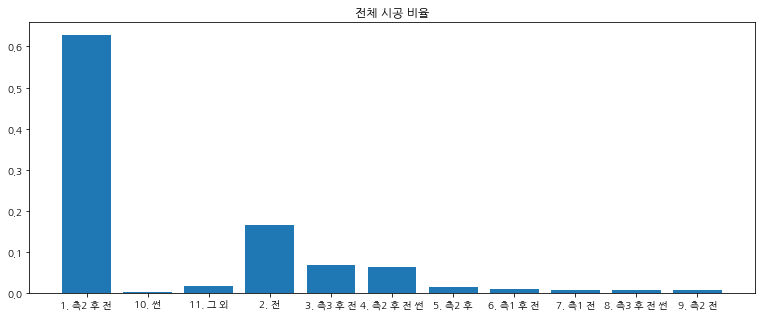

com_type
1. 측2 후 전      0.848478
11. 그 외        0.002767
2. 전           0.035327
3. 측3 후 전      0.033624
4. 측2 후 전 썬    0.021068
5. 측2 후        0.017663
6. 측1 후 전      0.022558
7. 측1 전        0.011279
8. 측3 후 전 썬    0.003618
9. 측2 전        0.003618
Name: regist_dt, dtype: float64


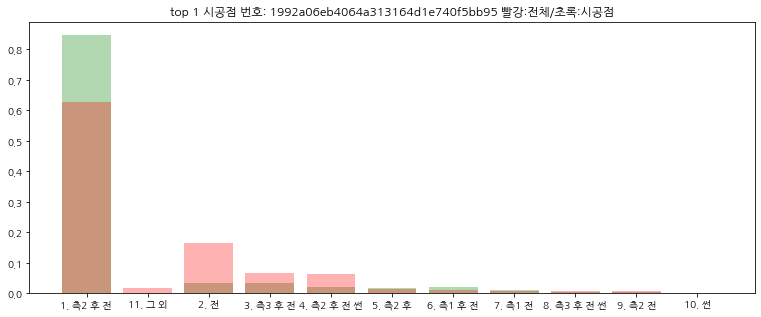

com_type
1. 측2 후 전      0.855293
10. 썬          0.000996
11. 그 외        0.004234
2. 전           0.076712
3. 측3 후 전      0.026650
4. 측2 후 전 썬    0.013948
5. 측2 후        0.007472
6. 측1 후 전      0.009714
7. 측1 전        0.001993
8. 측3 후 전 썬    0.000249
9. 측2 전        0.002740
Name: regist_dt, dtype: float64


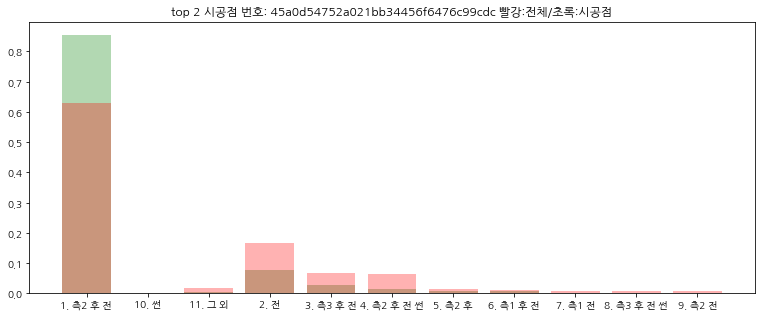

com_type
1. 측2 후 전      0.751072
10. 썬          0.002680
11. 그 외        0.006967
2. 전           0.124062
3. 측3 후 전      0.006967
4. 측2 후 전 썬    0.083601
5. 측2 후        0.011790
6. 측1 후 전      0.004287
7. 측1 전        0.004555
8. 측3 후 전 썬    0.002947
9. 측2 전        0.001072
Name: regist_dt, dtype: float64


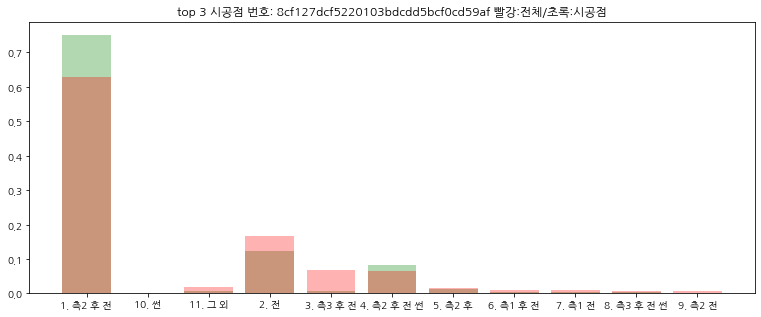

com_type
1. 측2 후 전      0.732871
10. 썬          0.002024
11. 그 외        0.007228
2. 전           0.020526
3. 측3 후 전      0.123446
4. 측2 후 전 썬    0.059844
5. 측2 후        0.005782
6. 측1 후 전      0.032090
7. 측1 전        0.002891
8. 측3 후 전 썬    0.011564
9. 측2 전        0.001735
Name: regist_dt, dtype: float64


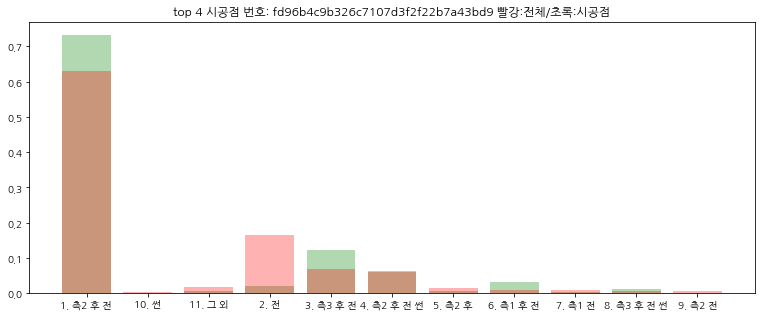

com_type
1. 측2 후 전      0.841452
10. 썬          0.004034
11. 그 외        0.011480
2. 전           0.053056
3. 측3 후 전      0.031337
4. 측2 후 전 썬    0.029165
5. 측2 후        0.009929
6. 측1 후 전      0.013342
7. 측1 전        0.002172
8. 측3 후 전 썬    0.000310
9. 측2 전        0.003723
Name: regist_dt, dtype: float64


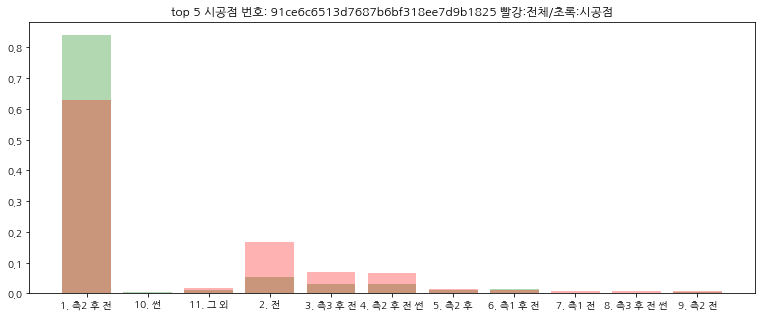

com_type
1. 측2 후 전      0.765749
10. 썬          0.002849
11. 그 외        0.005065
2. 전           0.077556
3. 측3 후 전      0.053181
4. 측2 후 전 썬    0.060779
5. 측2 후        0.012346
6. 측1 후 전      0.008864
7. 측1 전        0.002216
8. 측3 후 전 썬    0.009813
9. 측2 전        0.001583
Name: regist_dt, dtype: float64


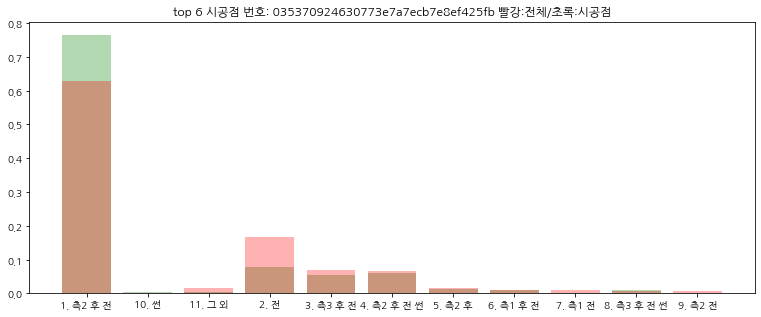

com_type
1. 측2 후 전      0.524217
10. 썬          0.004283
11. 그 외        0.023723
2. 전           0.267216
3. 측3 후 전      0.081054
4. 측2 후 전 썬    0.040857
5. 측2 후        0.024712
6. 측1 후 전      0.005931
7. 측1 전        0.013180
8. 측3 후 전 썬    0.005931
9. 측2 전        0.008896
Name: regist_dt, dtype: float64


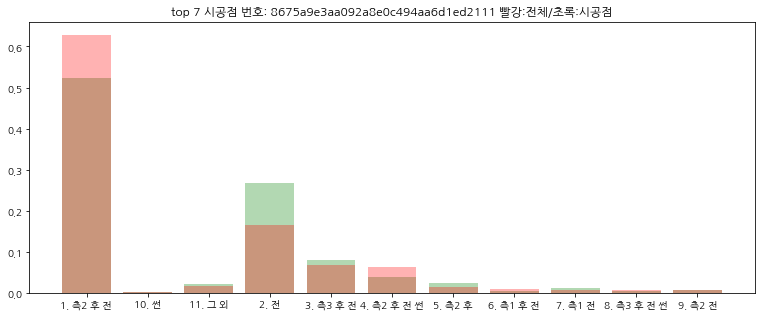

com_type
1. 측2 후 전      0.629838
10. 썬          0.002316
11. 그 외        0.009262
2. 전           0.193847
3. 측3 후 전      0.049950
4. 측2 후 전 썬    0.077737
5. 측2 후        0.014555
6. 측1 후 전      0.007608
7. 측1 전        0.003970
8. 측3 후 전 썬    0.008601
9. 측2 전        0.002316
Name: regist_dt, dtype: float64


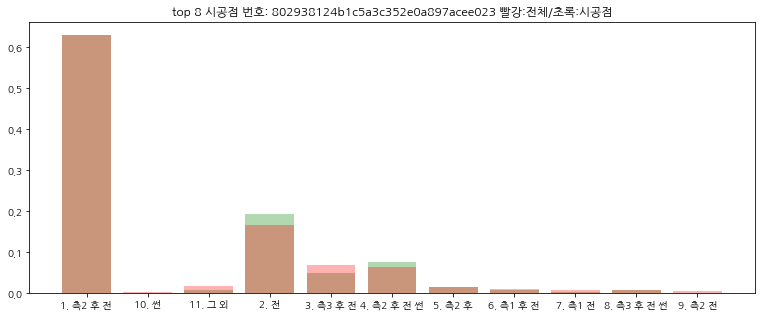

com_type
1. 측2 후 전      0.624733
10. 썬          0.009622
11. 그 외        0.029223
2. 전           0.126871
3. 측3 후 전      0.023521
4. 측2 후 전 썬    0.127227
5. 측2 후        0.027085
6. 측1 후 전      0.014968
7. 측1 전        0.008197
8. 측3 후 전 썬    0.006771
9. 측2 전        0.001782
Name: regist_dt, dtype: float64


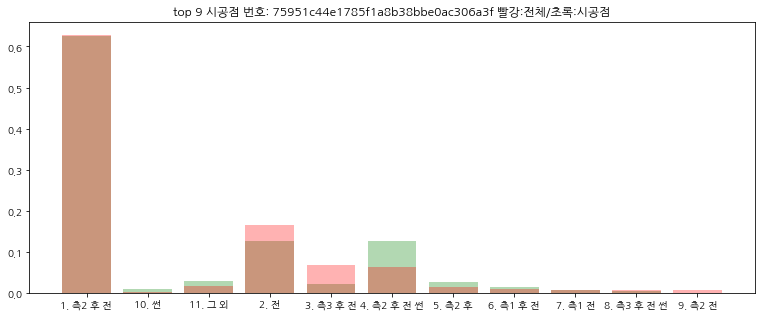

com_type
1. 측2 후 전      0.700623
10. 썬          0.002565
11. 그 외        0.014657
2. 전           0.023452
3. 측3 후 전      0.149505
4. 측2 후 전 썬    0.056431
5. 측2 후        0.004031
6. 측1 후 전      0.031513
7. 측1 전        0.002199
8. 측3 후 전 썬    0.014291
9. 측2 전        0.000733
Name: regist_dt, dtype: float64


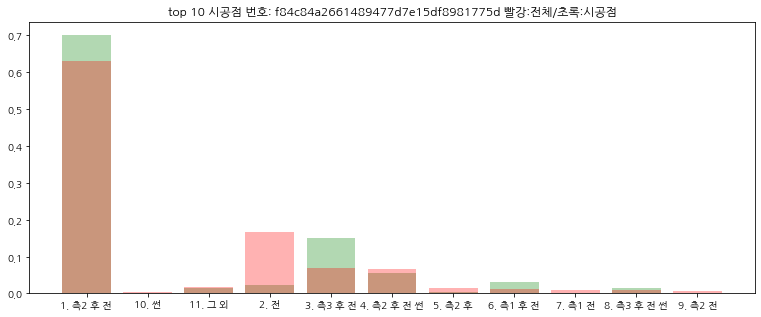

com_type
1. 측2 후 전      0.705601
11. 그 외        0.008475
2. 전           0.100590
3. 측3 후 전      0.119749
4. 측2 후 전 썬    0.036109
5. 측2 후        0.006264
6. 측1 후 전      0.011791
7. 측1 전        0.003316
8. 측3 후 전 썬    0.007369
9. 측2 전        0.000737
Name: regist_dt, dtype: float64


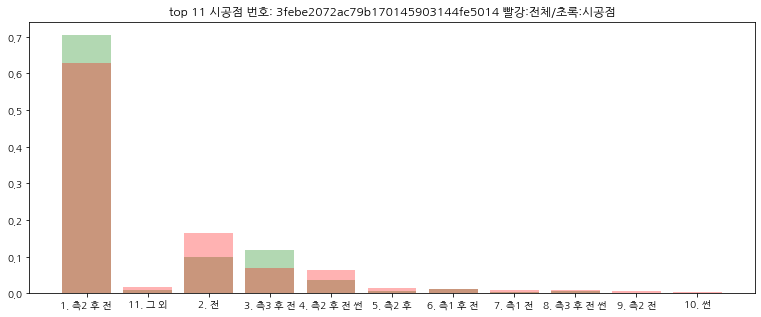

com_type
1. 측2 후 전      0.676067
10. 썬          0.001855
11. 그 외        0.009276
2. 전           0.168460
3. 측3 후 전      0.070130
4. 측2 후 전 썬    0.050093
5. 측2 후        0.009647
6. 측1 후 전      0.002597
7. 측1 전        0.002597
8. 측3 후 전 썬    0.006679
9. 측2 전        0.002597
Name: regist_dt, dtype: float64


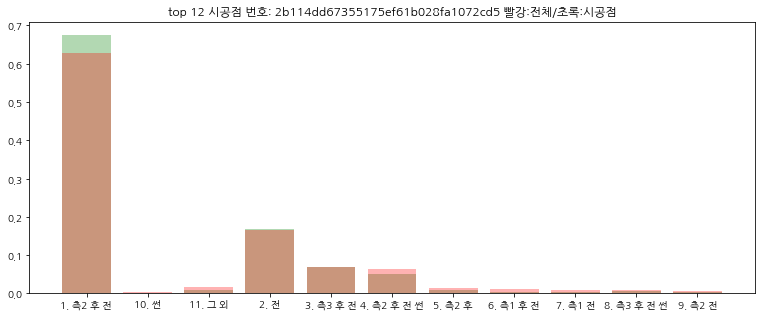

com_type
1. 측2 후 전      0.880800
11. 그 외        0.002263
2. 전           0.012071
3. 측3 후 전      0.043380
4. 측2 후 전 썬    0.033195
5. 측2 후        0.005281
6. 측1 후 전      0.018861
7. 측1 전        0.001132
8. 측3 후 전 썬    0.002641
9. 측2 전        0.000377
Name: regist_dt, dtype: float64


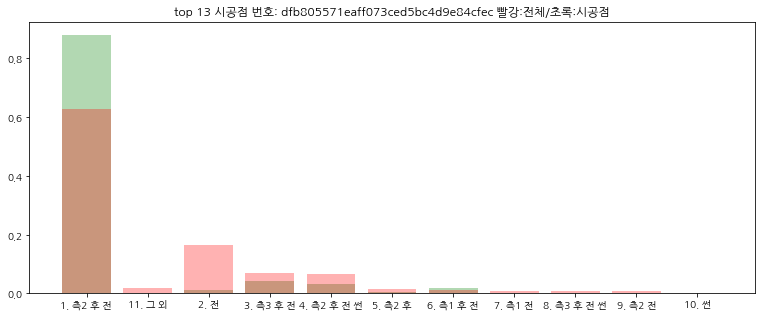

com_type
1. 측2 후 전      0.657843
10. 썬          0.002371
11. 그 외        0.010668
2. 전           0.164362
3. 측3 후 전      0.051758
4. 측2 후 전 썬    0.084947
5. 측2 후        0.005927
6. 측1 후 전      0.004346
7. 측1 전        0.006322
8. 측3 후 전 썬    0.007112
9. 측2 전        0.004346
Name: regist_dt, dtype: float64


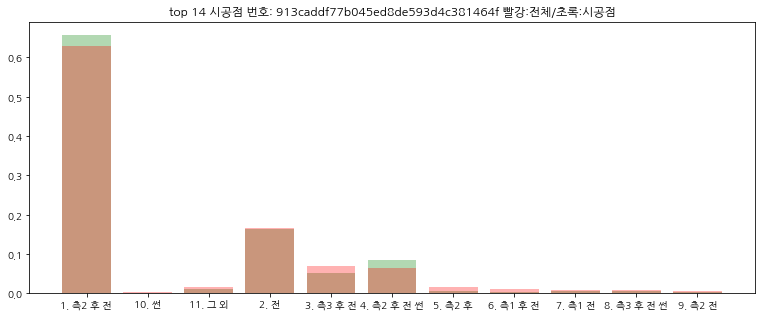

com_type
1. 측2 후 전      0.830260
10. 썬          0.001676
11. 그 외        0.001676
2. 전           0.027242
3. 측3 후 전      0.043588
4. 측2 후 전 썬    0.069573
5. 측2 후        0.011316
6. 측1 후 전      0.006706
7. 측1 전        0.000419
8. 측3 후 전 썬    0.005029
9. 측2 전        0.002515
Name: regist_dt, dtype: float64


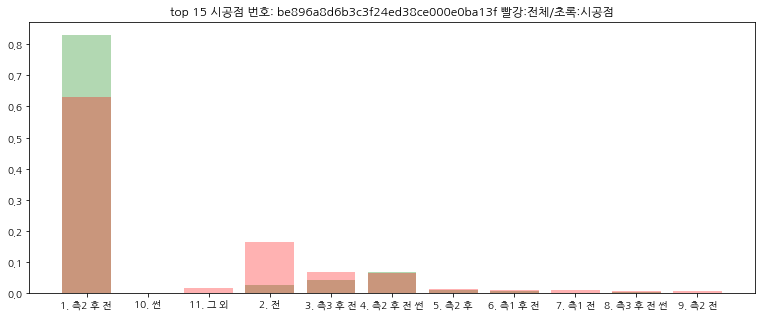

com_type
1. 측2 후 전      0.381313
10. 썬          0.002104
11. 그 외        0.031566
2. 전           0.471801
3. 측3 후 전      0.038721
4. 측2 후 전 썬    0.026094
5. 측2 후        0.022727
6. 측1 후 전      0.005471
7. 측1 전        0.012205
8. 측3 후 전 썬    0.000842
9. 측2 전        0.007155
Name: regist_dt, dtype: float64


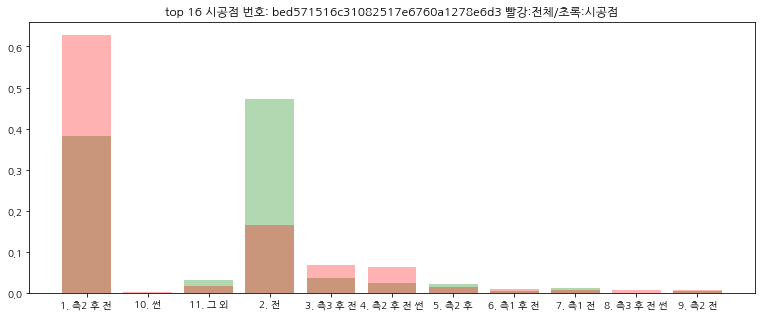

com_type
1. 측2 후 전      0.597167
10. 썬          0.003099
11. 그 외        0.023462
2. 전           0.095175
3. 측3 후 전      0.156707
4. 측2 후 전 썬    0.062417
5. 측2 후        0.018592
6. 측1 후 전      0.006640
7. 측1 전        0.007968
8. 측3 후 전 썬    0.014166
9. 측2 전        0.014608
Name: regist_dt, dtype: float64


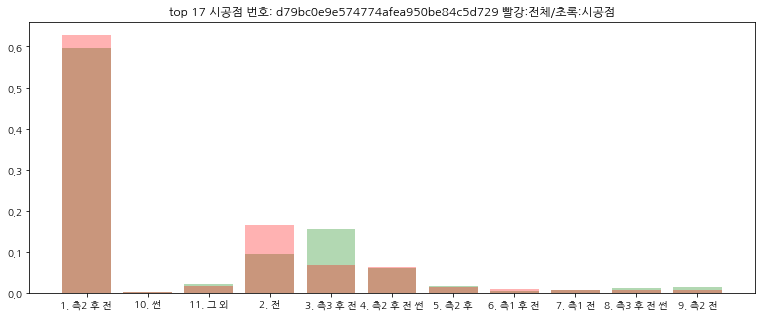

com_type
1. 측2 후 전      0.665175
10. 썬          0.003133
11. 그 외        0.016562
2. 전           0.069382
3. 측3 후 전      0.048791
4. 측2 후 전 썬    0.124440
5. 측2 후        0.015667
6. 측1 후 전      0.038496
7. 측1 전        0.008057
8. 측3 후 전 썬    0.004476
9. 측2 전        0.005819
Name: regist_dt, dtype: float64


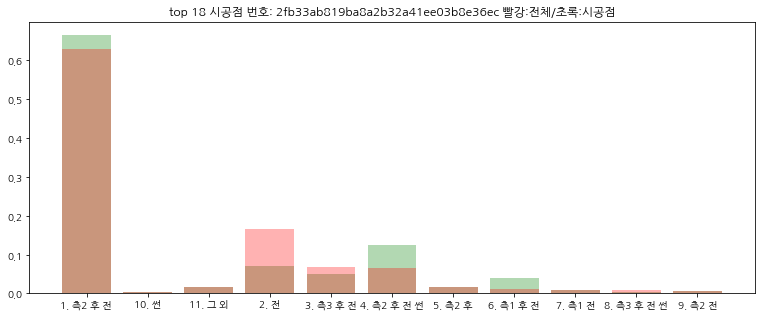

com_type
1. 측2 후 전      0.780355
10. 썬          0.001364
11. 그 외        0.009095
2. 전           0.048658
3. 측3 후 전      0.092315
4. 측2 후 전 썬    0.018190
5. 측2 후        0.012733
6. 측1 후 전      0.022738
7. 측1 전        0.005002
8. 측3 후 전 썬    0.006367
9. 측2 전        0.003183
Name: regist_dt, dtype: float64


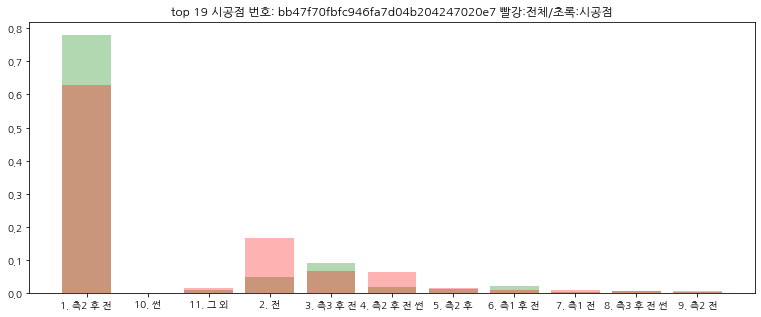

com_type
1. 측2 후 전      0.542141
10. 썬          0.000456
11. 그 외        0.008656
2. 전           0.338952
3. 측3 후 전      0.019134
4. 측2 후 전 썬    0.049203
5. 측2 후        0.019134
6. 측1 후 전      0.004100
7. 측1 전        0.011845
8. 측3 후 전 썬    0.003645
9. 측2 전        0.002733
Name: regist_dt, dtype: float64


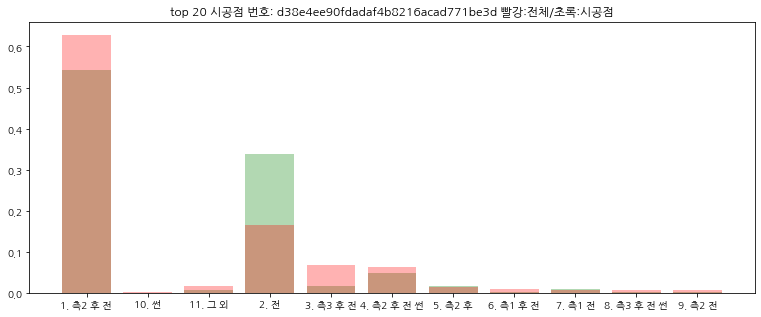

In [59]:
# 시공 부위별 비율
total_counts = total_df_item_store.groupby(['com_type'])['regist_dt'].count()/len(total_df_item_store)
print(total_counts)
plt.figure(figsize = (13,5))
plt.title('전체 시공 비율')
plt.bar(x = total_counts.index, height = total_counts)
plt.show()

for i in top_stores[0:20]:
  counts = total_df_item_store[total_df_item_store['store'] == i].groupby(['com_type'])['regist_dt'].count()/len(total_df_item_store[total_df_item_store['store'] == i])
  print(counts)
  plt.figure(figsize = (13,5))
  plt.title(f'top {top_stores.index(i)+1} 시공점 번호: '+i+' 빨강:전체/초록:시공점')
  plt.bar(x = counts.index, height = counts, color='green', alpha=.3)
  plt.bar(x = total_counts.index, height = total_counts, color='red', alpha=.3)
  plt.show()


## top20 시공점별 딜러 비율

by_dealer
0    0.829311
1    0.170689
Name: regist_dt, dtype: float64


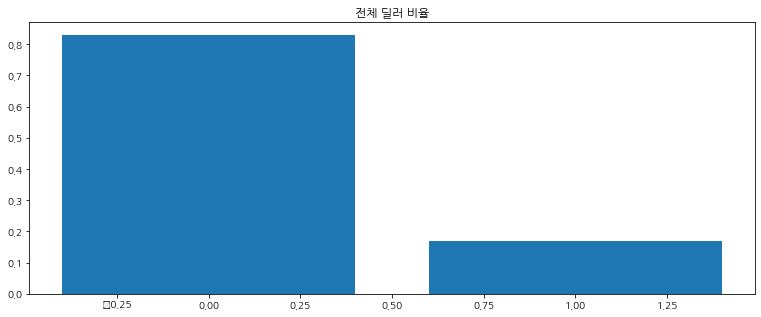

by_dealer
0    0.652905
1    0.347095
Name: regist_dt, dtype: float64


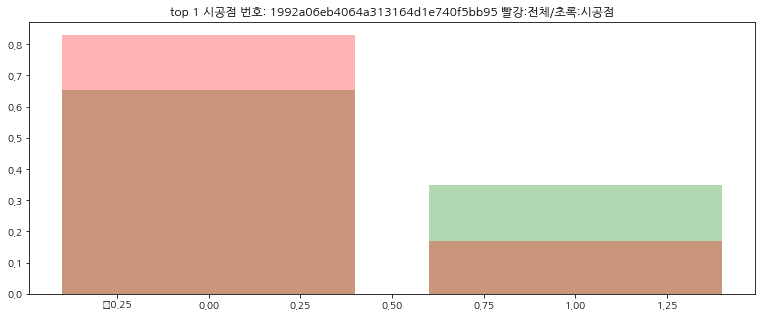

by_dealer
0    0.535243
1    0.464757
Name: regist_dt, dtype: float64


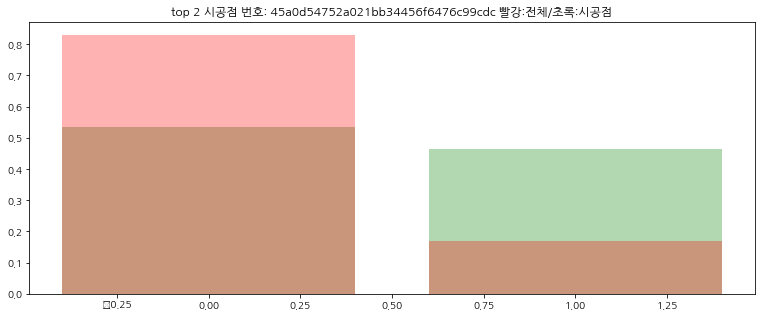

by_dealer
1    0.576367
0    0.423633
Name: regist_dt, dtype: float64


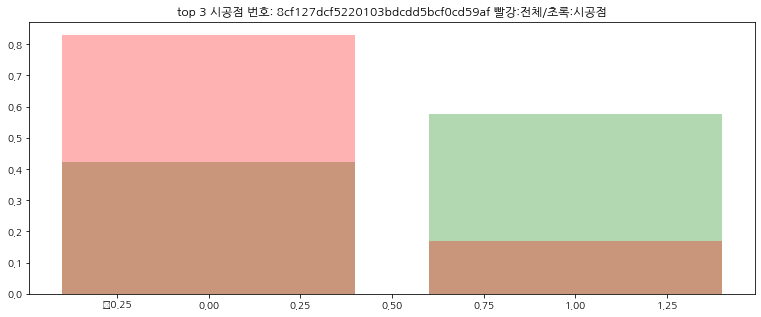

by_dealer
0    0.808037
1    0.191963
Name: regist_dt, dtype: float64


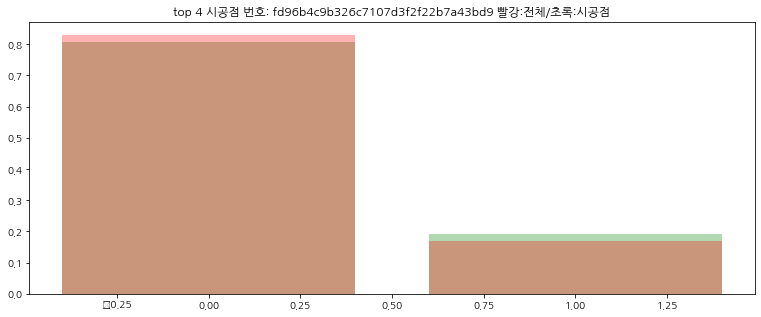

by_dealer
0    1.0
Name: regist_dt, dtype: float64


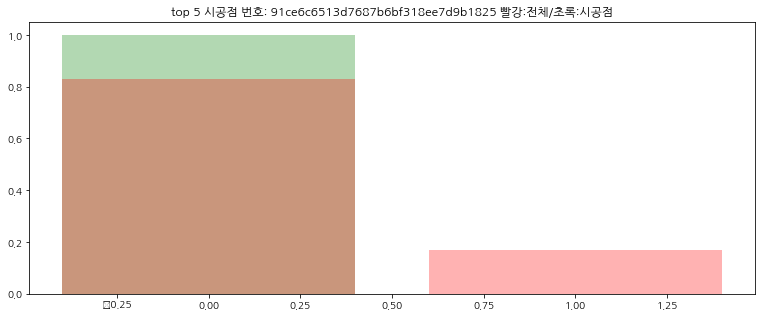

by_dealer
1    0.559671
0    0.440329
Name: regist_dt, dtype: float64


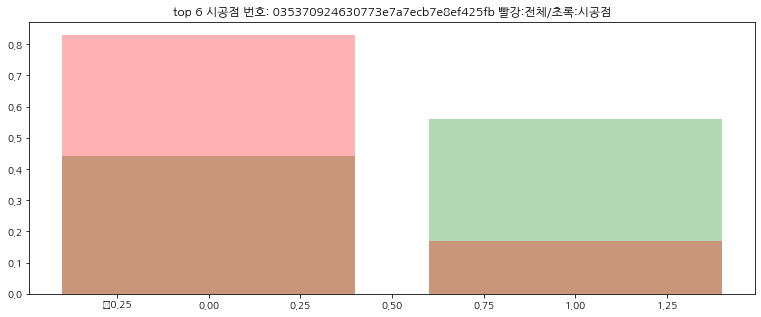

by_dealer
0    0.723888
1    0.276112
Name: regist_dt, dtype: float64


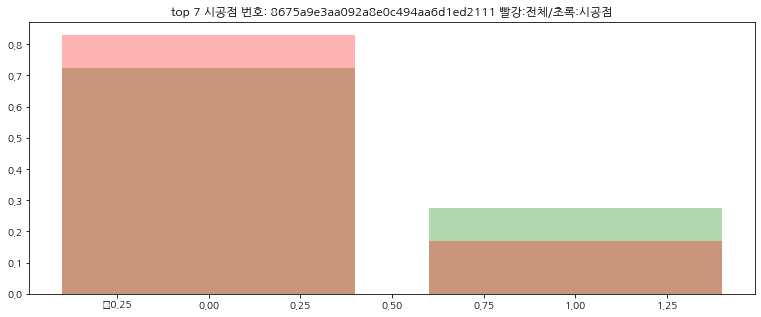

by_dealer
0    0.649024
1    0.350976
Name: regist_dt, dtype: float64


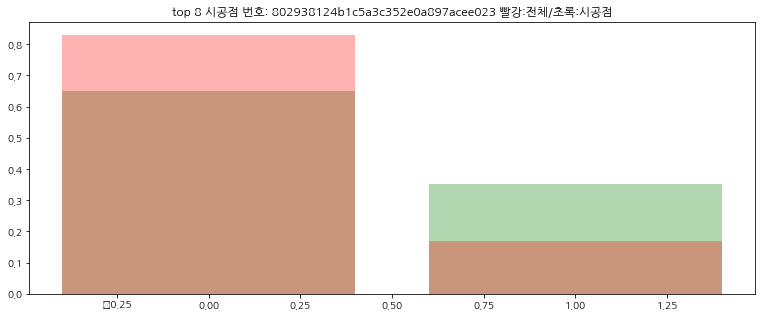

by_dealer
0    0.708838
1    0.291162
Name: regist_dt, dtype: float64


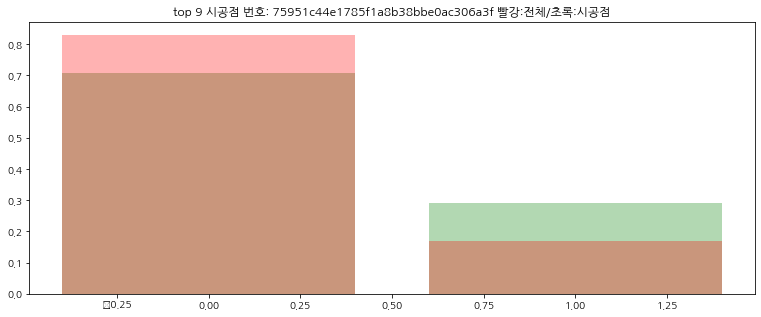

by_dealer
1    0.554049
0    0.445951
Name: regist_dt, dtype: float64


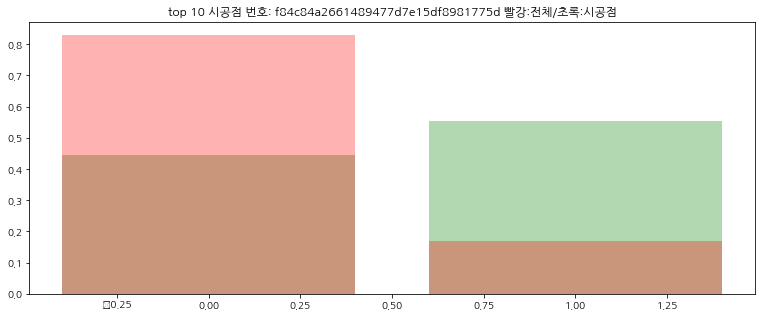

by_dealer
0    0.56927
1    0.43073
Name: regist_dt, dtype: float64


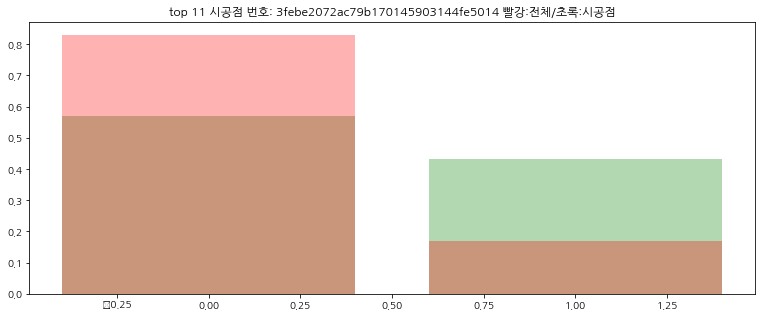

by_dealer
1    0.562523
0    0.437477
Name: regist_dt, dtype: float64


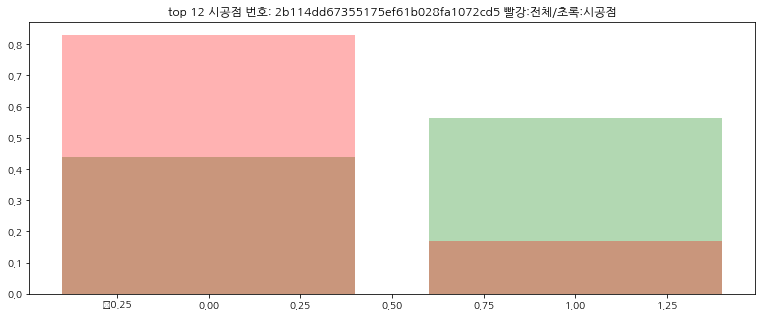

by_dealer
0    1.0
Name: regist_dt, dtype: float64


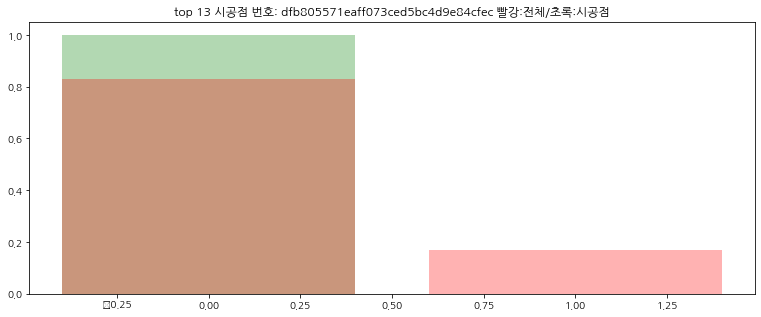

by_dealer
0    0.507309
1    0.492691
Name: regist_dt, dtype: float64


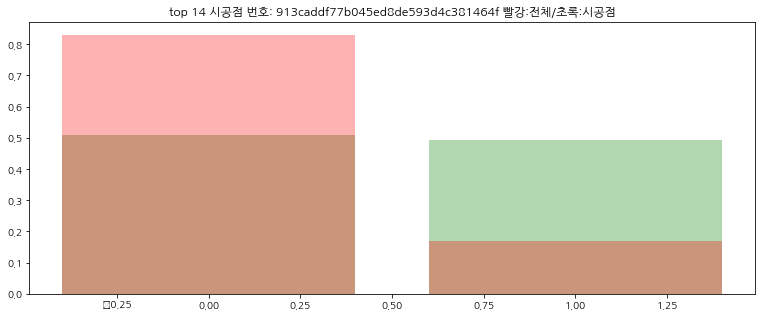

by_dealer
1    0.550293
0    0.449707
Name: regist_dt, dtype: float64


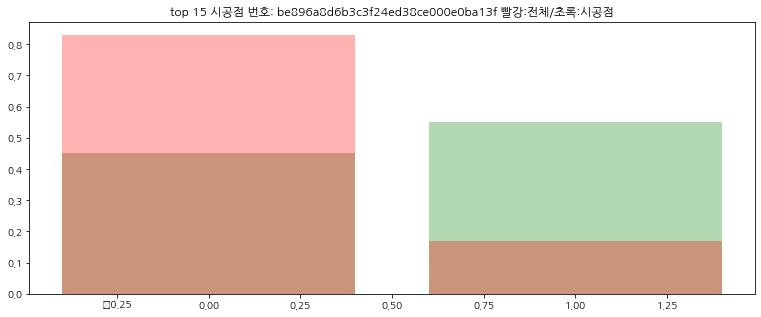

by_dealer
0    0.999158
1    0.000842
Name: regist_dt, dtype: float64


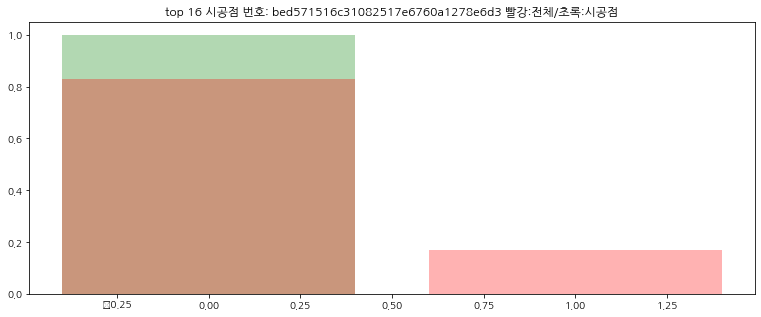

by_dealer
0    0.76494
1    0.23506
Name: regist_dt, dtype: float64


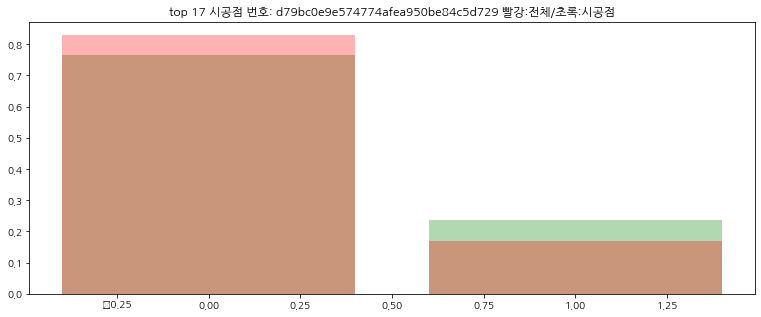

by_dealer
0    0.755148
1    0.244852
Name: regist_dt, dtype: float64


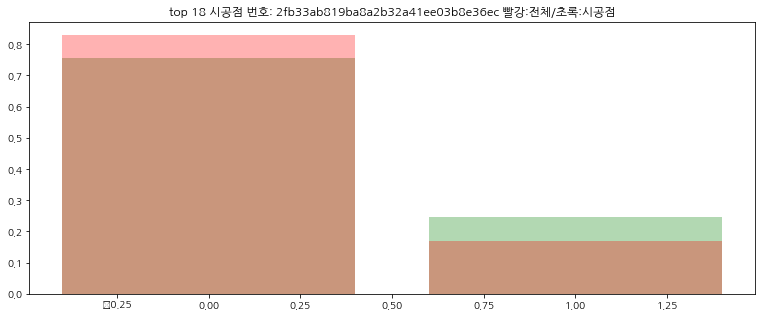

by_dealer
1    0.644384
0    0.355616
Name: regist_dt, dtype: float64


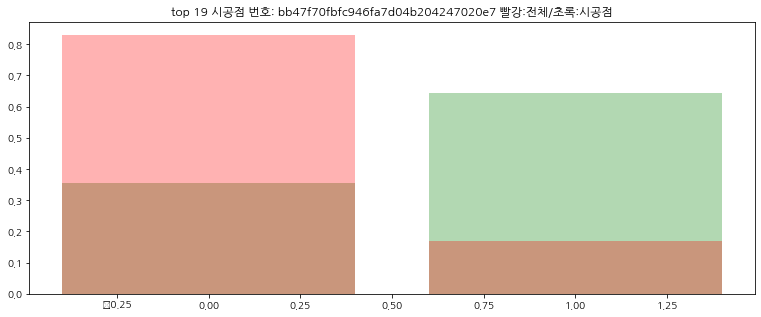

by_dealer
0    0.982688
1    0.017312
Name: regist_dt, dtype: float64


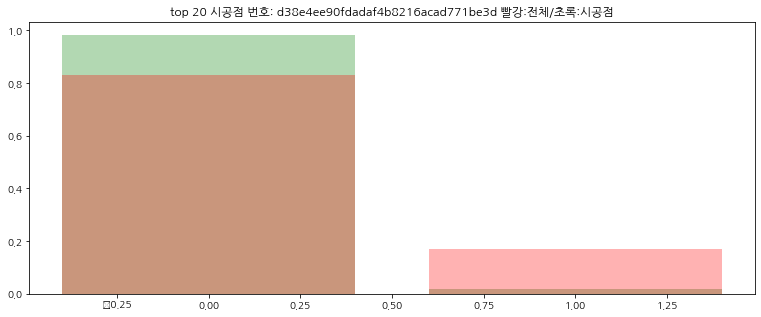

by_dealer
0    0.676043
1    0.323957
Name: regist_dt, dtype: float64


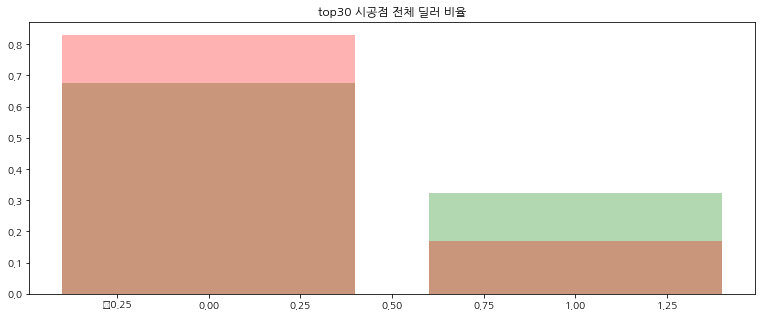

In [81]:
#시공점별 딜러비율
total_counts = total_df_item_store.groupby(['by_dealer'])['regist_dt'].count()/len(total_df_item_store)
print(total_counts.sort_values(ascending=False)[0:10])
plt.figure(figsize = (13,5))
plt.title('전체 딜러 비율')
plt.bar(x = total_counts.sort_values(ascending=False)[0:10].index, height = total_counts.sort_values(ascending=False)[0:10])
plt.show()

for i in top_stores[0:20]:
  counts = total_df_item_store[total_df_item_store['store'] == i].groupby(['by_dealer'])['regist_dt'].count().sort_values(ascending=False)[0:10]/len(total_df_item_store[total_df_item_store['store'] == i])
  print(counts)
  plt.figure(figsize = (13,5))
  plt.title(f'top {top_stores.index(i)+1} 시공점 번호: '+i+' 빨강:전체/초록:시공점')
  plt.bar(x = counts.index, height = counts, color='green', alpha=.3)
  plt.bar(x = total_counts.sort_values(ascending=False)[0:10].index, height = total_counts.sort_values(ascending=False)[0:10], color='red', alpha=.3)
  plt.show()

counts_top30 = total_df_item_store[total_df_item_store['store'].isin(top_stores)].groupby(['by_dealer'])['regist_dt'].count().sort_values(ascending=False)[0:10]/len(total_df_item_store[total_df_item_store['store'].isin(top_stores)])
print(counts_top30)
plt.figure(figsize = (13,5))
plt.title(f'top30 시공점 전체 딜러 비율')
plt.bar(x = counts_top30.index, height = counts_top30, color='green', alpha=.3)
plt.bar(x = total_counts.sort_values(ascending=False)[0:10].index, height = total_counts.sort_values(ascending=False)[0:10], color='red', alpha=.3)
plt.show()

## top 20 시공점 별 메이커 비율

maker
현대          0.443786
기아          0.290988
르노삼성        0.057653
쌍용          0.046457
쉐보레/한국GM    0.037000
벤츠          0.027851
BMW         0.014673
제네시스        0.014383
토요타         0.011165
0           0.008487
Name: regist_dt, dtype: float64


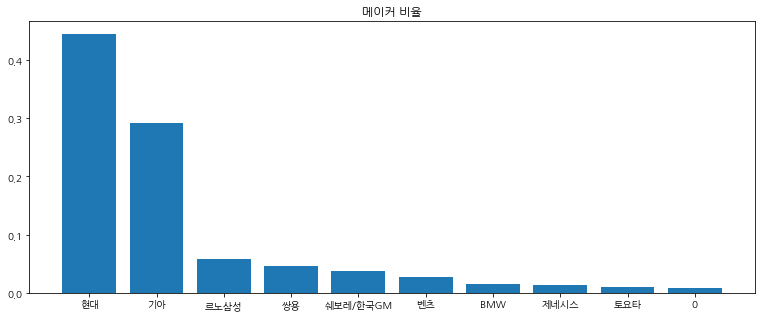

maker
현대          0.545648
기아          0.418600
제네시스        0.010853
쌍용          0.005533
쉐보레/한국GM    0.005320
아큐라         0.004043
르노삼성        0.003405
랜드로버        0.001064
쉐보레         0.000851
BMW         0.000851
Name: regist_dt, dtype: float64


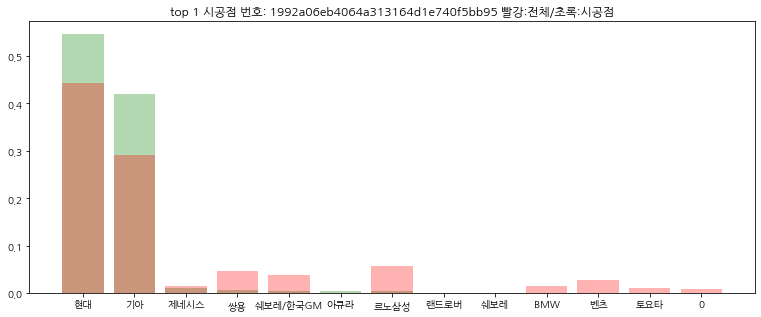

maker
현대          0.578331
기아          0.312578
쉐보레/한국GM    0.043337
쌍용          0.025405
제네시스        0.018680
르노삼성        0.015442
아큐라         0.001743
쉐보레         0.001245
벤츠          0.001245
0           0.001245
Name: regist_dt, dtype: float64


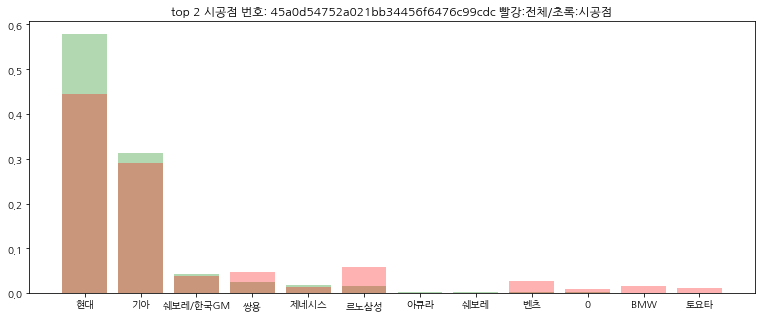

maker
현대          0.716774
기아          0.130493
르노삼성        0.064041
쉐보레/한국GM    0.031083
제네시스        0.018221
쌍용          0.011254
아큐라         0.005091
BMW         0.004823
벤츠          0.003751
쉐보레         0.002412
Name: regist_dt, dtype: float64


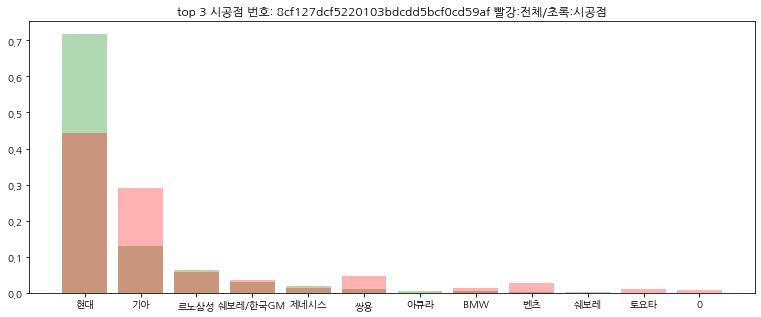

maker
현대          0.457647
기아          0.453599
쉐보레/한국GM    0.034981
르노삼성        0.017635
제네시스        0.010986
쌍용          0.006360
벤츠          0.004626
BMW         0.004047
혼다          0.001446
0           0.001446
Name: regist_dt, dtype: float64


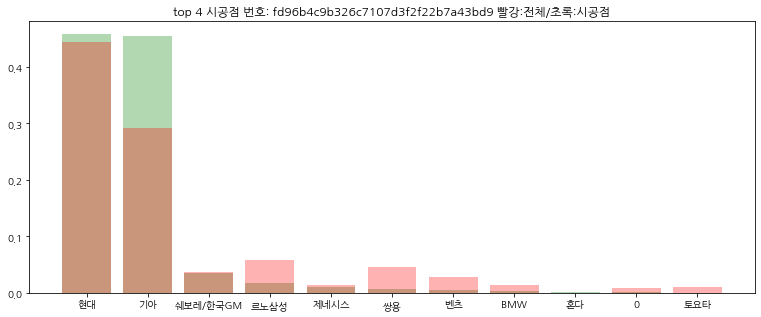

maker
기아          0.507602
현대          0.367360
르노삼성        0.048092
쌍용          0.014583
제네시스        0.011790
쉐보레/한국GM    0.010239
벤츠          0.008688
BMW         0.008067
0           0.003723
아큐라         0.003103
Name: regist_dt, dtype: float64


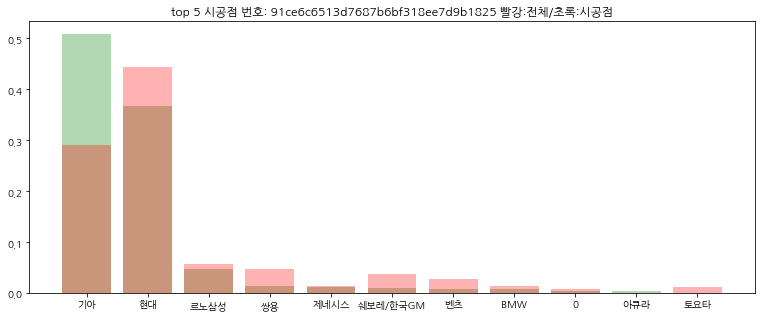

maker
기아          0.535296
현대          0.428300
제네시스        0.011396
아큐라         0.007597
쉐보레/한국GM    0.004432
쌍용          0.004432
르노삼성        0.002532
벤츠          0.001266
BMW         0.000950
0           0.000950
Name: regist_dt, dtype: float64


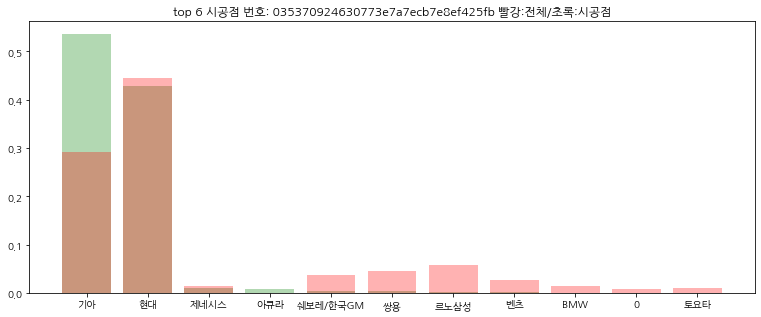

maker
현대          0.430972
기아          0.359143
쌍용          0.125865
쉐보레/한국GM    0.019440
르노삼성        0.016804
제네시스        0.014168
벤츠          0.005601
BMW         0.004942
0           0.004283
아우디         0.003624
Name: regist_dt, dtype: float64


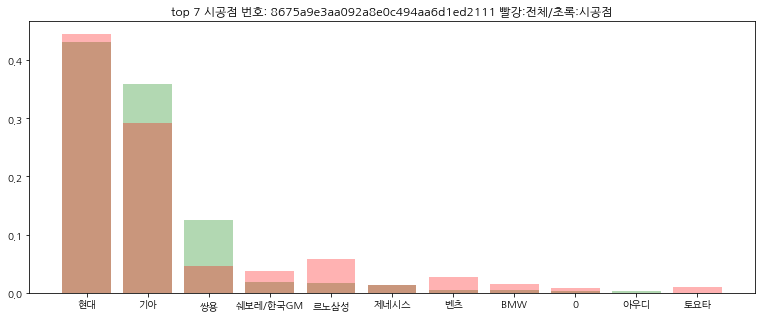

maker
현대          0.471717
기아          0.143897
쉐보레/한국GM    0.079391
벤츠          0.072445
토요타         0.036718
르노삼성        0.029441
렉서스         0.019517
아우디         0.019186
랜드로버        0.017201
제네시스        0.015878
Name: regist_dt, dtype: float64


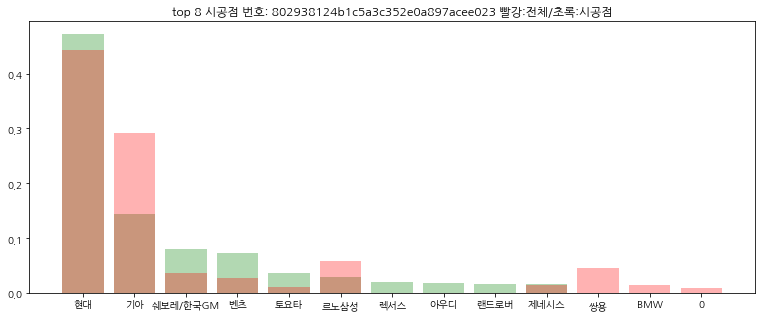

maker
현대      0.531718
기아      0.227726
토요타     0.030292
벤츠      0.026372
포드      0.025303
쌍용      0.021026
BMW     0.020670
제네시스    0.019244
링컨      0.014612
르노삼성    0.013542
Name: regist_dt, dtype: float64


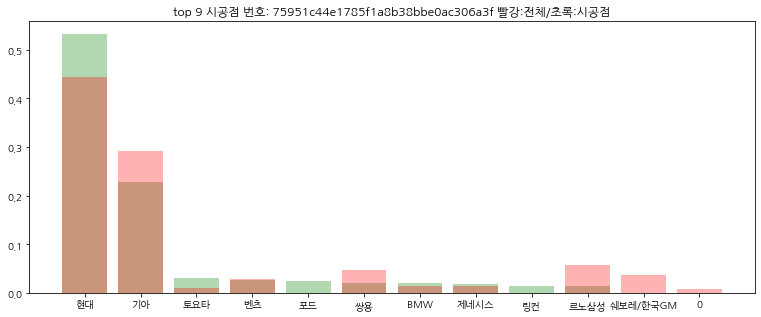

maker
현대          0.655551
기아          0.287285
제네시스        0.020887
쌍용          0.008428
르노삼성        0.006596
아큐라         0.004764
쉐보레/한국GM    0.004031
렉서스         0.004031
폭스바겐        0.001832
아우디         0.001466
Name: regist_dt, dtype: float64


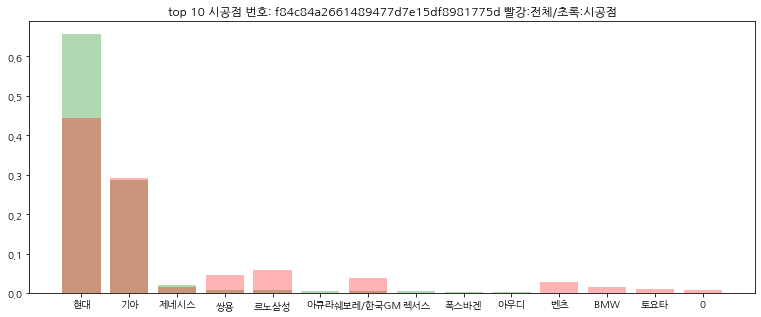

maker
현대          0.483419
기아          0.416360
쌍용          0.030214
쉐보레/한국GM    0.026161
제네시스        0.018791
BMW         0.010317
르노삼성        0.003316
쉐보레         0.002579
0           0.002579
아우디         0.001105
Name: regist_dt, dtype: float64


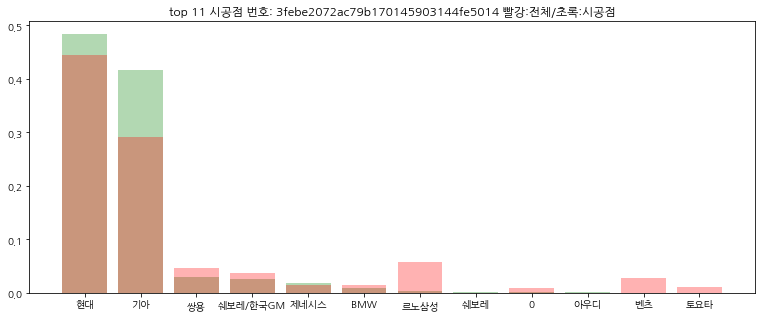

maker
기아          0.540260
현대          0.361410
쌍용          0.034879
제네시스        0.017440
르노삼성        0.010390
쉐보레/한국GM    0.009647
벤츠          0.005195
BMW         0.002968
아우디         0.002968
0           0.002597
Name: regist_dt, dtype: float64


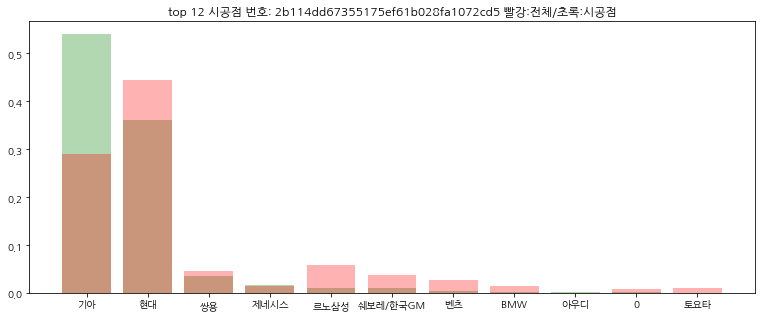

maker
현대          0.668427
기아          0.176914
쉐보레/한국GM    0.084496
르노삼성        0.032063
제네시스        0.019238
쌍용          0.008676
BMW         0.001886
벤츠          0.001509
홀덴          0.001132
쉐보레         0.000754
Name: regist_dt, dtype: float64


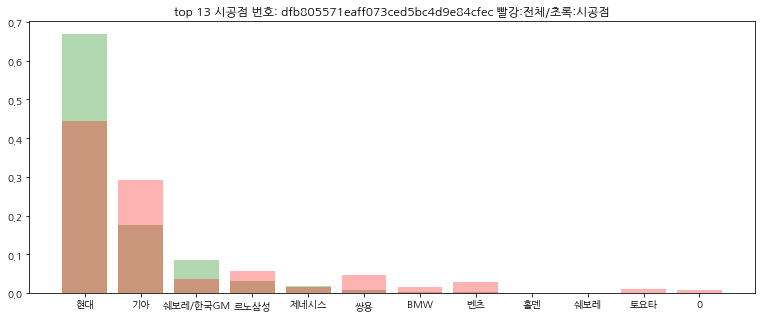

maker
현대          0.414856
기아          0.327539
쌍용          0.100751
쉐보레/한국GM    0.056104
볼보          0.020150
제네시스        0.018965
르노삼성        0.013829
벤츠          0.008692
아우디         0.005927
BMW         0.004741
Name: regist_dt, dtype: float64


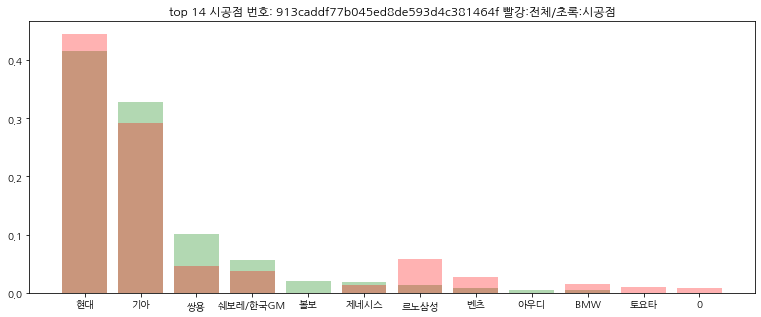

maker
기아          0.579631
현대          0.364208
쌍용          0.035205
제네시스        0.014250
쉐보레/한국GM    0.002934
르노삼성        0.001676
아큐라         0.000838
혼다          0.000419
토요타         0.000419
Name: regist_dt, dtype: float64


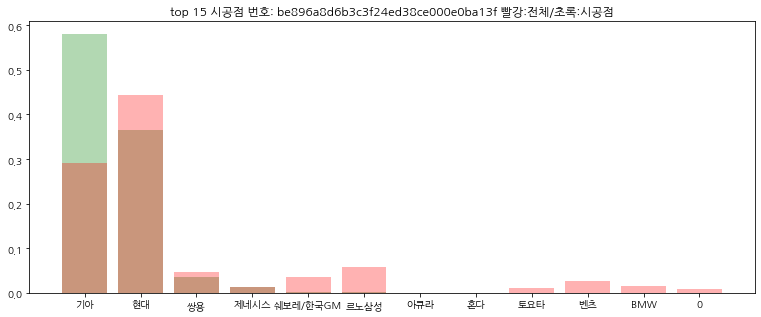

maker
기아          0.422980
현대          0.385101
쌍용          0.033670
르노삼성        0.026515
쉐보레/한국GM    0.021044
벤츠          0.020623
BMW         0.018519
제네시스        0.013889
0           0.009259
아우디         0.008418
Name: regist_dt, dtype: float64


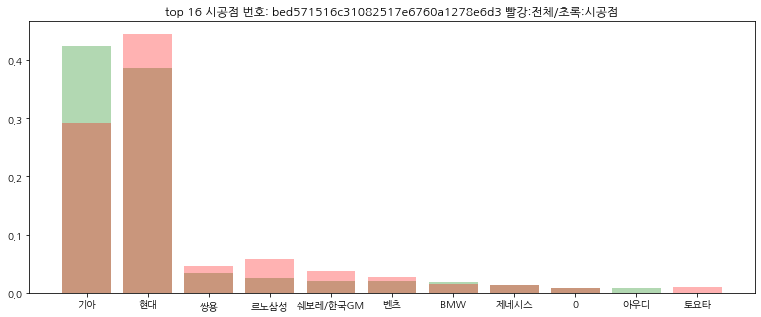

maker
현대          0.411244
기아          0.395750
쌍용          0.049137
쉐보레/한국GM    0.035414
르노삼성        0.025675
제네시스        0.015494
BMW         0.011952
볼보          0.010181
폭스바겐        0.006640
벤츠          0.006197
Name: regist_dt, dtype: float64


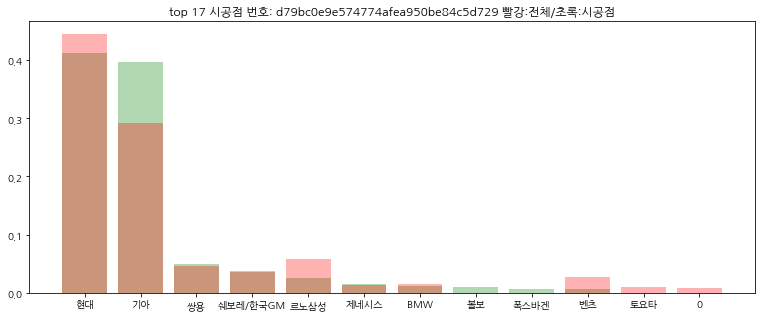

maker
현대          0.500000
기아          0.255595
렉서스         0.041182
쌍용          0.026410
토요타         0.021486
벤츠          0.018353
테슬라         0.017010
BMW         0.016562
쉐보레/한국GM    0.016562
르노삼성        0.015219
Name: regist_dt, dtype: float64


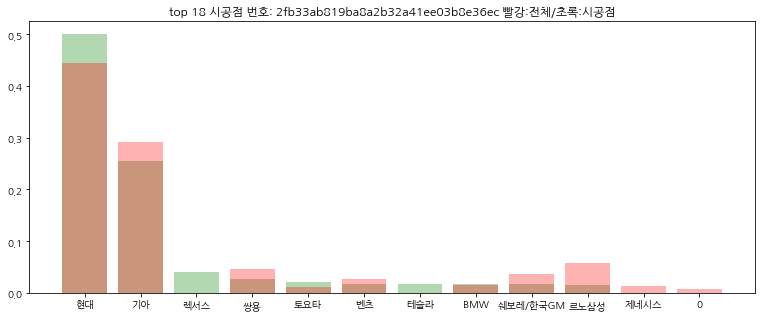

maker
현대          0.447476
기아          0.349704
쉐보레/한국GM    0.102319
쌍용          0.064120
르노삼성        0.010005
제네시스        0.008186
쉐보레         0.003638
홀덴          0.002274
아큐라         0.002274
벤츠          0.001819
Name: regist_dt, dtype: float64


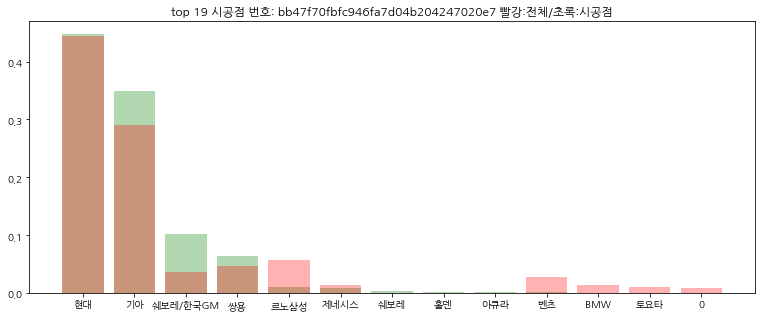

maker
현대          0.575399
기아          0.250114
쉐보레/한국GM    0.078360
제네시스        0.029157
쌍용          0.014579
볼보          0.009567
벤츠          0.008200
BMW         0.007289
르노삼성        0.007289
쉐보레         0.004100
Name: regist_dt, dtype: float64


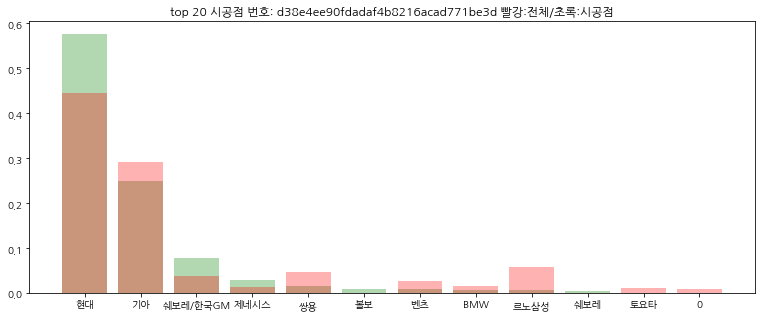

maker
현대          0.487905
기아          0.343977
쌍용          0.036738
쉐보레/한국GM    0.033422
르노삼성        0.029354
제네시스        0.016271
벤츠          0.009602
BMW         0.006631
토요타         0.004004
0           0.003940
Name: regist_dt, dtype: float64


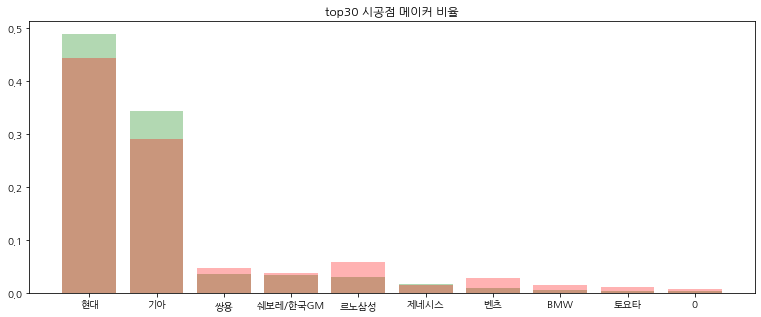

In [157]:
#시공점 별 메이커 비율
total_counts = total_df_item_store.groupby(['maker'])['regist_dt'].count()/len(total_df_item_store)
print(total_counts.sort_values(ascending=False)[0:10])
plt.figure(figsize = (13,5))
plt.title('메이커 비율')
plt.bar(x = total_counts.sort_values(ascending=False)[0:10].index, height = total_counts.sort_values(ascending=False)[0:10])
plt.show()

for i in top_stores[0:20]:
  counts = total_df_item_store[total_df_item_store['store'] == i].groupby(['maker'])['regist_dt'].count().sort_values(ascending=False)[0:10]/len(total_df_item_store[total_df_item_store['store'] == i])
  print(counts)
  plt.figure(figsize = (13,5))
  plt.title(f'top {top_stores.index(i)+1} 시공점 번호: '+i+' 빨강:전체/초록:시공점')
  plt.bar(x = counts.index, height = counts, color='green', alpha=.3)
  plt.bar(x = total_counts.sort_values(ascending=False)[0:10].index, height = total_counts.sort_values(ascending=False)[0:10], color='red', alpha=.3)
  plt.show()

counts_top30 = total_df_item_store[total_df_item_store['store'].isin(top_stores)].groupby(['maker'])['regist_dt'].count().sort_values(ascending=False)[0:10]/len(total_df_item_store[total_df_item_store['store'].isin(top_stores)])
print(counts_top30)
plt.figure(figsize = (13,5))
plt.title(f'top30 시공점 메이커 비율')
plt.bar(x = counts_top30.index, height = counts_top30, color='green', alpha=.3)
plt.bar(x = total_counts.sort_values(ascending=False)[0:10].index, height = total_counts.sort_values(ascending=False)[0:10], color='red', alpha=.3)
plt.show()

## 시공 아이템에 따른 가격차이가 나는지 확인 (인기품목대로 정렬)

In [130]:
item_count = total_df_item_store.groupby(['product_1_name','com_type'])['regist_dt'].count().reset_index()
popular_order = list(item_count[item_count['com_type'] == '1. 측2 후 전 '].sort_values(by = 'regist_dt', ascending=False).product_1_name)


In [132]:
item_price2_p1_t1

,product_1_name,com_type,price
52,Tundra,1. 측2 후 전,2.700000e+06
58,Vertex 1100,1. 측2 후 전,2.006000e+06
77,Vertex 900,1. 측2 후 전,1.319850e+06
54,Vertex,1. 측2 후 전,1.300000e+06
7,Bisanti,1. 측2 후 전,1.138333e+06
71,Vertex 700,1. 측2 후 전,9.726357e+05
65,Vertex 600,1. 측2 후 전,8.928571e+05
50,TNT,1. 측2 후 전,8.618750e+05
17,Latitude,1. 측2 후 전,8.363068e+05
12,Cirrus,1. 측2 후 전,8.200000e+05


In [135]:

item_price2_p1_t1['item_order'] = pd.Categorical(
    item_price2_p1_t1['product_1_name'], 
    categories=popular_order, 
    ordered=True
)
item_price2_p1_t1.sort_values('item_order')

,product_1_name,com_type,price,item_order
0,Artisan,1. 측2 후 전,6.666279e+05,Artisan
45,Super,1. 측2 후 전,6.161570e+05,Super
36,Star,1. 측2 후 전,5.510993e+05,Star
17,Latitude,1. 측2 후 전,8.363068e+05,Latitude
71,Vertex 700,1. 측2 후 전,9.726357e+05,Vertex 700
61,Vertex 500,1. 측2 후 전,5.361538e+05,Vertex 500
50,TNT,1. 측2 후 전,8.618750e+05,TNT
77,Vertex 900,1. 측2 후 전,1.319850e+06,Vertex 900
26,Pinnacle,1. 측2 후 전,7.041429e+05,Pinnacle
66,Vertex 650,1. 측2 후 전,7.890909e+05,Vertex 650


### 전면 시공 아이템에 따른 가격차이가 나는지 확인 (인기품목대로 정렬)


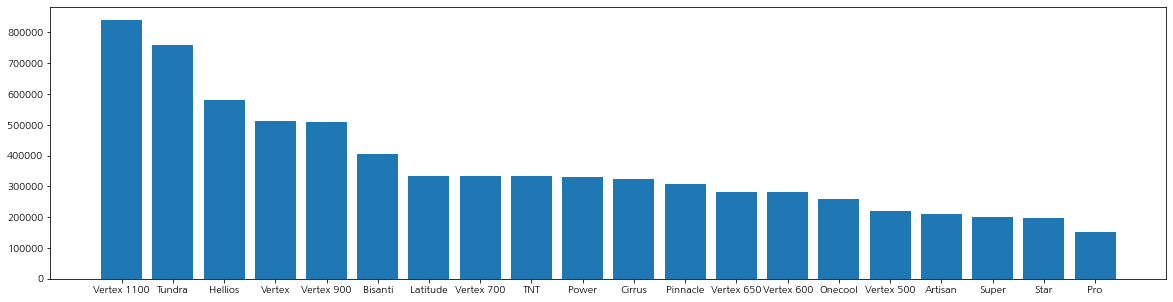

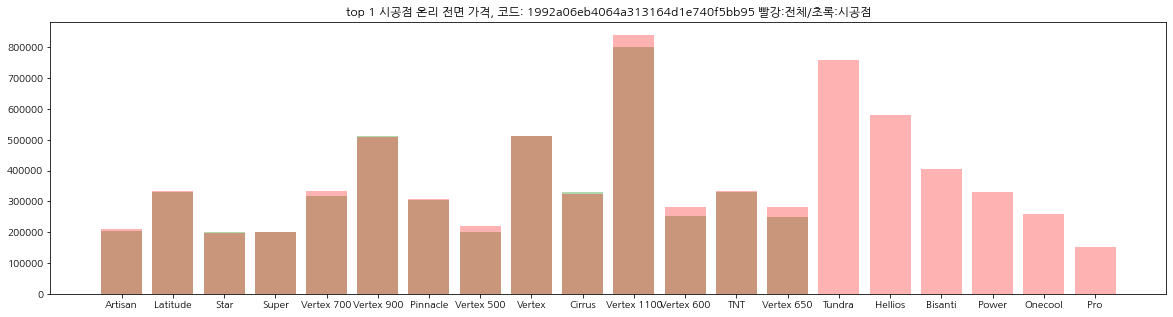

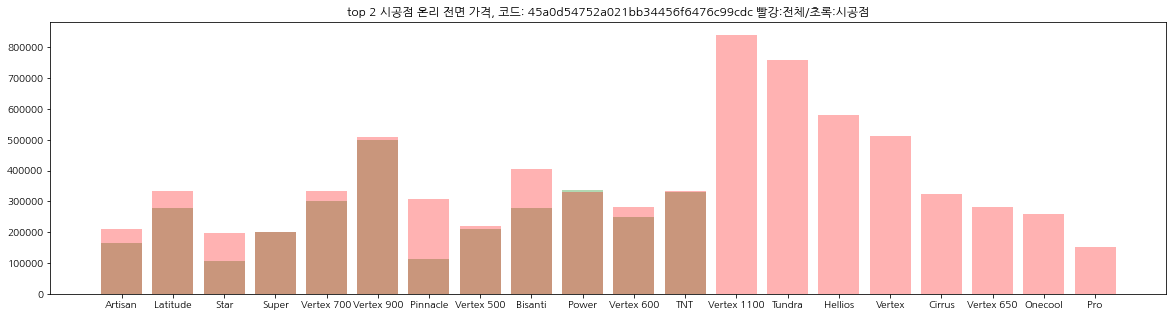

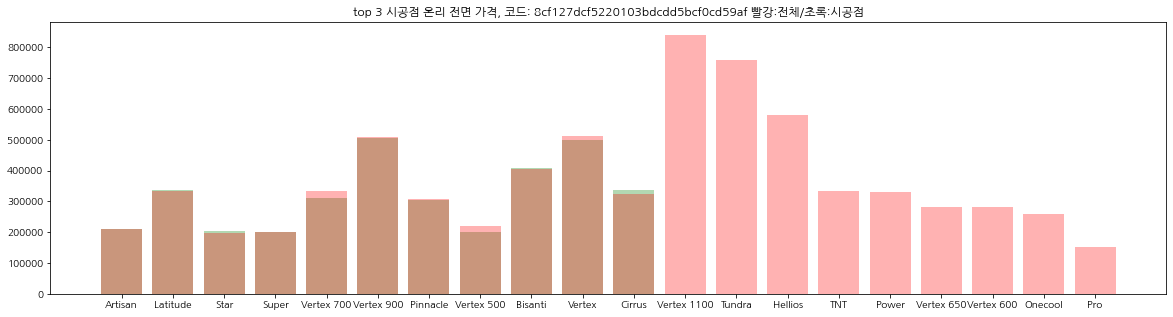

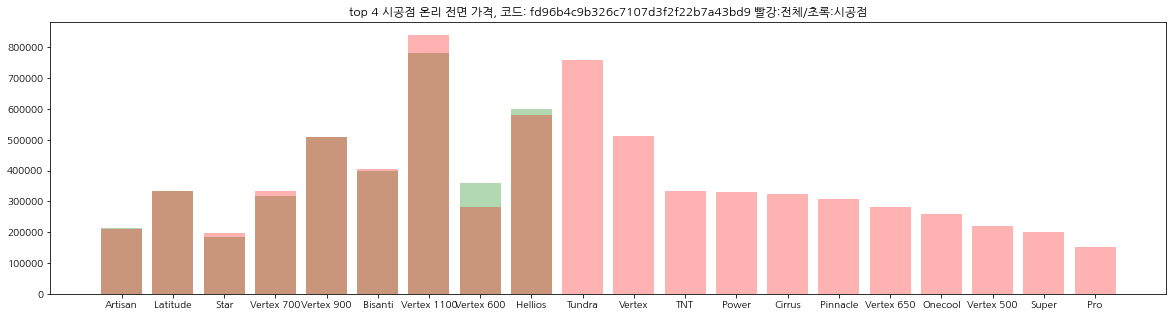

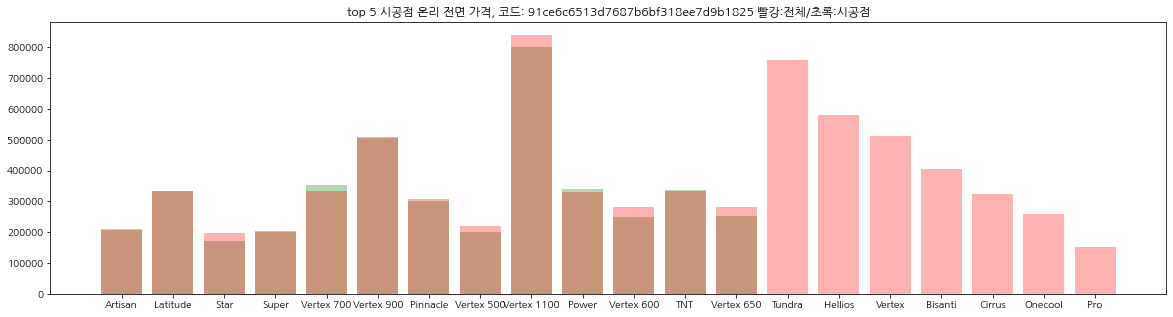

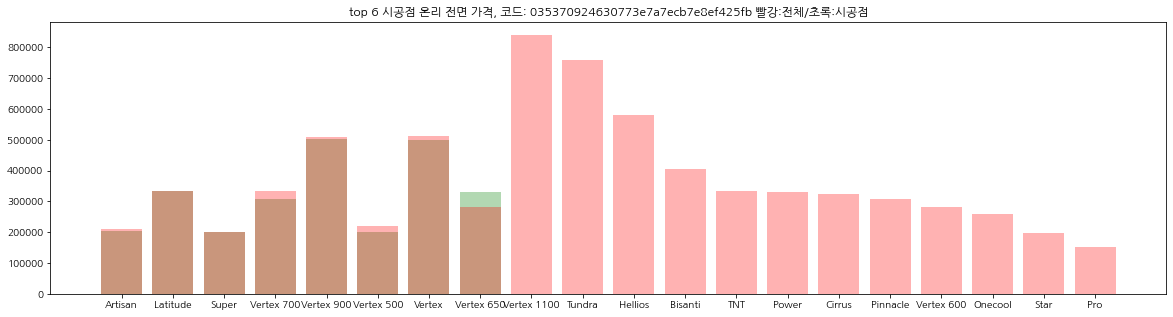

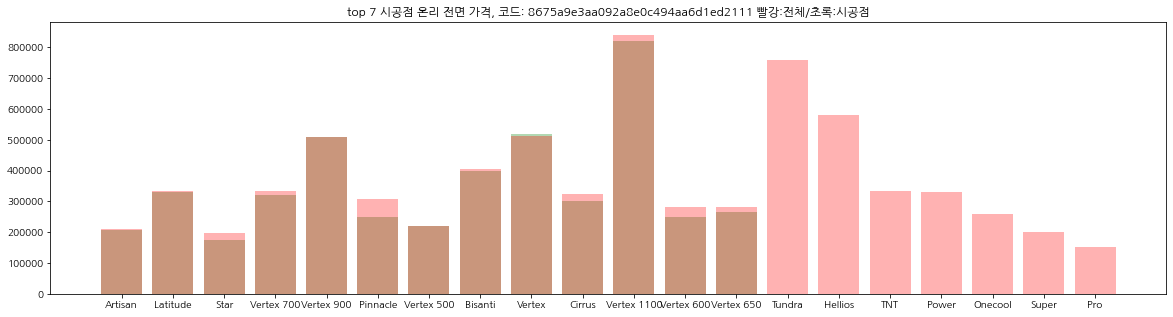

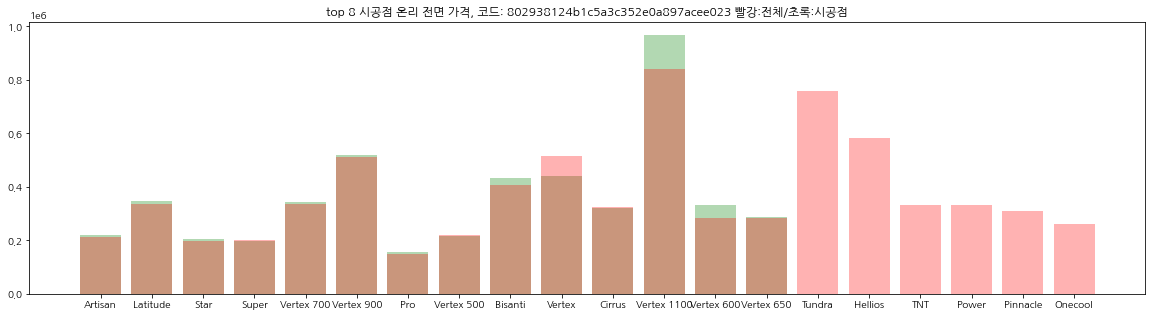

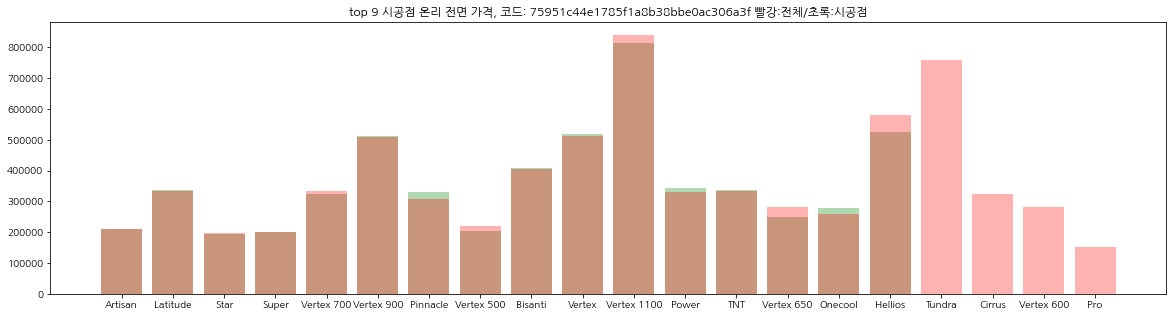

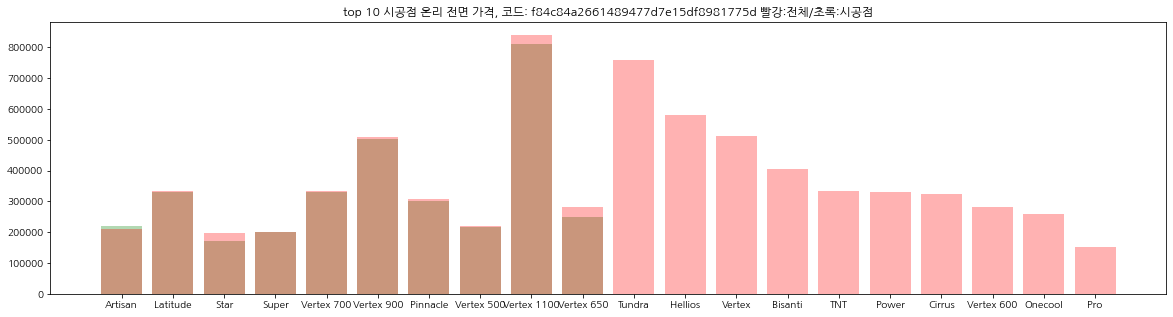

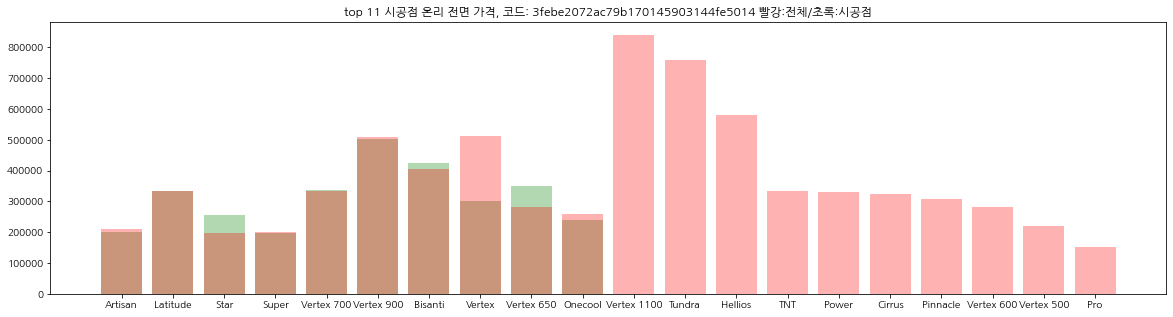

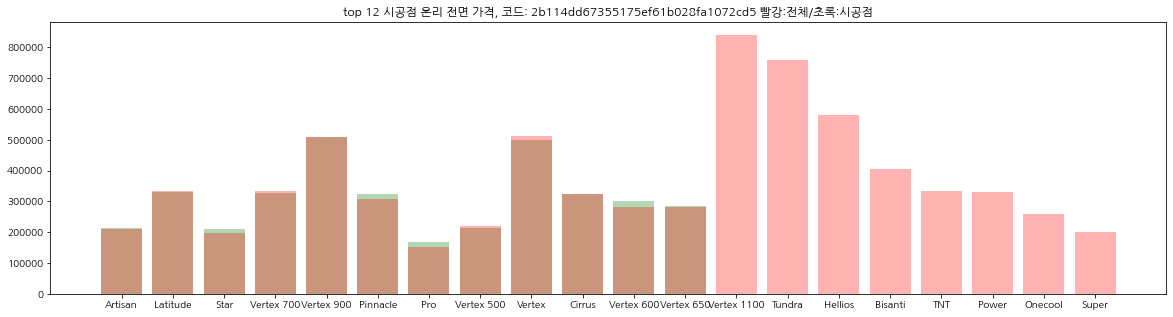

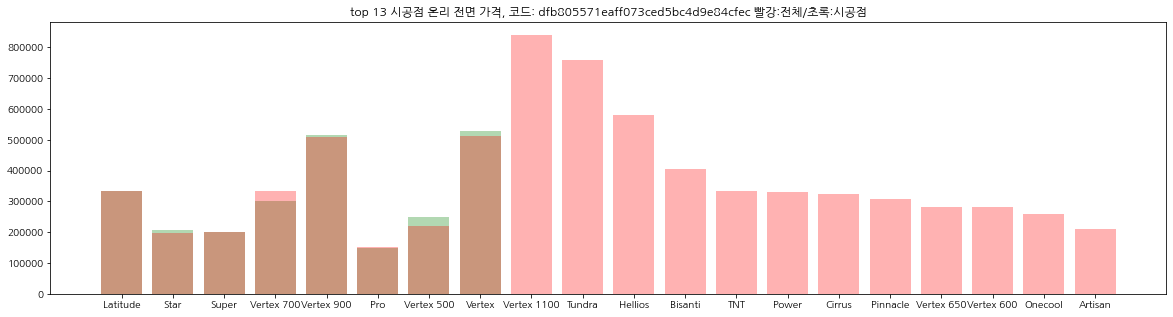

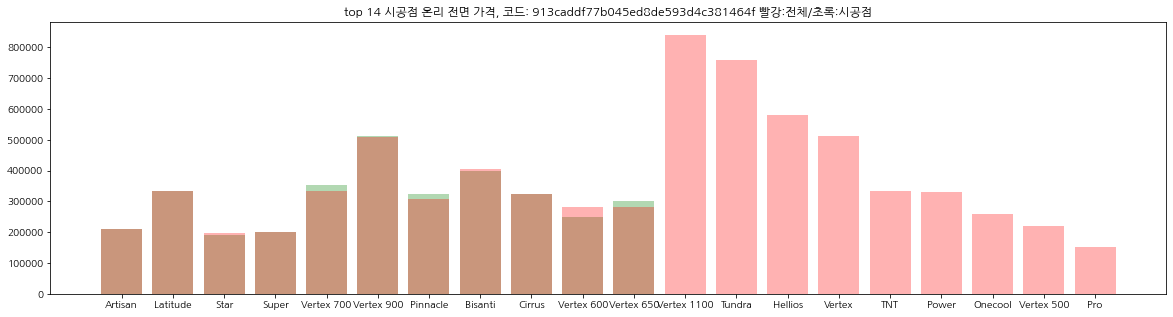

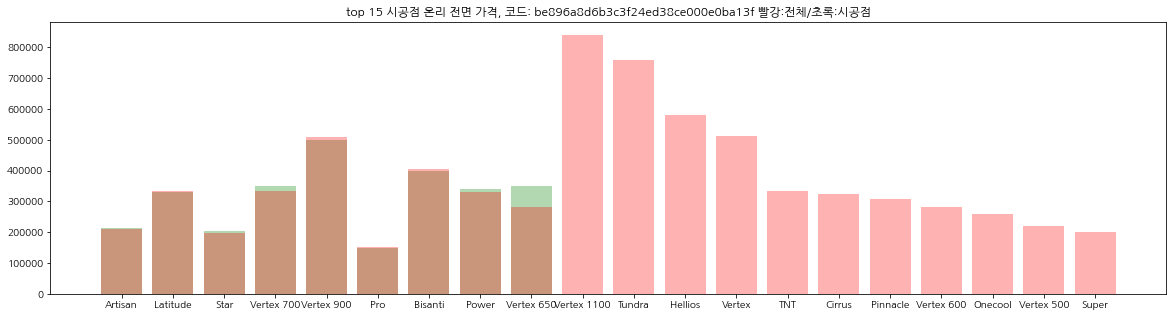

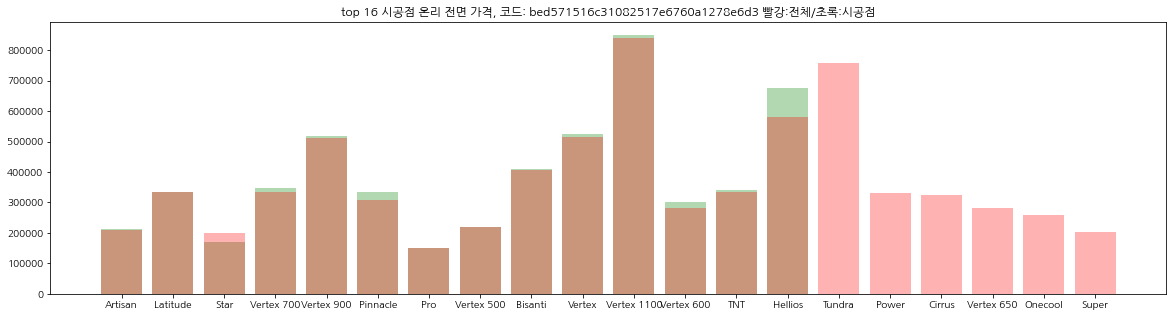

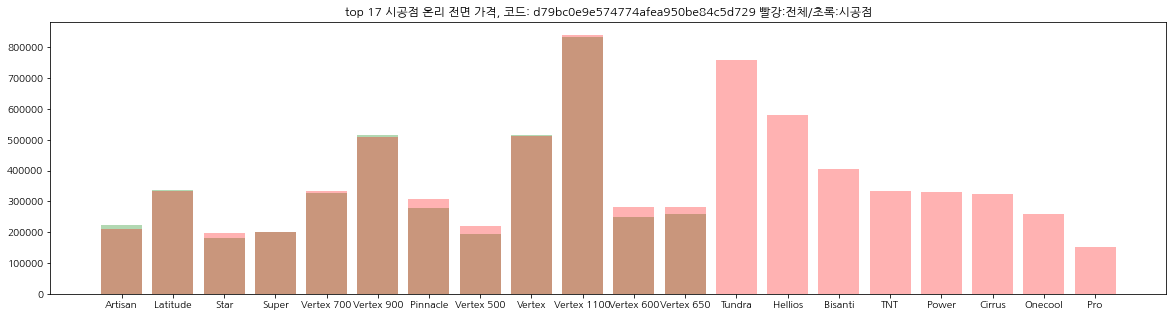

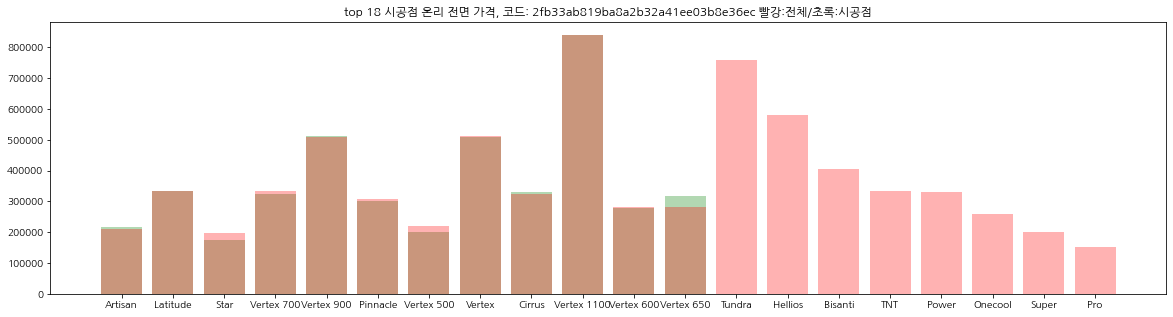

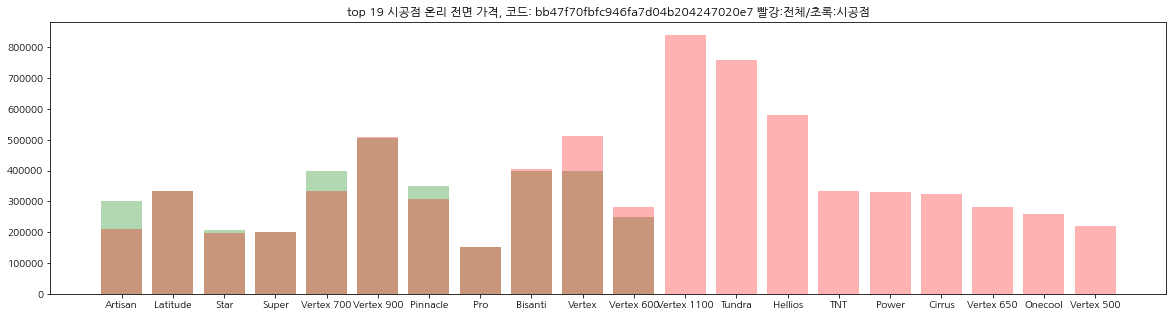

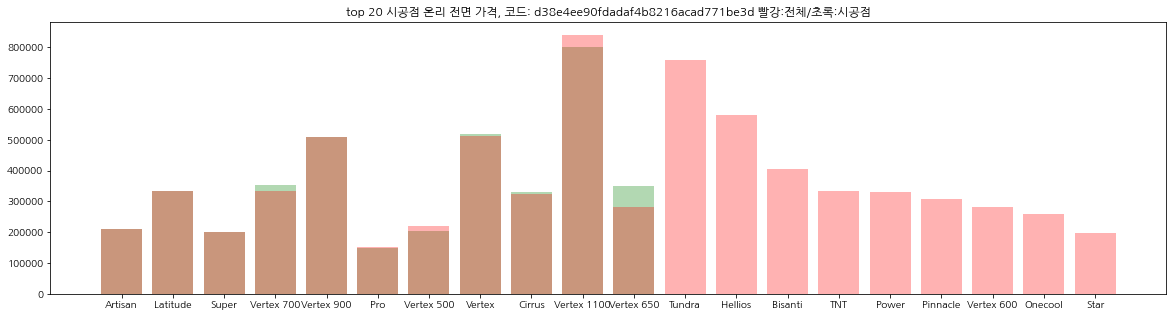

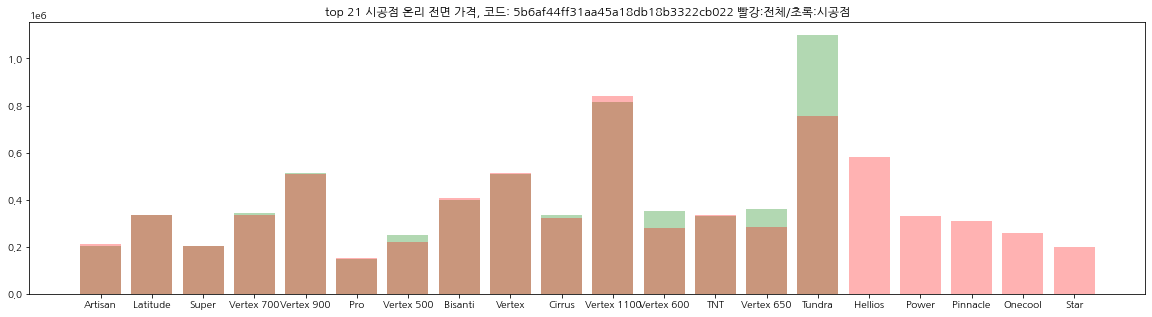

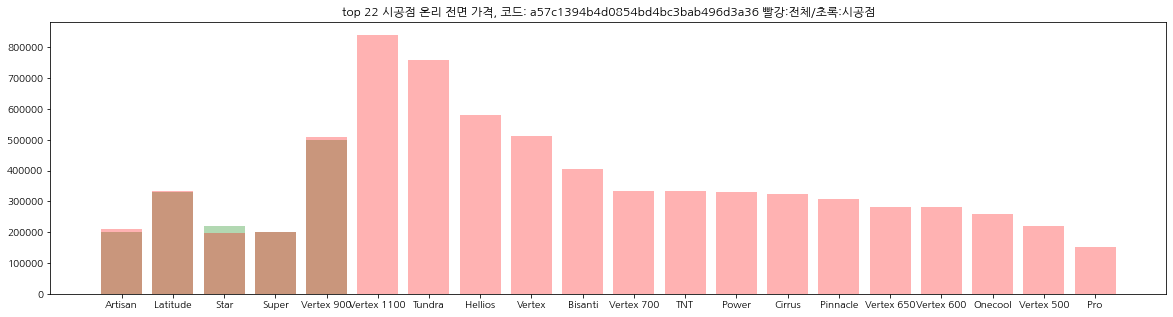

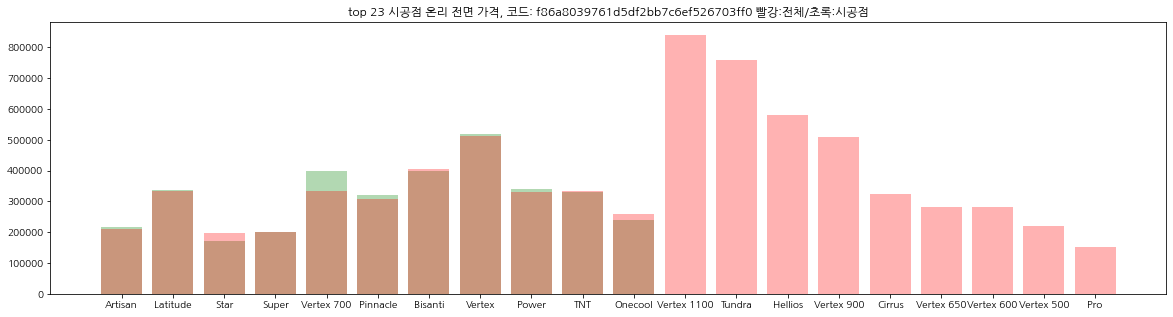

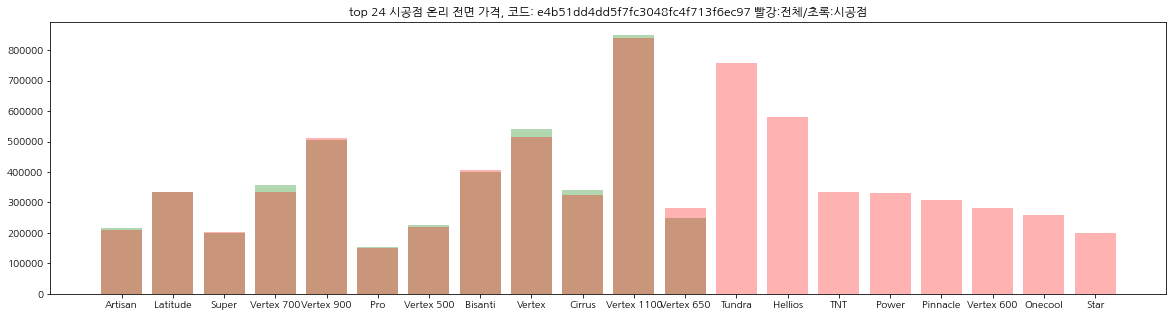

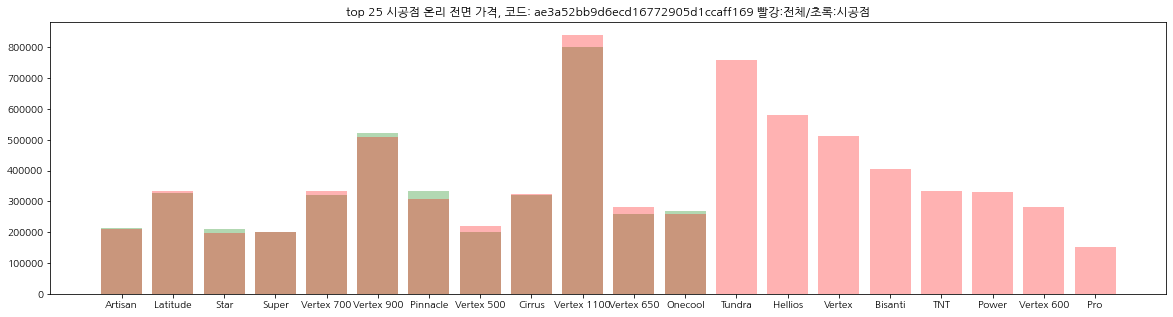

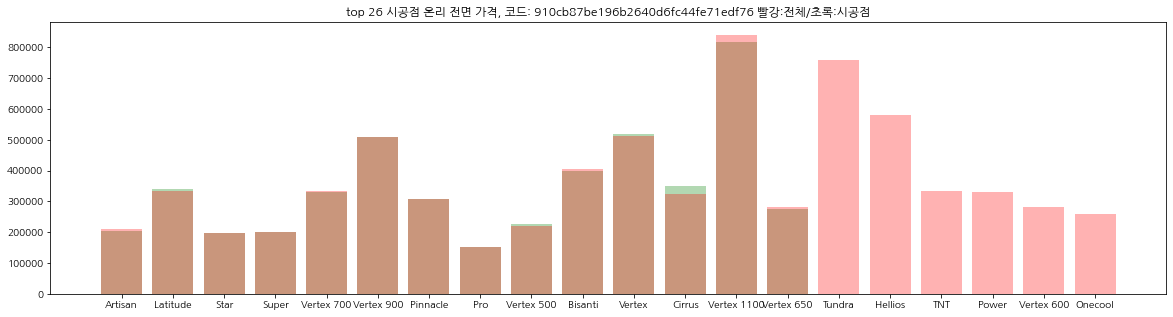

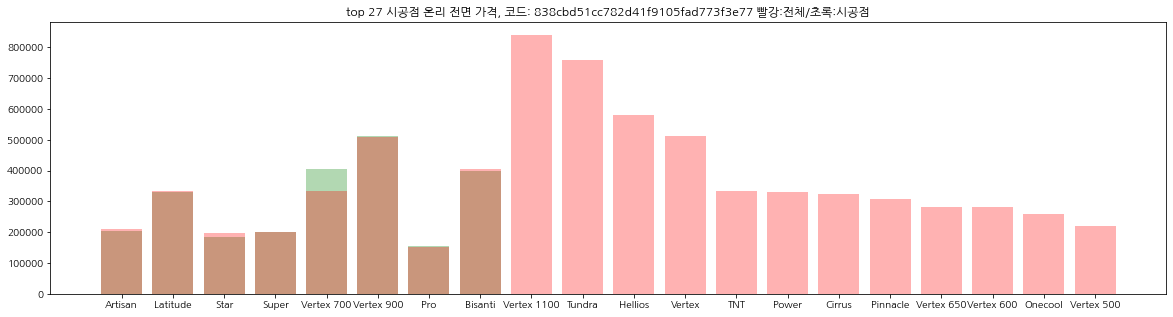

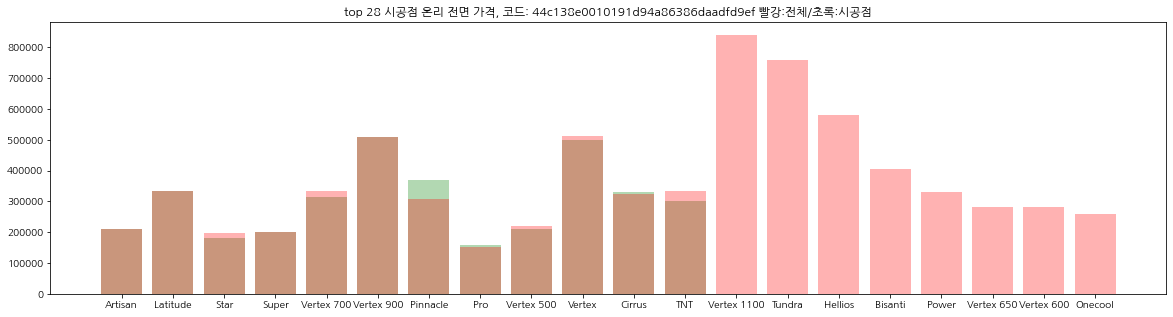

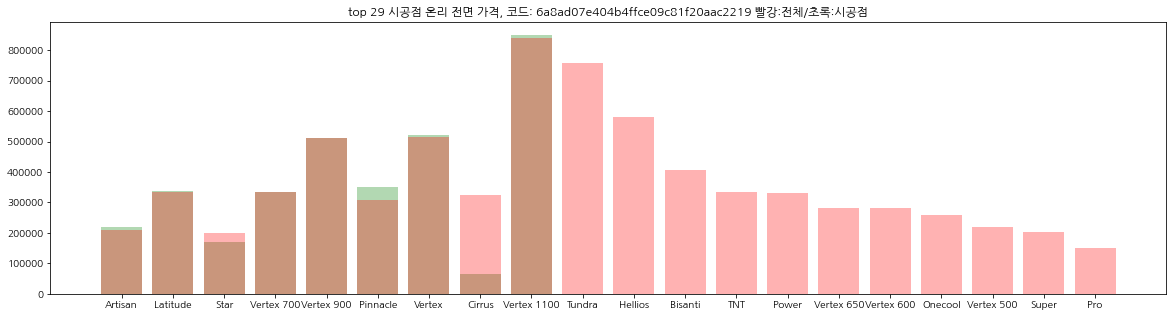

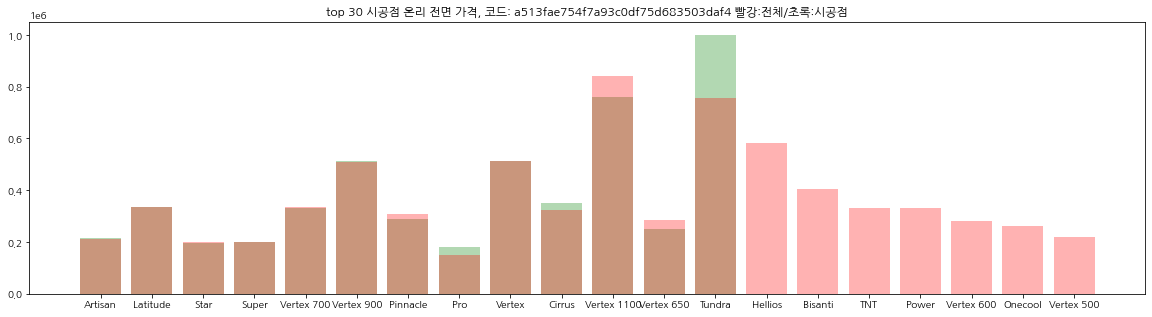

In [155]:
## 측2 후 전 시공 아이템에 따른 가격차이가 나는지 확인 (인기품목대로 정렬)
item_price = total_df_item_store.groupby(['product_5_name','com_type'])['price'].mean().reset_index()
item_price_p5_t2 = item_price[item_price['com_type'] == '2. 전'].sort_values(by = 'price', ascending=False)
plt.figure(figsize = (20,5))
plt.bar(item_price_p5_t2.product_5_name,item_price_p5_t2.price)
plt.show()

item_count = total_df_item_store.groupby(['product_5_name','com_type'])['regist_dt'].count().reset_index()

popular_order2 = list(item_count[item_count['com_type'] == '2. 전'].sort_values(by = 'regist_dt', ascending=False).product_5_name)

for i in top_stores:
  item_price2 = total_df_item_store[total_df_item_store.store == i].groupby(['product_5_name','com_type'])['price'].mean().reset_index()
  item_price2_p5_t2 = item_price2[item_price2['com_type'] == '2. 전'].sort_values(by = 'price', ascending=False)
  item_price2_p5_t2['item_order'] = pd.Categorical(
    item_price2_p5_t2['product_5_name'], 
    categories=popular_order2, 
    ordered=True
  )
  item_price2_p5_t2=item_price2_p5_t2.sort_values('item_order')
  
  plt.figure(figsize = (20,5))
  plt.title(f'top {top_stores.index(i)+1} 시공점 온리 전면 가격, 코드: '+i+' 빨강:전체/초록:시공점')
  plt.bar(item_price2_p5_t2.product_5_name,item_price2_p5_t2.price, color='green', alpha=.3)
  plt.bar(item_price_p5_t2.product_5_name,item_price_p5_t2.price, color='red', alpha=.3)
  plt.show()


### 측면2 후면 전면 시공 아이템에 따른 가격차이가 나는지 확인 (인기품목대로 정렬)

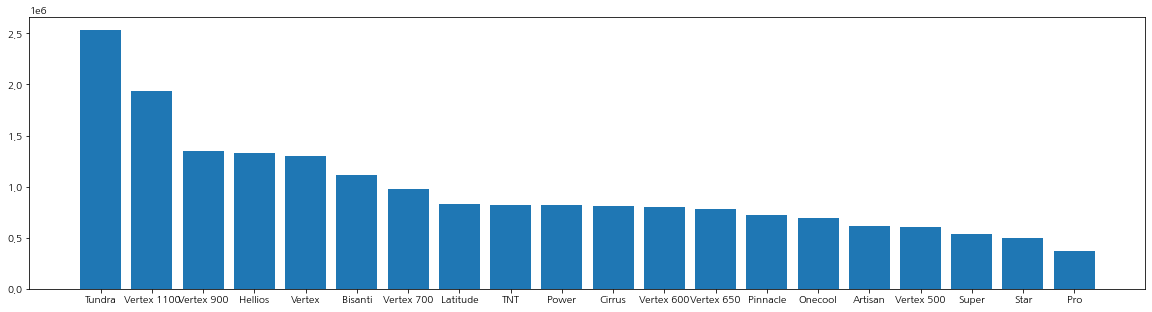

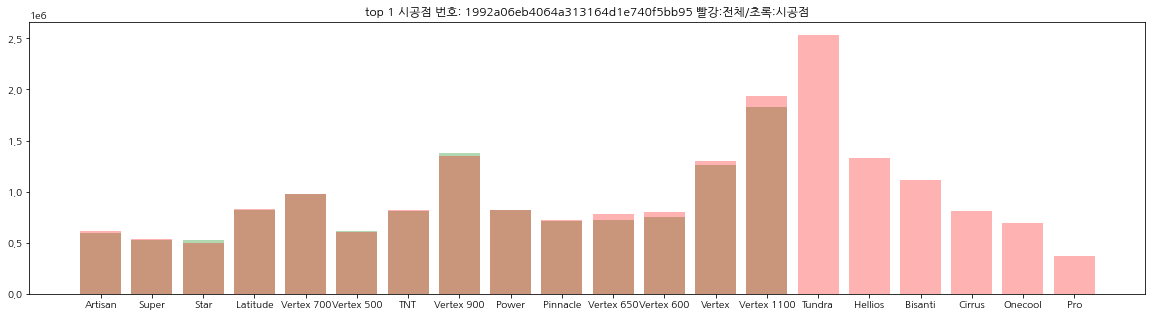

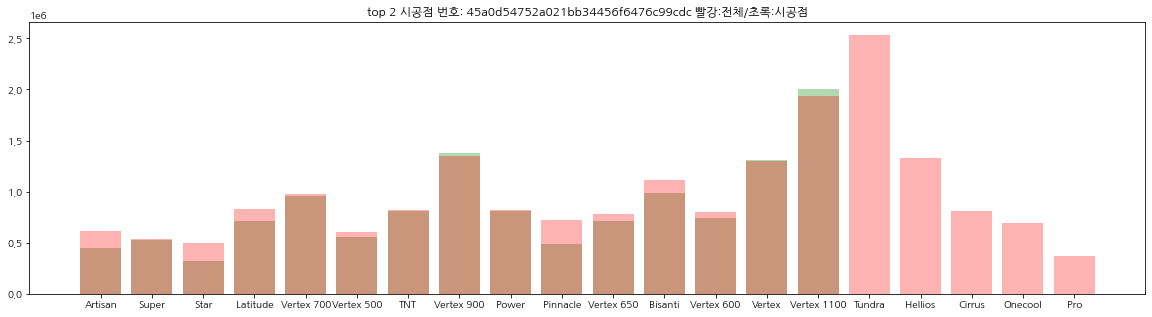

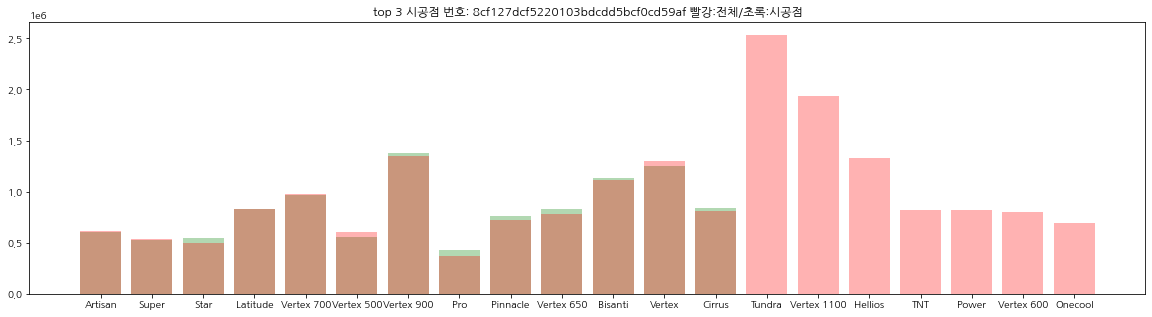

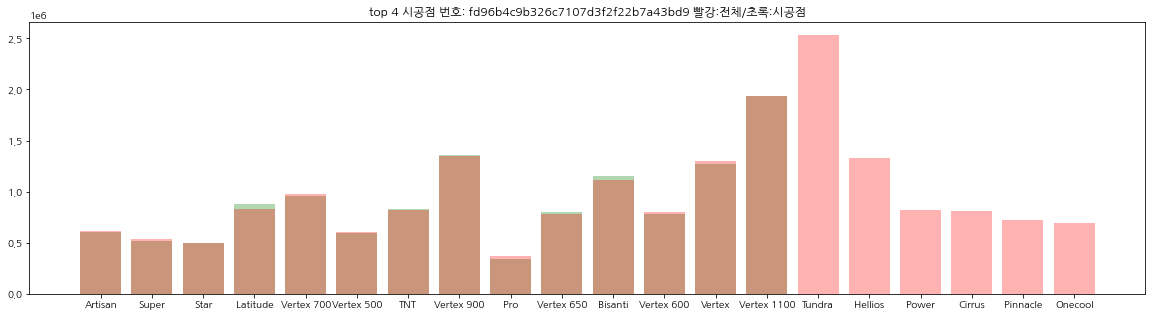

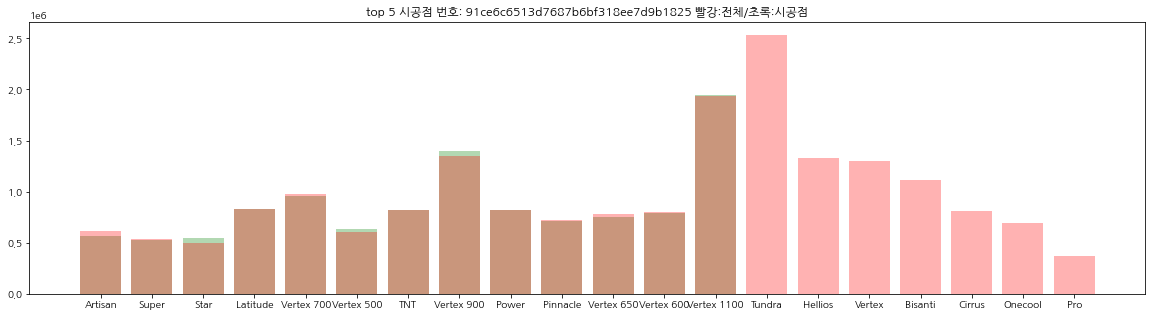

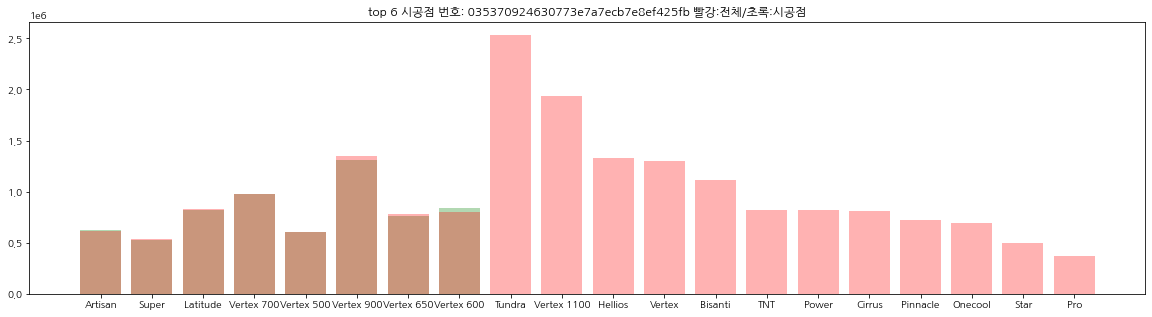

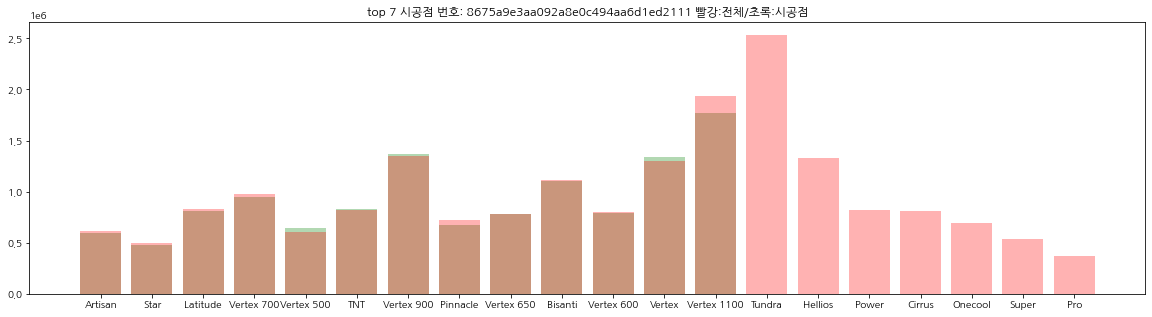

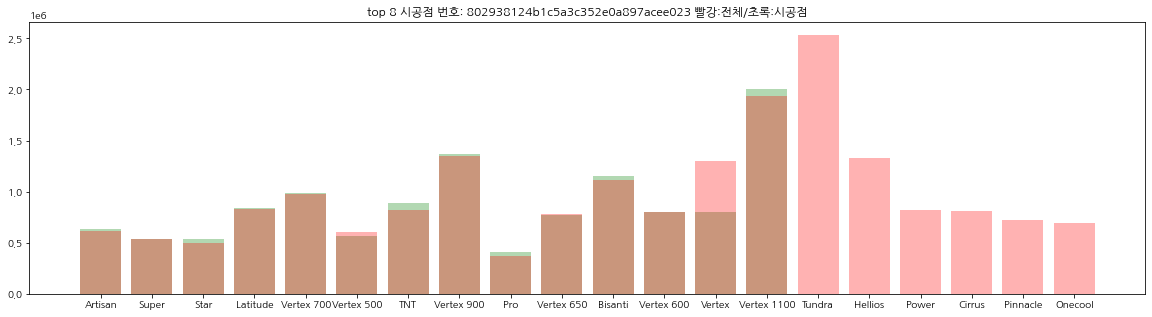

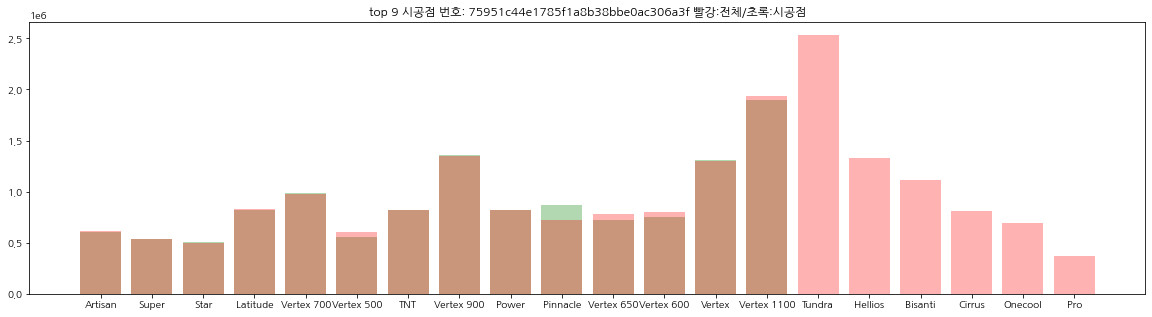

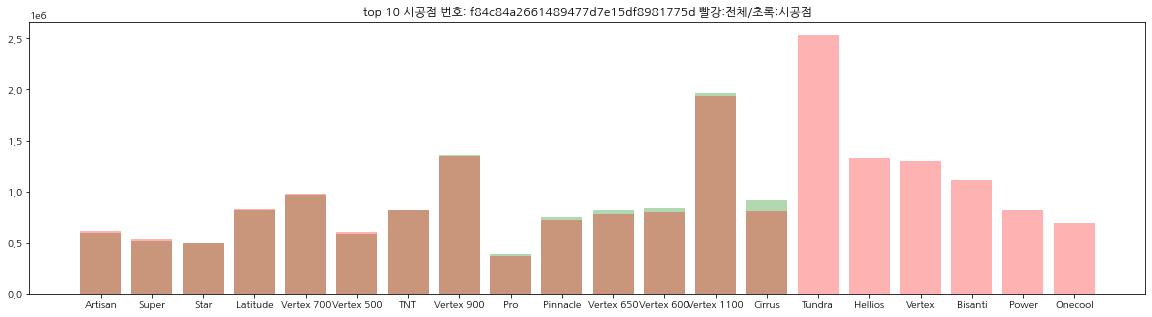

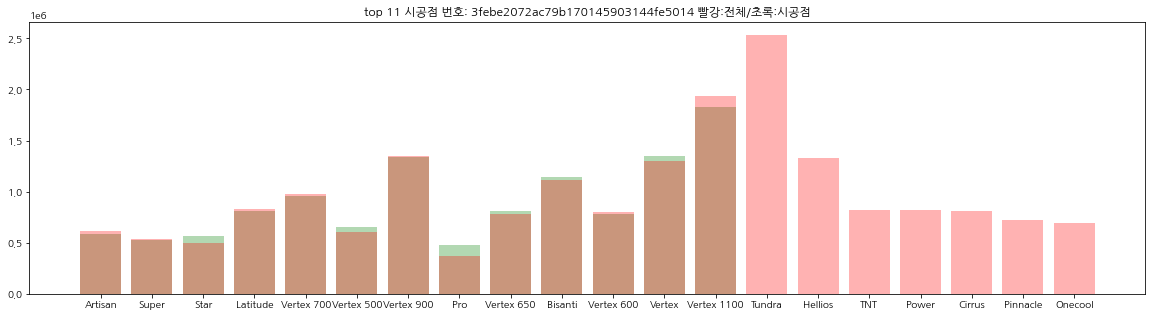

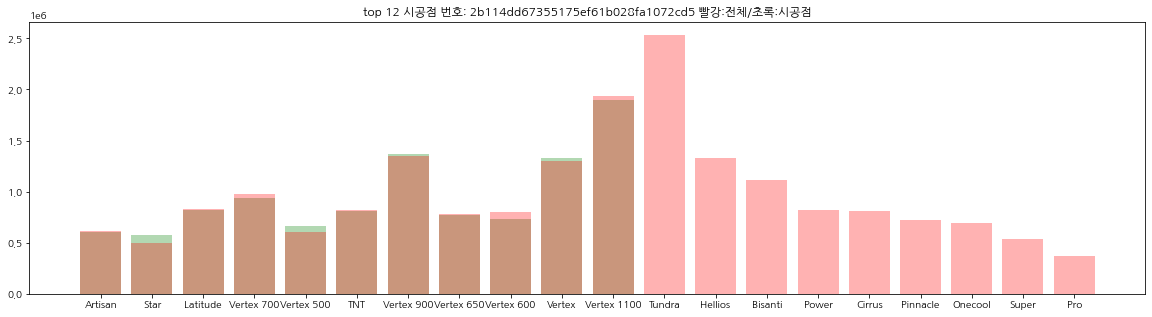

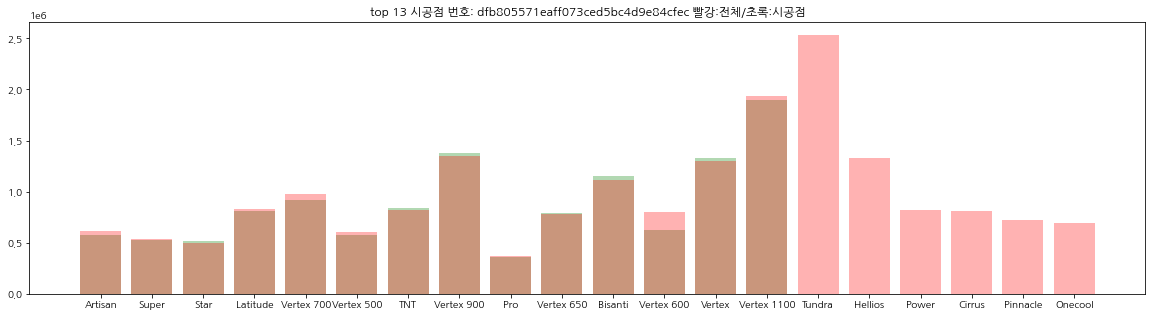

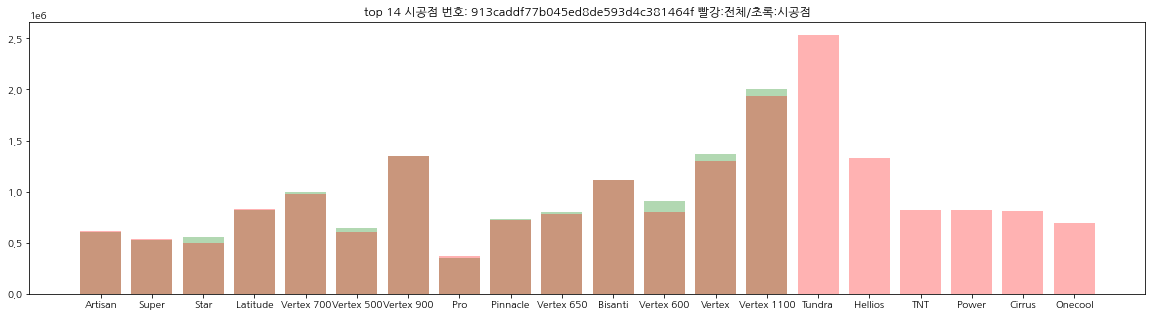

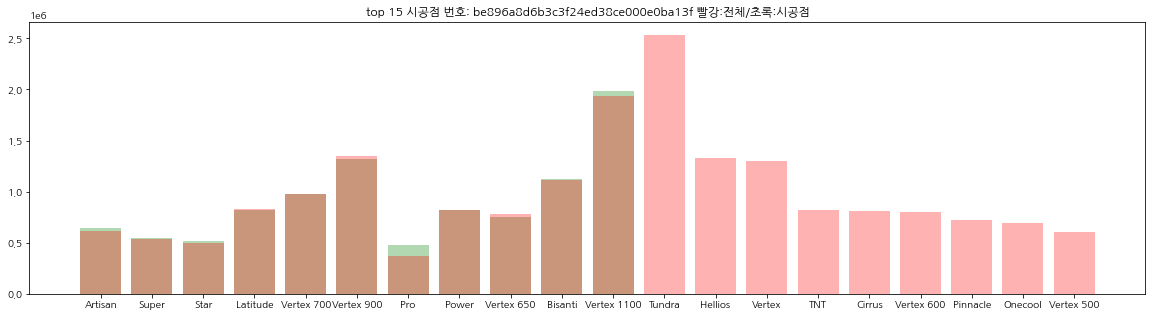

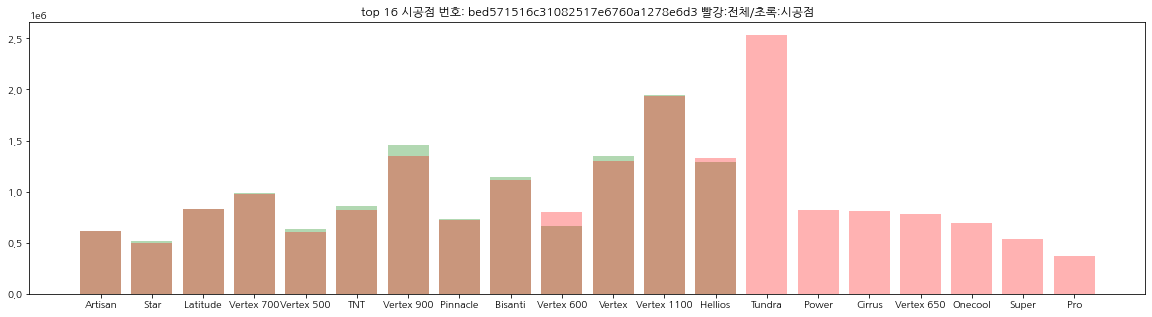

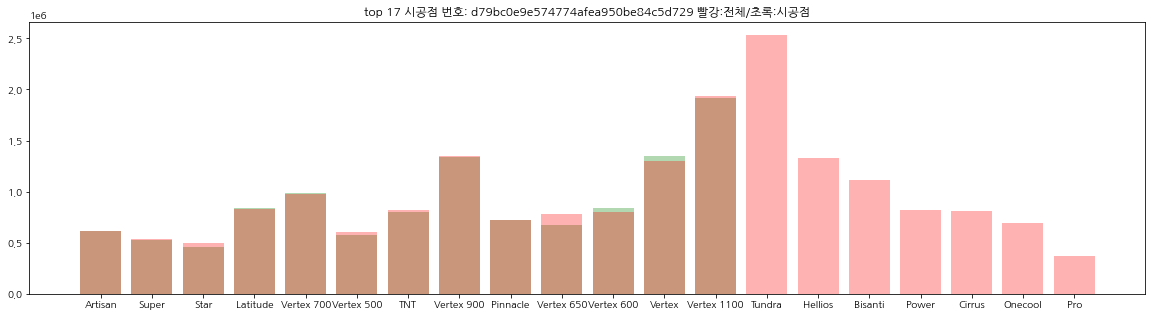

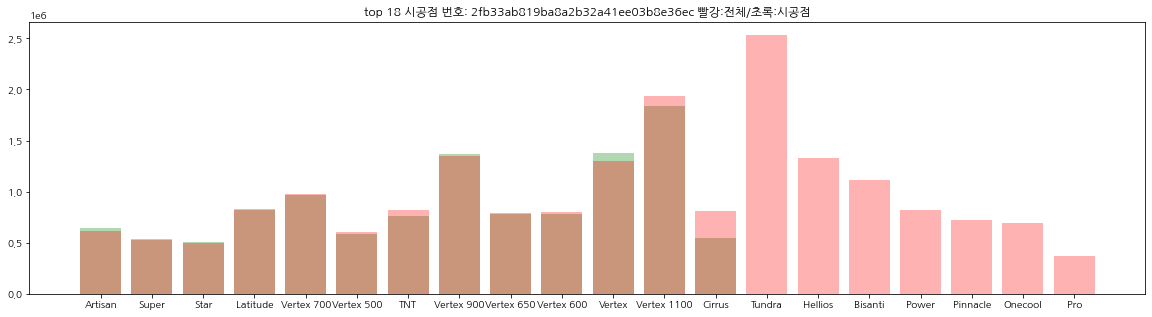

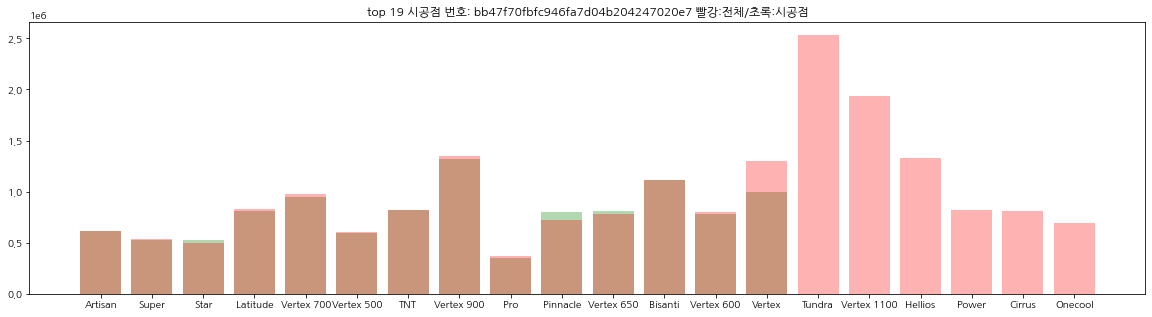

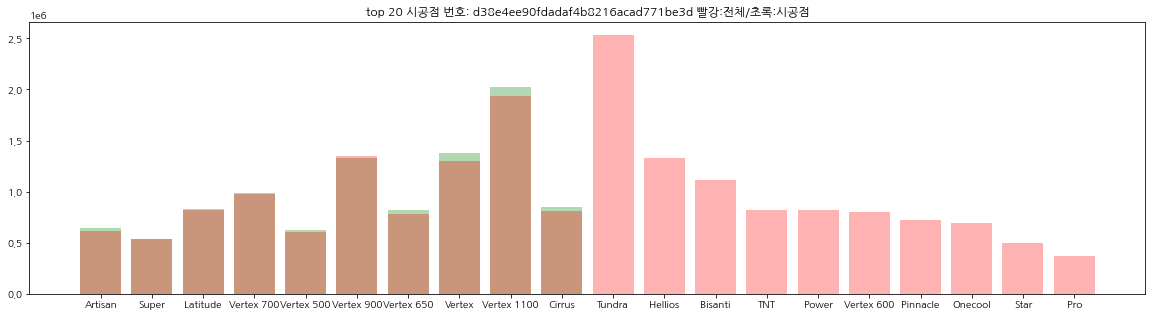

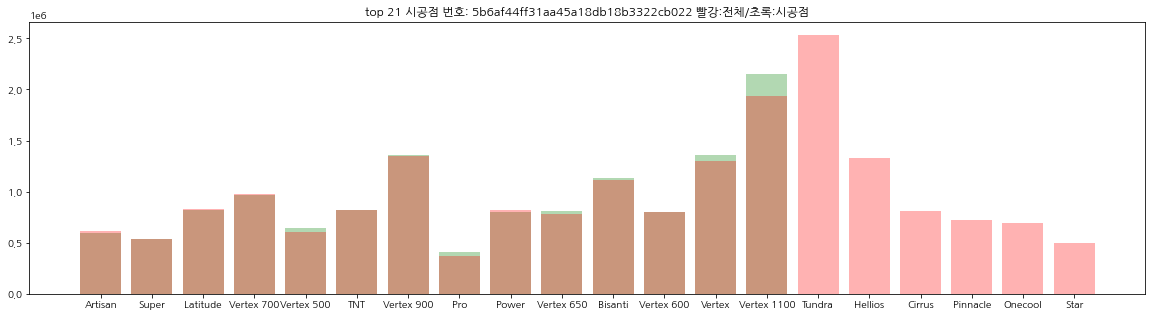

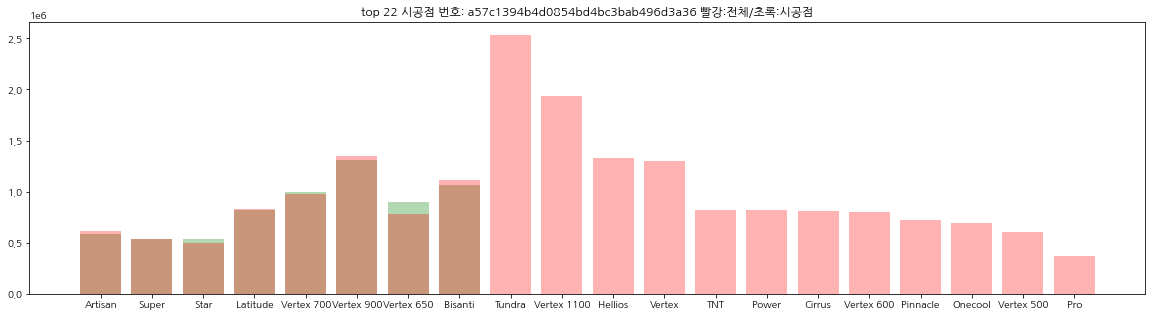

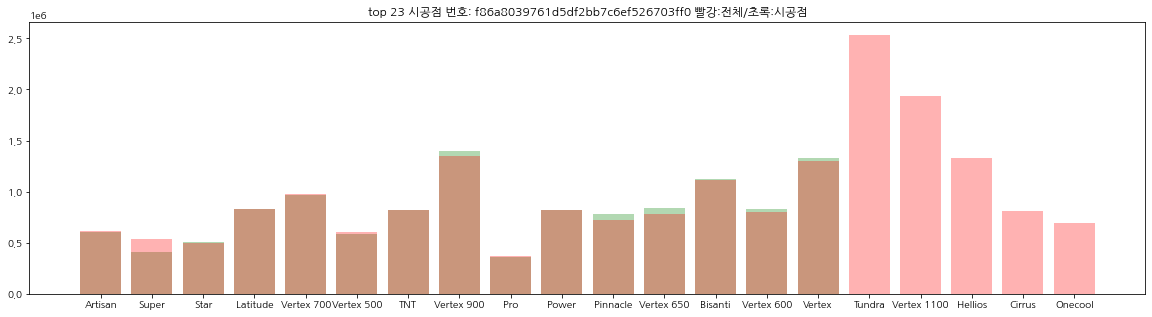

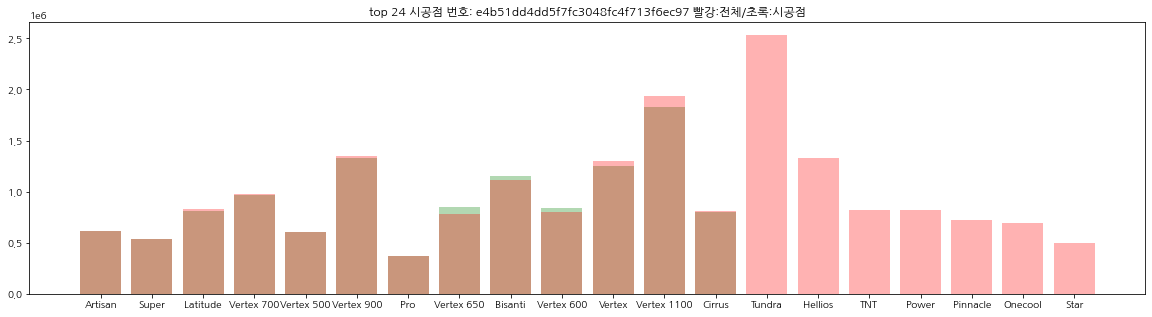

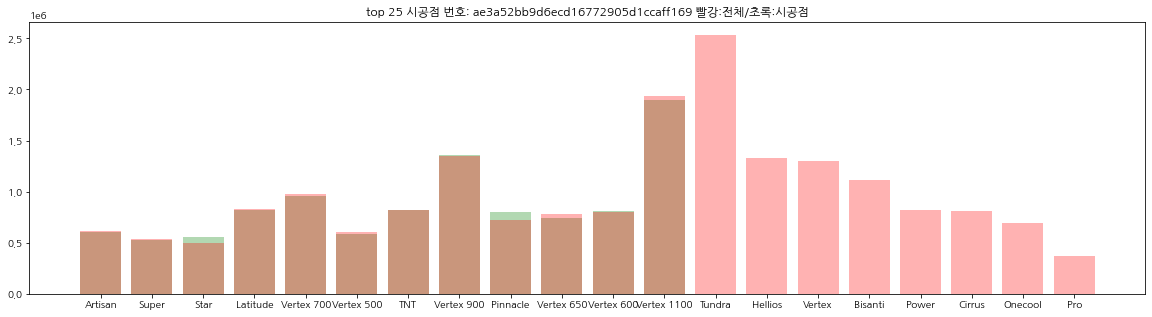

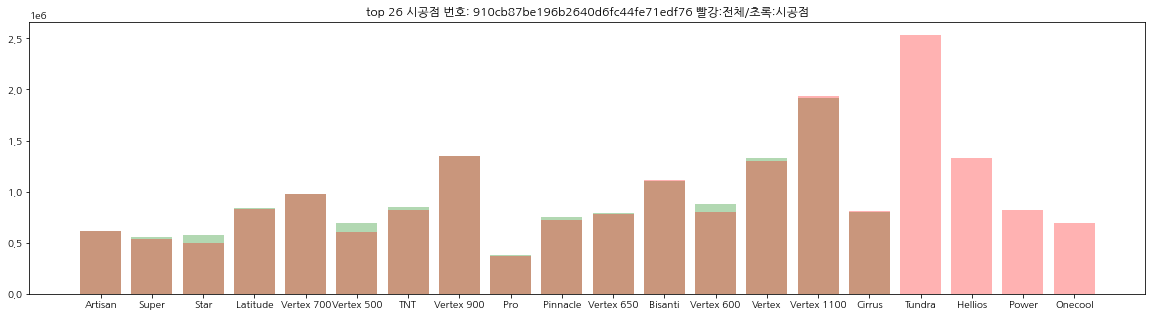

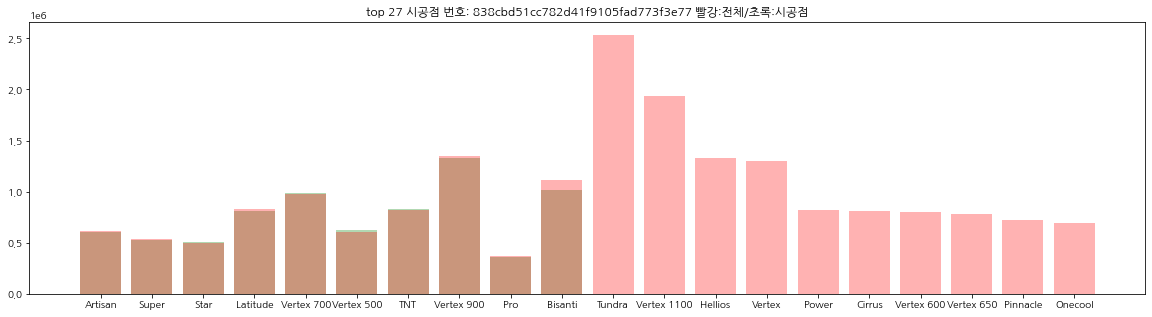

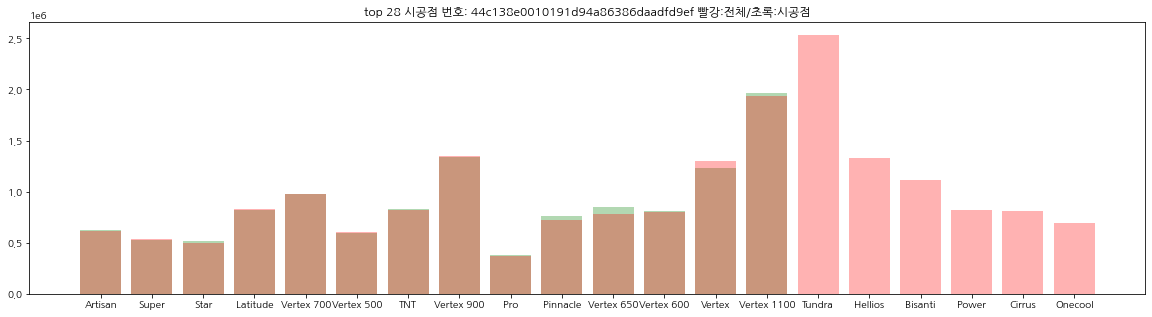

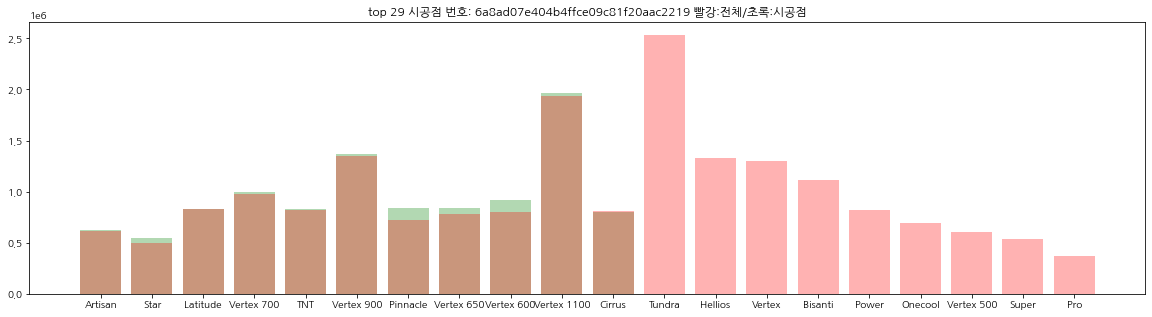

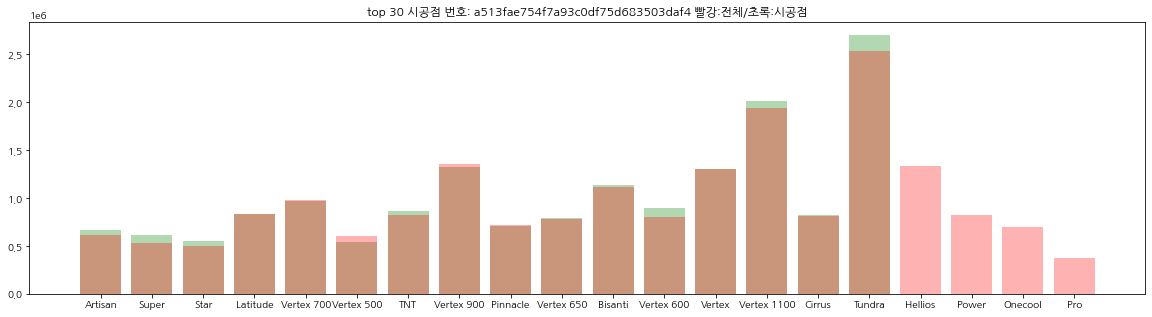

In [154]:
## 전 시공 아이템에 따른 가격차이가 나는지 확인 (인기품목대로 정렬)
item_price = total_df_item_store.groupby(['product_1_name','com_type'])['price'].mean().reset_index()
item_price_p1_t1 = item_price[item_price['com_type'] == '1. 측2 후 전 '].sort_values(by = 'price', ascending=False)
plt.figure(figsize = (20,5))
plt.bar(item_price_p1_t1.product_1_name,item_price_p1_t1.price)
plt.show()

for i in top_stores:
  item_price2 = total_df_item_store[total_df_item_store.store == i].groupby(['product_1_name','com_type'])['price'].mean().reset_index()
  item_price2_p1_t1 = item_price2[item_price2['com_type'] == '1. 측2 후 전 '].sort_values(by = 'price', ascending=False)
  item_price2_p1_t1['item_order'] = pd.Categorical(
    item_price2_p1_t1['product_1_name'], 
    categories=popular_order, 
    ordered=True
  )
  item_price2_p1_t1=item_price2_p1_t1.sort_values('item_order')
  
  plt.figure(figsize = (20,5))
  plt.title(f'top {top_stores.index(i)+1} 측면2 후면 전면 가격 시공점 번호: '+i+' 빨강:전체/초록:시공점')
  plt.bar(item_price2_p1_t1.product_1_name,item_price2_p1_t1.price, color='green', alpha=.3)
  plt.bar(item_price_p1_t1.product_1_name,item_price_p1_t1.price, color='red', alpha=.3)
  plt.show()


## 시공점 top11 모델

model
그랜저      0.104585
싼타페      0.067837
제네시스     0.056885
쏘렌토      0.050683
아반떼      0.044962
쏘나타      0.044742
카니발      0.037369
K5       0.035697
K7       0.034002
팰리세이드    0.032163
Name: regist_dt, dtype: float64


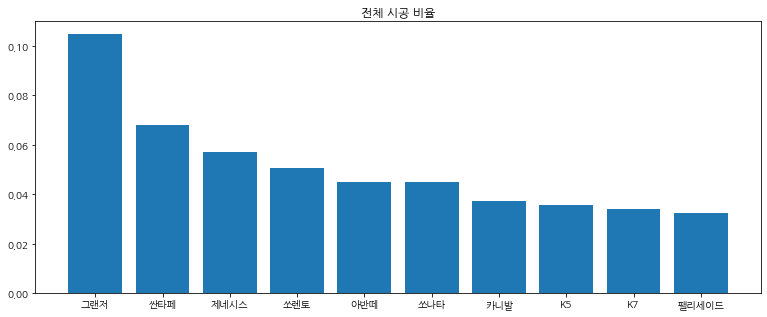

model
그랜저      0.109385
싼타페      0.072356
카니발      0.067674
아반떼      0.065120
쏘나타      0.063631
쏘렌토      0.062141
제네시스     0.051926
K5       0.044690
코나       0.042349
팰리세이드    0.039796
Name: regist_dt, dtype: float64


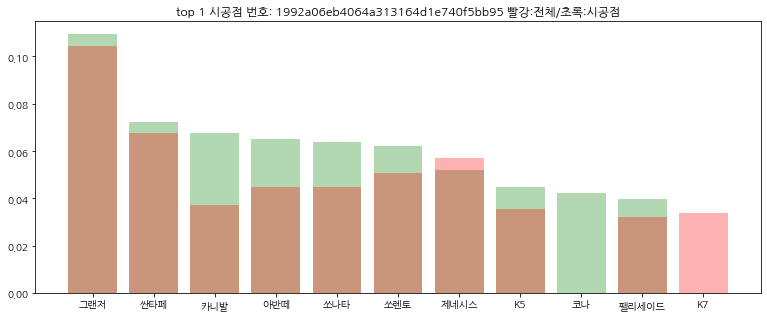

model
그랜저      0.143462
싼타페      0.076712
아반떼      0.068493
제네시스     0.066999
쏘나타      0.064259
쏘렌토      0.057534
팰리세이드    0.045081
K5       0.044085
K7       0.040349
카니발      0.035616
Name: regist_dt, dtype: float64


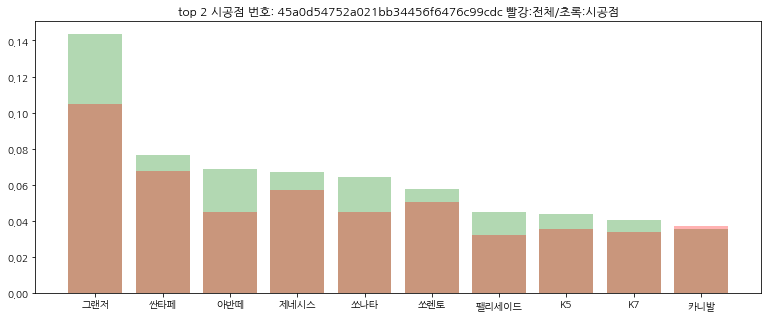

model
그랜저      0.175509
싼타페      0.115756
쏘나타      0.084137
아반떼      0.081726
제네시스     0.069936
팰리세이드    0.051983
코나       0.041265
QM6      0.035906
투싼       0.035638
쏘렌토      0.025188
Name: regist_dt, dtype: float64


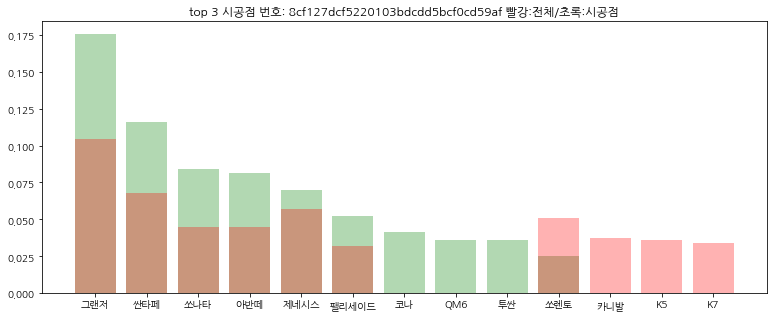

model
그랜저    0.094536
쏘렌토    0.071408
싼타페    0.065337
K5     0.063891
쏘나타    0.054640
아반떼    0.054640
카니발    0.048569
모닝     0.047702
K7     0.045389
K3     0.044232
Name: regist_dt, dtype: float64


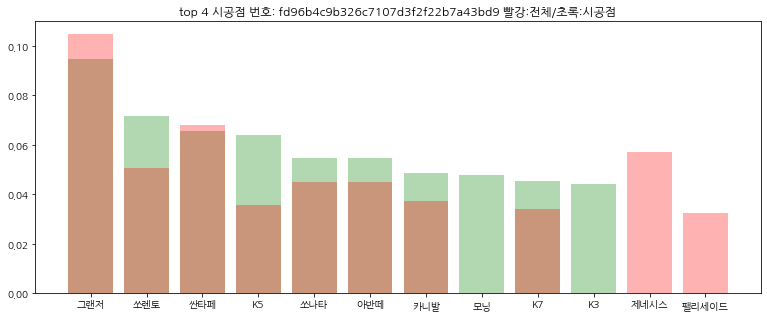

model
그랜저     0.101769
쏘렌토     0.097114
K7      0.078188
K5      0.062675
싼타페     0.053677
카니발     0.052746
셀토스     0.049023
쏘나타     0.043438
제네시스    0.040335
K3      0.036922
Name: regist_dt, dtype: float64


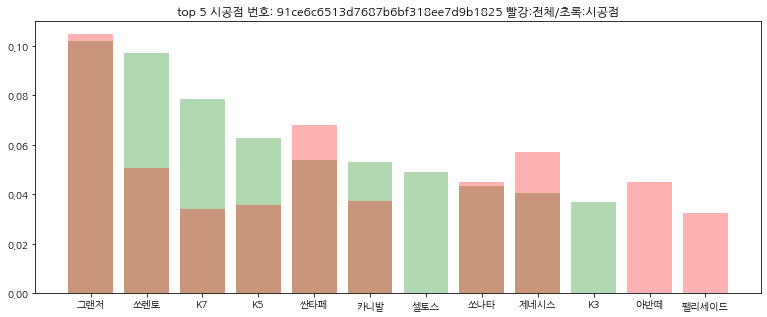

model
그랜저     0.099399
쏘렌토     0.087369
싼타페     0.071542
카니발     0.060779
K5      0.059829
K7      0.059513
K3      0.055714
제네시스    0.046850
셀토스     0.044634
아반떼     0.043685
Name: regist_dt, dtype: float64


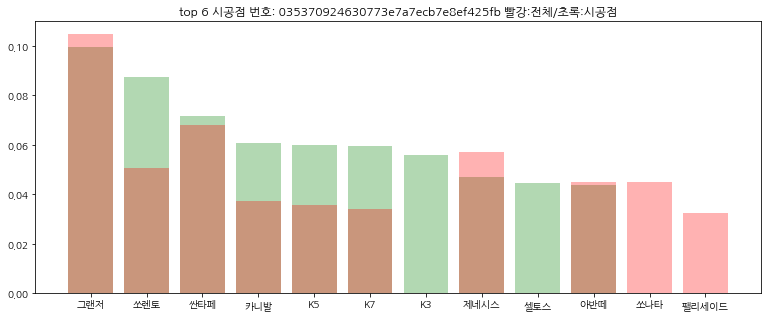

model
그랜저     0.094563
쏘렌토     0.059638
싼타페     0.056672
제네시스    0.051071
쏘나타     0.048435
카니발     0.046787
K5      0.042175
티볼리     0.039209
아반떼     0.033608
K7      0.033278
Name: regist_dt, dtype: float64


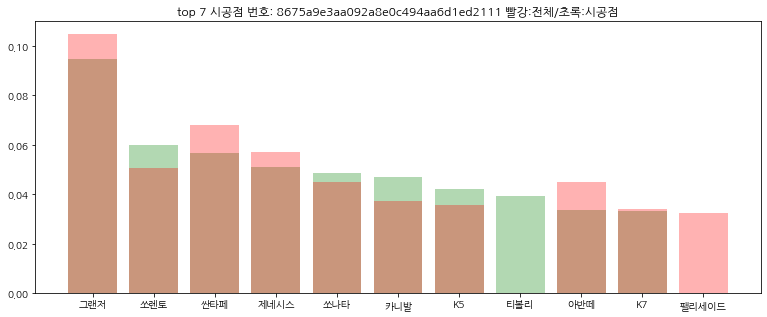

model
그랜저      0.099901
싼타페      0.077407
제네시스     0.061528
아반떼      0.052266
쏘나타      0.042342
E-클래스    0.039696
팰리세이드    0.031426
코나       0.030764
투싼       0.029110
쏘렌토      0.028779
Name: regist_dt, dtype: float64


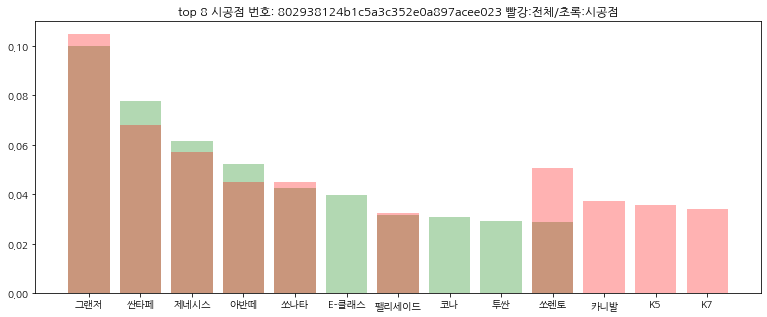

model
그랜저      0.143621
제네시스     0.079116
싼타페      0.070563
아반떼      0.059159
쏘나타      0.045973
카니발      0.036351
팰리세이드    0.035282
K7       0.029936
쏘렌토      0.028867
코나       0.028154
Name: regist_dt, dtype: float64


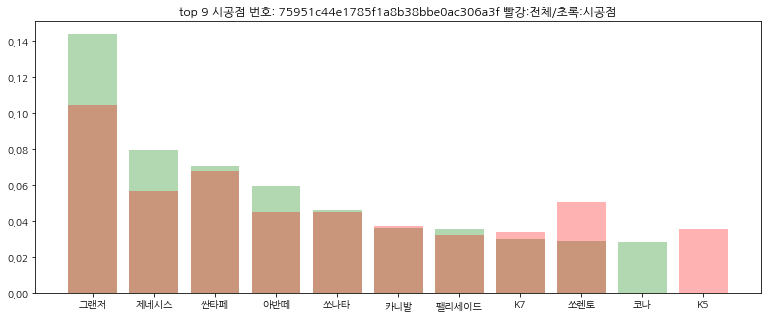

model
그랜저      0.149872
싼타페      0.111763
제네시스     0.081348
쏘나타      0.060095
아반떼      0.058996
쏘렌토      0.054965
코나       0.044339
팰리세이드    0.043606
카니발      0.035178
K7       0.034445
Name: regist_dt, dtype: float64


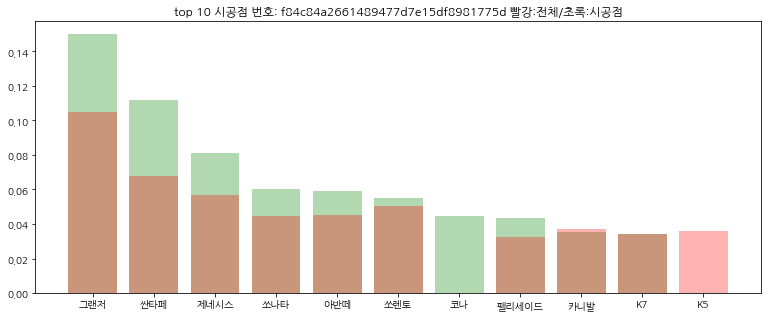

model
그랜저      0.117539
싼타페      0.074060
쏘렌토      0.070376
카니발      0.070007
제네시스     0.060059
K5       0.053058
쏘나타      0.052690
K7       0.044215
아반떼      0.041636
팰리세이드    0.038320
Name: regist_dt, dtype: float64


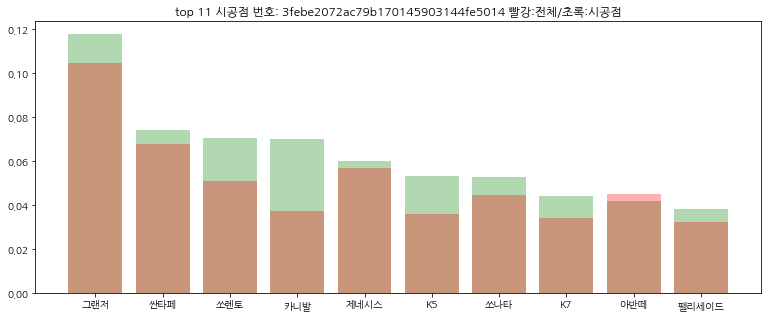

model
쏘렌토     0.102041
그랜저     0.077922
카니발     0.074954
K5      0.070130
K7      0.062338
싼타페     0.056772
제네시스    0.046382
아반떼     0.043414
셀토스     0.042301
K3      0.033395
Name: regist_dt, dtype: float64


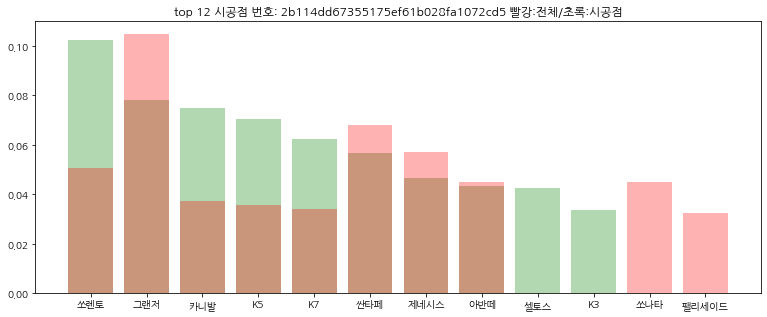

model
그랜저      0.130140
싼타페      0.084874
아반떼      0.079593
제네시스     0.076952
코나       0.070162
쏘나타      0.061109
팰리세이드    0.050924
투싼       0.048284
스파크      0.035836
쏘렌토      0.030555
Name: regist_dt, dtype: float64


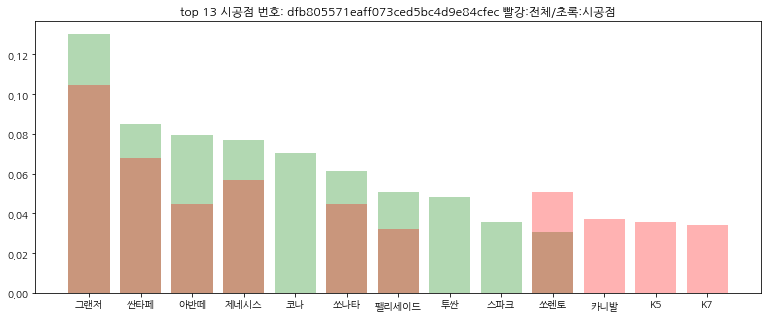

model
그랜저      0.107072
제네시스     0.073884
싼타페      0.067957
카니발      0.055709
쏘렌토      0.055314
K7       0.042276
쏘나타      0.040300
K5       0.036744
티볼리      0.035954
팰리세이드    0.032793
Name: regist_dt, dtype: float64


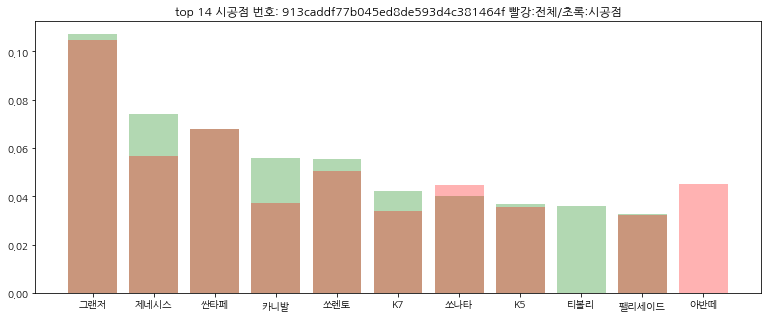

model
쏘렌토      0.098072
그랜저      0.085080
카니발      0.080889
K5       0.079631
싼타페      0.062448
K7       0.062448
셀토스      0.050293
제네시스     0.045683
아반떼      0.040235
팰리세이드    0.038558
Name: regist_dt, dtype: float64


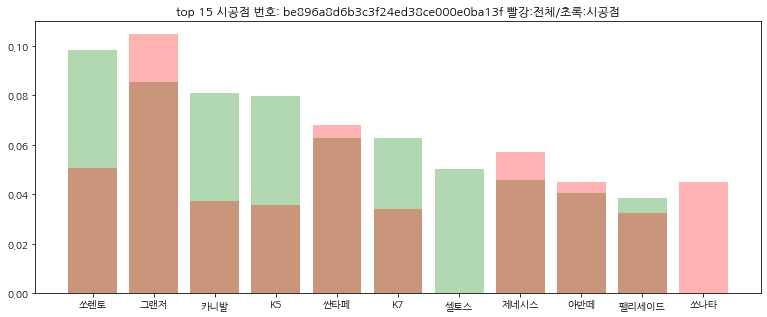

model
그랜저     0.095118
카니발     0.073232
쏘렌토     0.071549
제네시스    0.051347
K7      0.047559
싼타페     0.044192
K5      0.043771
쏘나타     0.043350
아반떼     0.031566
스포티지    0.027357
Name: regist_dt, dtype: float64


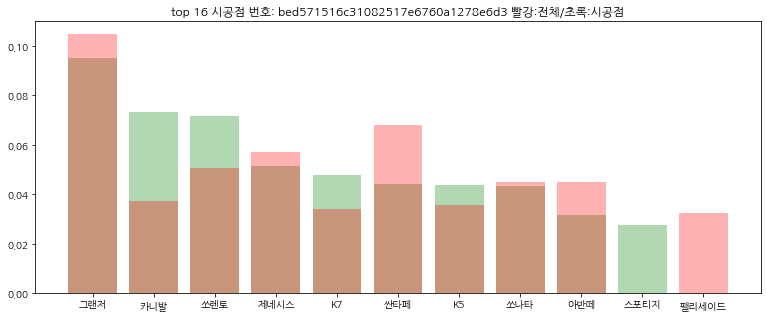

model
그랜저     0.111996
싼타페     0.073041
쏘렌토     0.071713
K7      0.052678
K5      0.045595
제네시스    0.043825
아반떼     0.038955
카니발     0.038955
쏘나타     0.038070
K3      0.035414
Name: regist_dt, dtype: float64


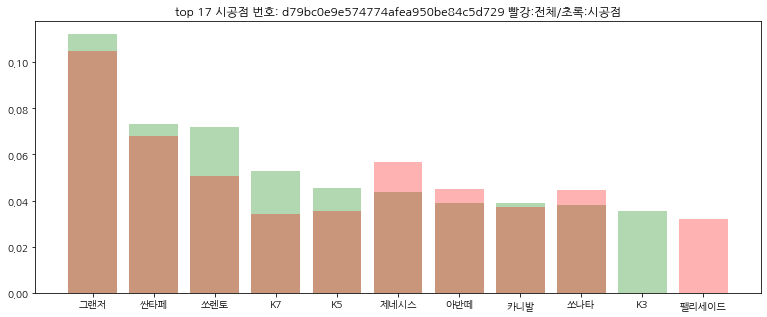

model
그랜저      0.106088
제네시스     0.069382
싼타페      0.064011
아반떼      0.046553
쏘나타      0.045658
쏘렌토      0.042972
K7       0.041182
카니발      0.036258
코나       0.035363
팰리세이드    0.032677
Name: regist_dt, dtype: float64


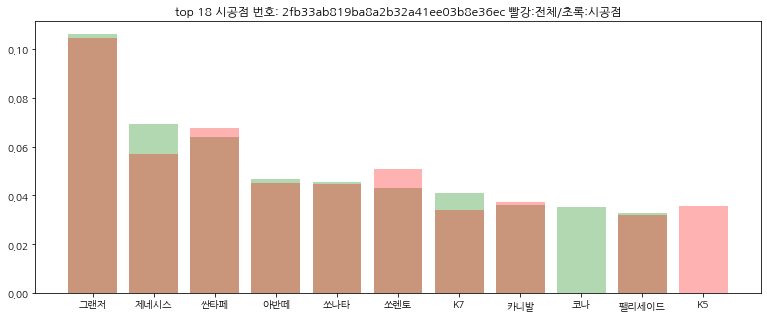

model
그랜저        0.115507
쏘렌토        0.061392
아반떼        0.059573
싼타페        0.059118
스파크        0.052296
K7         0.047294
쏘나타        0.045475
제네시스       0.044111
렉스턴 스포츠    0.038199
K5         0.035016
Name: regist_dt, dtype: float64


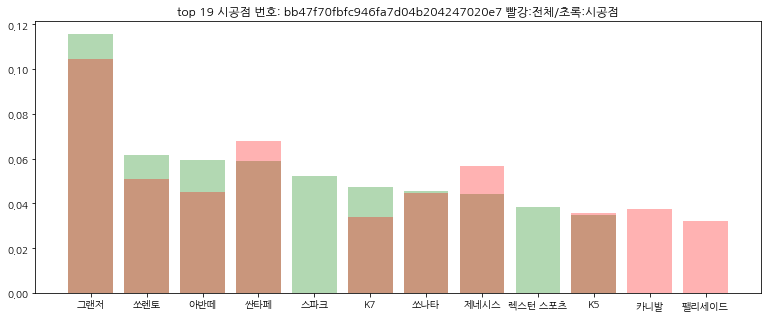

model
그랜저      0.135763
싼타페      0.096128
제네시스     0.090661
카니발      0.056492
팰리세이드    0.049203
쏘나타      0.044191
아반떼      0.041458
투싼       0.036902
쏘렌토      0.036446
K5       0.029613
Name: regist_dt, dtype: float64


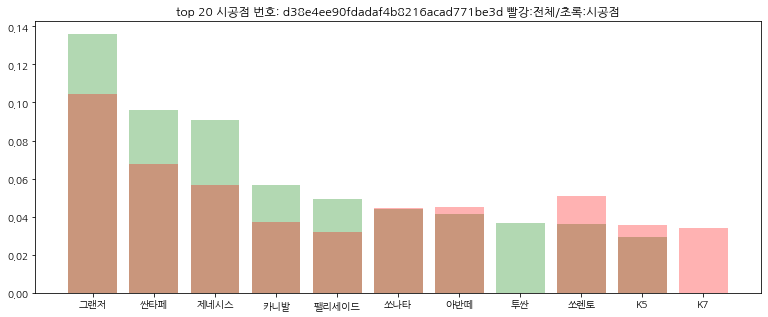

In [74]:
#메이커별 시공비율
total_counts = total_df_item_store.groupby(['model'])['regist_dt'].count()/len(total_df_item_store)
print(total_counts.sort_values(ascending=False)[0:10])
plt.figure(figsize = (13,5))
plt.title('전체 시공 비율')
plt.bar(x = total_counts.sort_values(ascending=False)[0:10].index, height = total_counts.sort_values(ascending=False)[0:10])
plt.show()

for i in top_stores[0:20]:
  counts = total_df_item_store[total_df_item_store['store'] == i].groupby(['model'])['regist_dt'].count().sort_values(ascending=False)[0:10]/len(total_df_item_store[total_df_item_store['store'] == i])
  print(counts)
  plt.figure(figsize = (13,5))
  plt.title(f'top {top_stores.index(i)+1} 시공점 번호: '+i+' 빨강:전체/초록:시공점')
  plt.bar(x = counts.index, height = counts, color='green', alpha=.3)
  plt.bar(x = total_counts.sort_values(ascending=False)[0:10].index, height = total_counts.sort_values(ascending=False)[0:10], color='red', alpha=.3)
  plt.show()

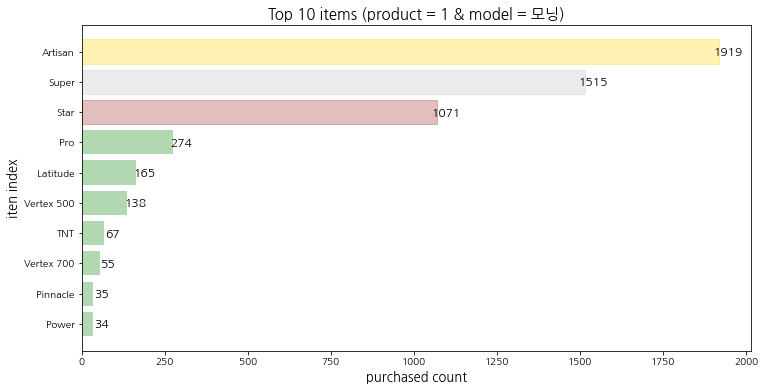

In [9]:
# EDA 예시 : 아이템 위치와 차량 모델명을 input으로 넣으면 top 10 시공이 많이된 아이템을 뽑는 예시

def EDA_item_model(location, model_name): # 다른 조건을 추가하고 싶다면 파라미터를 추가하면 됨

  # top 10 뽑는 과정 (조건 변경 가능) # product_%d_name 대신 product_%d 도 사용 가능 (int -> string 처리를 해주어야 함에 주의)
  item_rank = total_df_item.loc[total_df_item.model == model_name, 'product_%d_name' %location].value_counts().iloc[:10].iloc[::-1]

  # 시각화 코드
  plt.figure(figsize = (12, 6))
  bar = plt.barh(item_rank.index, item_rank, color='green', alpha = 0.3)

  # 그래프 옆에 숫자 표시
  for rect in bar:
      width = rect.get_width()
      plt.text(width + 25, rect.get_y() + rect.get_height()/4.0, '%d' %width, ha='center', va='bottom', size = 12)

  # 금은동 색칠
  bar[-1].set_color(c = 'gold')
  bar[-2].set_color(c = 'silver')
  bar[-3].set_color(c = 'brown')

  # 제목, 축 이름
  plt.title('Top 10 items (product = %d & model = %s)' % (location, model_name), size = 15)
  plt.xlabel('purchased count', size = 13)
  plt.ylabel('iten index', size = 13)
  plt.show()

EDA_item_model(1, '모닝')

count       195.000000
mean     516826.210256
std       74913.214075
min       50000.000000
25%      520000.000000
50%      520000.000000
75%      520000.000000
max      810000.000000
Name: price, dtype: float64


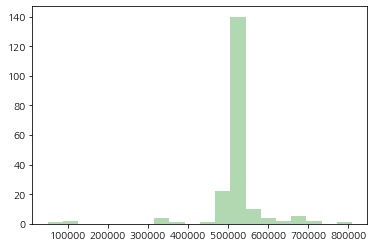

In [ ]:
# EDA 예시 : 조건 설정시 가격 분포 추출 (사용법 : Notion 내 Brainstorming 문서 참조)

def Price_Dist(df, model, store, dealer, product):
  condition_1 = True; condition_2 = True; condition_3 = True; condition_4 = True
  if model: condition_1 = df['model'] == model
  if store: condition_2 = df['store'] == store
  if (dealer == 0) | (dealer == 1): condition_3 = df['by_dealer'] == dealer
  if product:
    for i in range(6):
      if product[i]:
        col = 'product_%d' % (i + 1) # 이 부분 'product_%d_name'으로 바꾸면 item name을 기준으로 검색 가능
        condition_4 = (condition_4) & (df[col] == product[i])
  prices = df.loc[(condition_1) & (condition_2) & (condition_3) & (condition_4), 'price']
  # prices = prices.loc[prices < prices.quantile(0.95)] # 상위 5% 이상치 제거 가능 (숫자 변경 가능)
  print(prices.describe())
  plt.hist(prices, bins = 20, color = 'green', alpha = 0.3)
  plt.show()

Price_Dist(total_df_item, '말리부', None, 0, [284, None, None, None, None, None])

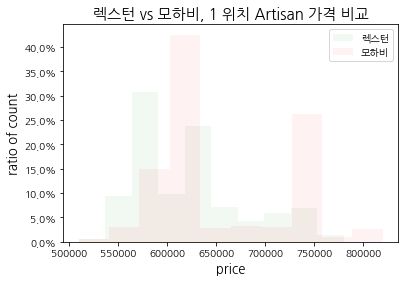

In [ ]:
# EDA 예시 : 두 차종의 특정 위치, 특정 상품의 가격분포 비교 (ex : 렉스턴 vs 모하비, 1번 위치에 Artisan이 시공된 경우에 대해서 보고 싶을 때)
# 다만, 다른 위치의 상품은 따로 고려해두지는 않았음

from matplotlib.ticker import PercentFormatter

def Compare_Price(df, car1, car2, location, item_name):
  car1_price = df.loc[(df['model'] == car1) & (df['product_%d_name' % location] == item_name), 'price'] # product_%d 로 item number 대신 사용 가능
  car2_price = df.loc[(df['model'] == car2) & (df['product_%d_name' % location] == item_name), 'price']
  car1_price = car1_price.loc[(car1_price < car1_price.quantile(0.95)) & (car1_price > car1_price.quantile(0.05))] # 상, 하위 5%는 제거
  car2_price = car2_price.loc[(car2_price < car2_price.quantile(0.95)) & (car2_price > car2_price.quantile(0.05))] # (숫자 변경 가능)
  plt.hist(car1_price, bins = 10, color = 'green', alpha = 0.05, label = '%s' % car1,\
          weights=np.ones(len(car1_price)) / len(car1_price)) # 전체 수 대비 차지하는 비율로 바꿔줌
  plt.hist(car2_price, bins = 10, color = 'red', alpha = 0.05, label = '%s' % car2,\
        weights=np.ones(len(car2_price)) / len(car2_price))
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  plt.title('%s vs %s, %d 위치 %s 가격 비교' % (car1, car2, location, item_name), size = 15)
  plt.xlabel('price', size = 13)
  plt.ylabel('ratio of count', size = 13)
  plt.legend()
  plt.show()
Compare_Price(total_df_item, '렉스턴', '모하비', 1, 'Artisan')

In [ ]:
!pip install haversine

In [ ]:
#위경도 거리 구하기

from haversine import haversine

# 위경도 입력
Seoul = total_df_item_store.latlng[10]  #Latitude, Longitude
Toronto = total_df_item_store.latlng[10000]

# 거리 계산
haversine(Seoul, Toronto, unit = 'km')

11.451124544824484

In [ ]:
import folium

mapm = folium.Map(location=[36.566345, 127.977893], zoom_start=7)

for i in df.latlng:
        folium.Circle(i, radius=5000).add_to(mapm)
return mapm

In [ ]:
import ast
def str_to_tuple(latlng):
  return float(ast.literal_eval(latlng)[0]),float(ast.literal_eval(latlng)[1])
total_df_item_store.latlng = total_df_item_store.latlng.map(lambda x: str_to_tuple(x))

In [ ]:
total_df_item_store.latlng[10]

(126.922874651726, 37.5070772373459)

In [ ]:
def distance(latlng1, latlng2, rad):
  if haversine(latlng1, latlng2, unit = 'km')<=rad:
    return True
  else:
    return False
Seoul = total_df_item_store.latlng[10]  #Latitude, Longitude
Toronto = total_df_item_store.latlng[10000]
distance(Seoul,Toronto,12)

True

count    5.519100e+04
mean     6.758190e+05
std      3.924505e+05
min      0.000000e+00
25%      3.800000e+05
50%      6.000000e+05
75%      8.400000e+05
max      1.640000e+07
Name: price, dtype: float64


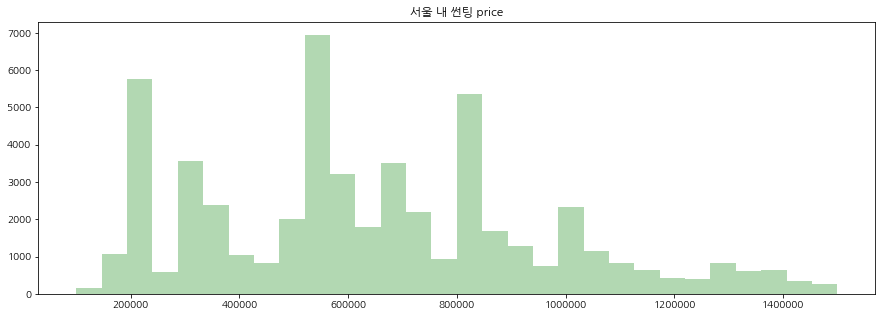

count    2.279200e+04
mean     6.874959e+05
std      3.594293e+05
min      0.000000e+00
25%      5.100000e+05
50%      6.000000e+05
75%      8.000000e+05
max      7.500000e+06
Name: price, dtype: float64


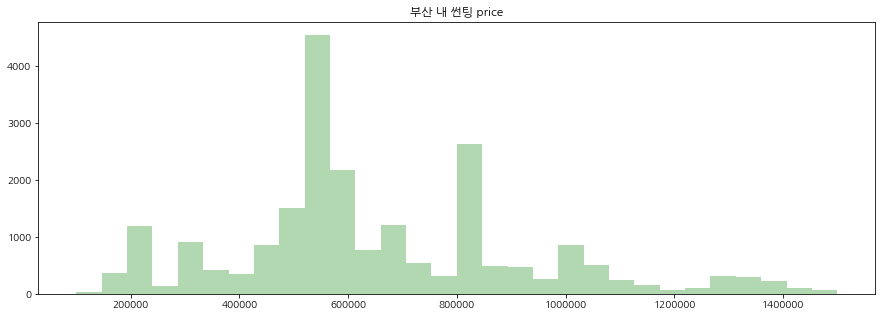

count    2.200700e+04
mean     5.488773e+05
std      2.856799e+05
min      0.000000e+00
25%      3.500000e+05
50%      5.500000e+05
75%      6.500000e+05
max      8.000000e+06
Name: price, dtype: float64


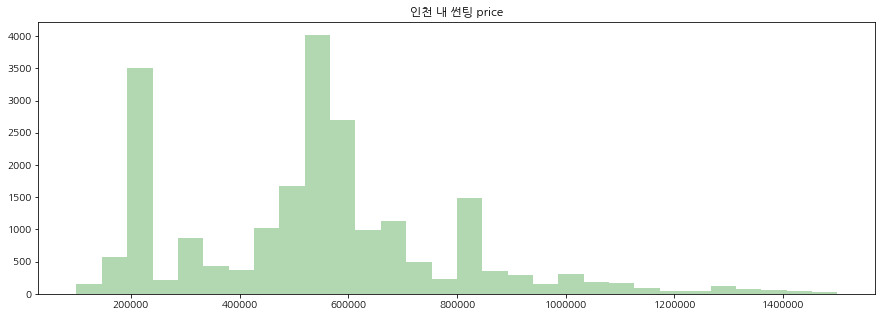

count    2.721200e+04
mean     6.496374e+05
std      3.169338e+05
min      0.000000e+00
25%      5.000000e+05
50%      5.800000e+05
75%      7.800000e+05
max      1.300000e+07
Name: price, dtype: float64


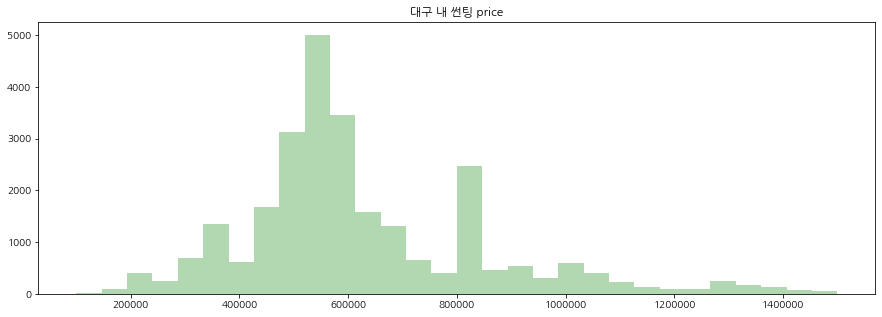

count    1.369000e+04
mean     6.461811e+05
std      2.979630e+05
min      0.000000e+00
25%      5.000000e+05
50%      5.800000e+05
75%      8.000000e+05
max      9.500000e+06
Name: price, dtype: float64


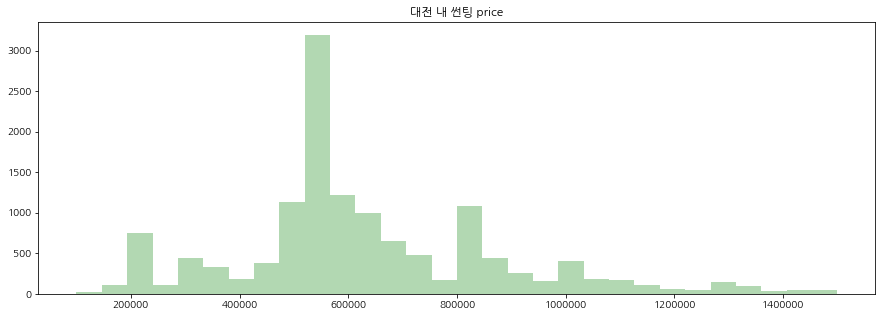

count    1.065000e+03
mean     4.705258e+05
std      3.145780e+05
min      0.000000e+00
25%      2.100000e+05
50%      4.700000e+05
75%      5.800000e+05
max      2.850000e+06
Name: price, dtype: float64


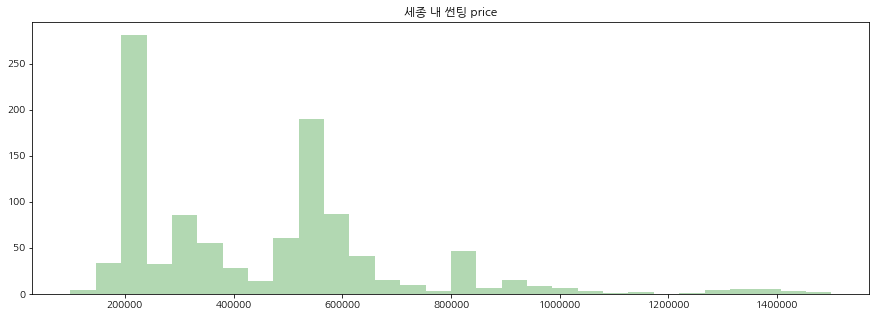

count    6.160000e+03
mean     6.944085e+05
std      3.716792e+05
min      9.900000e+02
25%      5.000000e+05
50%      6.000000e+05
75%      8.700000e+05
max      2.900000e+06
Name: price, dtype: float64


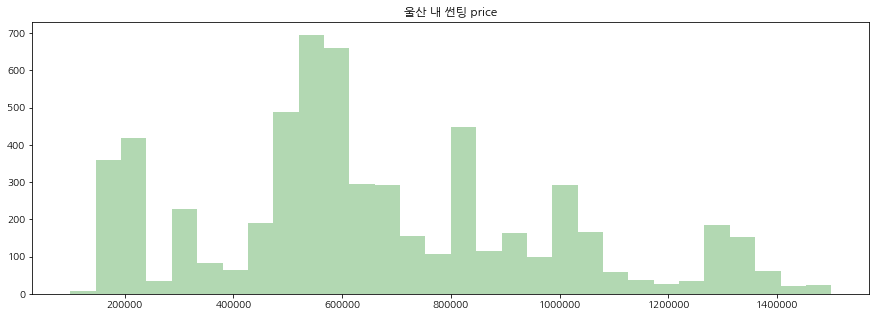

count    1.505500e+04
mean     6.481421e+05
std      3.265868e+05
min      0.000000e+00
25%      5.000000e+05
50%      5.800000e+05
75%      8.000000e+05
max      5.500000e+06
Name: price, dtype: float64


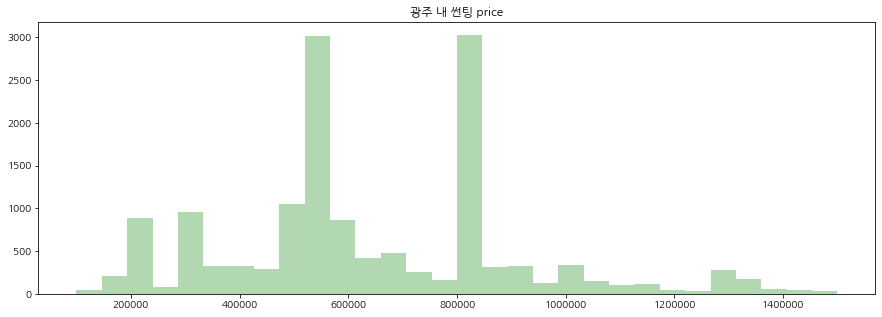

count    9.313900e+04
mean     6.513960e+05
std      7.043282e+06
min      0.000000e+00
25%      4.500000e+05
50%      5.800000e+05
75%      8.000000e+05
max      2.147484e+09
Name: price, dtype: float64


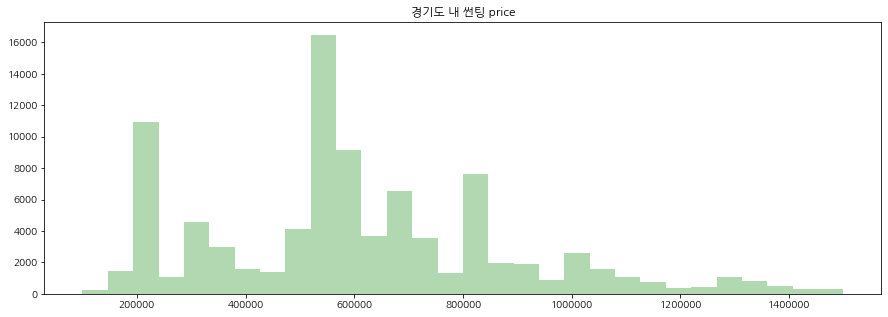

count    6.105000e+03
mean     5.222885e+05
std      3.508424e+05
min      0.000000e+00
25%      2.100000e+05
50%      4.500000e+05
75%      7.000000e+05
max      6.000000e+06
Name: price, dtype: float64


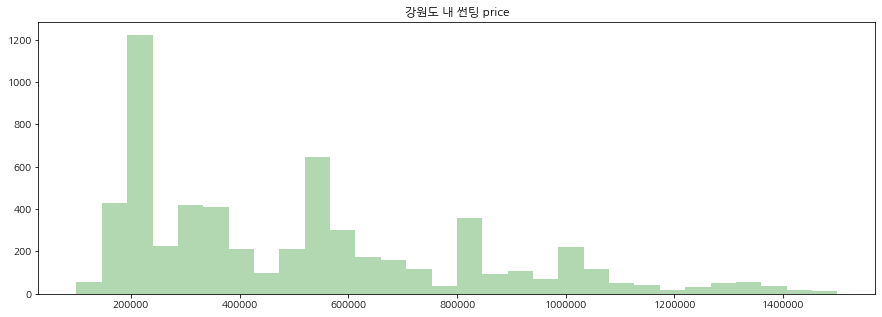

count    6.210000e+03
mean     5.875443e+05
std      3.646342e+05
min      0.000000e+00
25%      3.300000e+05
50%      5.200000e+05
75%      8.000000e+05
max      4.000000e+06
Name: price, dtype: float64


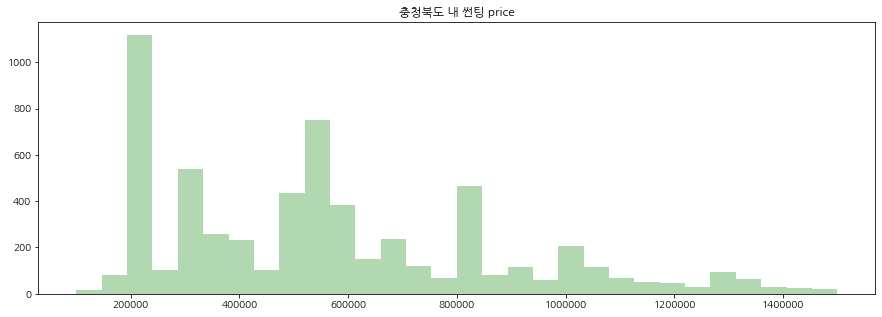

count    6.590000e+03
mean     7.443613e+05
std      4.830937e+05
min      0.000000e+00
25%      4.500000e+05
50%      6.650000e+05
75%      1.000000e+06
max      1.115000e+07
Name: price, dtype: float64


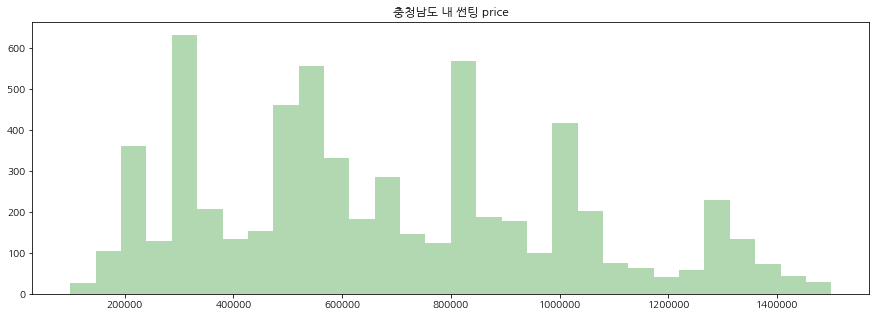

count    1.121100e+04
mean     5.825350e+05
std      3.055101e+05
min      0.000000e+00
25%      4.500000e+05
50%      5.200000e+05
75%      6.500000e+05
max      8.000000e+06
Name: price, dtype: float64


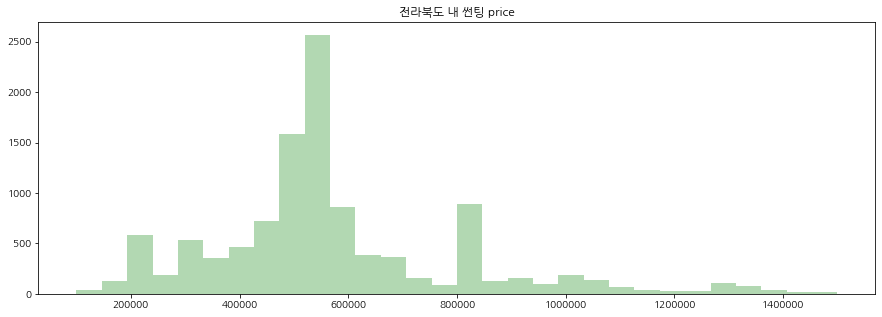

count    4.858000e+03
mean     6.790698e+05
std      3.062298e+05
min      0.000000e+00
25%      5.000000e+05
50%      6.000000e+05
75%      8.175000e+05
max      6.700000e+06
Name: price, dtype: float64


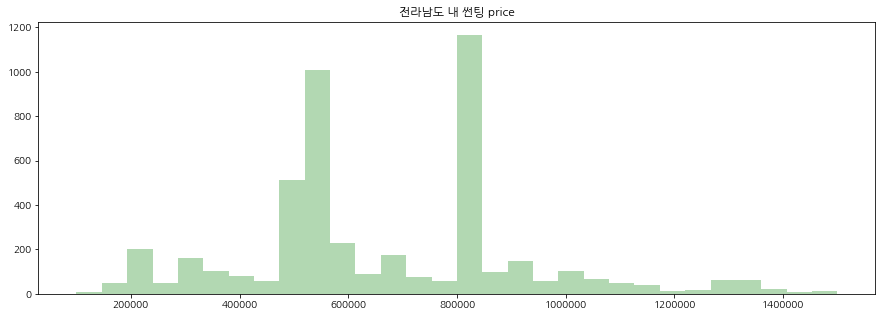

count    1.827100e+04
mean     6.349011e+05
std      3.416005e+05
min      0.000000e+00
25%      4.800000e+05
50%      5.500000e+05
75%      8.000000e+05
max      7.800000e+06
Name: price, dtype: float64


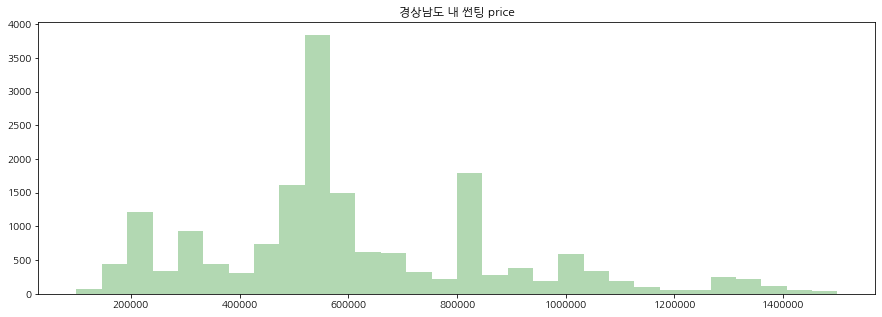

count    1.463600e+04
mean     6.326948e+05
std      3.258762e+05
min      0.000000e+00
25%      5.000000e+05
50%      5.500000e+05
75%      7.100000e+05
max      1.000000e+07
Name: price, dtype: float64


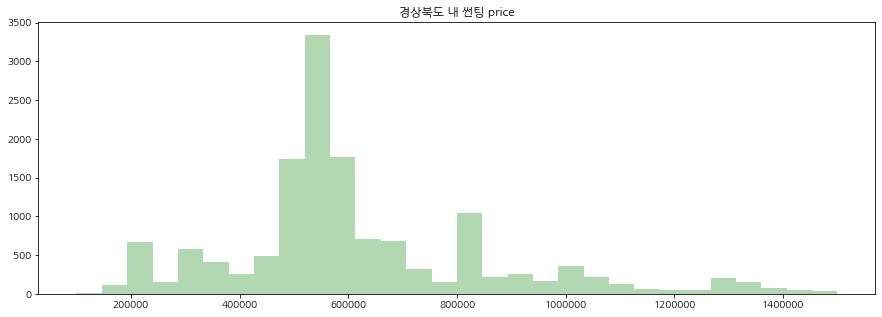

In [ ]:
def Price_Dist_city(df, model, store, dealer, city, product):
  condition_1 = True; condition_2 = True; condition_3 = True; condition_4 = True
  if model: condition_1 = df['model'] == model
  if store: condition_2 = df['store'] == store
  if city: condition_5 = df['city'] == city
  if (dealer == 0) | (dealer == 1): condition_3 = df['by_dealer'] == dealer
  if product:
    for i in range(6):
      if product[i]:
        col = 'product_%d' % (i + 1) # 이 부분 'product_%d_name'으로 바꾸면 item name을 기준으로 검색 가능
        condition_4 = (condition_4) & (df[col] == product[i])
  prices = df.loc[(condition_1) & (condition_2) & (condition_3) & (condition_4) & (condition_5), 'price']
  # prices = prices.loc[prices < prices.quantile(0.95)] # 상위 5% 이상치 제거 가능 (숫자 변경 가능)
  print(prices.describe())
  plt.figure(figsize = (15,5))
  plt.hist(prices, bins = 30, color = 'green', alpha = 0.3, range = (100000,1500000))
  plt.title(city + ' 내 썬팅 price')
  ax = plt.gca()
  ax.get_xaxis().get_major_formatter().set_scientific(False)
  plt.show()
for i in pd.Series(city_dict.values()).unique():
  Price_Dist_city(total_df_item_store, None, None, 0, i, [None, None, None, None, None, None])

In [ ]:
pd.Series(city_dict.values()).unique()

array(['서울', '부산', '인천', '대구', '대전', '세종', '울산', '광주', '경기도', '강원도',
       '충청북도', '충청남도', '전라북도', '전라남도', '경상남도', '경상북도'], dtype=object)

In [ ]:
"""'서울광역시': '서울','서울' : '서울','서울시' : '서울',""".replace('서울','광주')

"'광주광역시': '광주','광주' : '광주','광주시' : '광주',"

In [ ]:
city_dict = {
    '서울특별시': '서울',
    '서울' : '서울',
    '서울시' : '서울',
    '부산광역시': '부산','부산' : '부산','부산시' : '부산',
    '인천광역시': '인천','인천' : '인천','인천시' : '인천',
    '대구광역시': '대구','대구' : '대구','대구시' : '대구',
    '대전광역시': '대전','대전' : '대전','대전시' : '대전',
    '세종특별시': '세종','세종' : '세종','세종시' : '세종',
    '울산광역시': '울산','울산' : '울산','울산시' : '울산',
    '광주광역시': '광주','광주' : '광주','광주시' : '광주',
    '경기도':'경기도', '경기':'경기도',
    '강원도':'강원도','강원' :'강원도',
    '충북':'충청북도','충청북도':'충청북도',
    '충남':'충청남도','충청남도':'충청남도',
    '전라북도':'전라북도','전북':'전라북도',
    '전라남도':'전라남도','전남':'전라남도',
    '경상남도':'경상남도','경남':'경상남도',
    '경상북도':'경상북도','경북':'경상북도'
}

In [ ]:
total_df_item_store['city'] = total_df_item_store.store_addr.map(lambda x: city_dict[x.split(' ')[0]] if str(x).split(' ')[0] in city_dict.keys() else None)

In [ ]:
total_df_item_store['city']

0           서울
1           서울
2           서울
3           서울
4           서울
          ... 
395884      대구
395885      대구
395886      대구
395887      대구
395888    전라남도
Name: city, Length: 395889, dtype: object

In [ ]:
'서울' in city_dict.keys()

True

<BarContainer object of 16 artists>

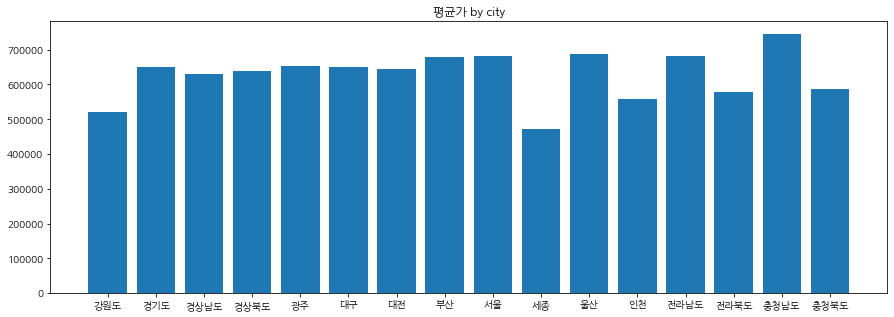

In [ ]:
plt.figure(figsize = (15,5))
plt.title('평균가 by city')
plt.bar(total_df_item_store.groupby('city').price.mean().index,total_df_item_store.groupby('city').price.mean())

In [ ]:
total_df_item_store.groupby('city').price.mean()

city
강원도     521317.707522
경기도     649430.349702
경상남도    629993.703399
경상북도    638053.741564
광주      654143.319701
대구      651661.996094
대전      644993.563665
부산      680117.239788
서울      682218.601350
세종      470525.821596
울산      688276.978232
인천      559193.104247
전라남도    681036.814547
전라북도    578599.968102
충청남도    744684.927892
충청북도    586843.050847
Name: price, dtype: float64

In [ ]:
total_df_item_store[total_df_item_store['city'].isnull()]

,Unnamed: 0,regist_dt,car,store,store_addr,price,pay_kind,by_dealer,product_1,product_2,product_3,product_4,product_5,product_6,name,model,maker,product_1_name,product_2_name,product_3_name,product_4_name,product_5_name,product_6_name,latlng,predicted_name,city
279,1,20201231164930,K7,bb6a02da9253f463cbbdecf49352246a,대덕구 중리동 394-16,500000,1,0,85.0,85.0,NaN,85.0,87.0,NaN,K7,K7,기아,Star,Star,NaN,Star,Star,NaN,"(127.422028942973, 36.362669276244)",3M썬팅 대전중리점,None
280,74,20201228141809,K5,bb6a02da9253f463cbbdecf49352246a,대덕구 중리동 394-16,500000,1,0,85.0,85.0,NaN,85.0,87.0,NaN,K5,K5,기아,Star,Star,NaN,Star,Star,NaN,"(127.422028942973, 36.362669276244)",3M썬팅 대전중리점,None
281,143,20201223125224,레이,bb6a02da9253f463cbbdecf49352246a,대덕구 중리동 394-16,470000,1,0,85.0,85.0,NaN,85.0,87.0,NaN,레이,레이,기아,Star,Star,NaN,Star,Star,NaN,"(127.422028942973, 36.362669276244)",3M썬팅 대전중리점,None
282,190,20201221115251,K7,bb6a02da9253f463cbbdecf49352246a,대덕구 중리동 394-16,500000,1,0,283.0,283.0,NaN,283.0,87.0,NaN,K7,K7,기아,Super,Super,NaN,Super,Star,NaN,"(127.422028942973, 36.362669276244)",3M썬팅 대전중리점,None
283,373,20201211101307,K7,bb6a02da9253f463cbbdecf49352246a,대덕구 중리동 394-16,500000,1,0,85.0,85.0,NaN,85.0,87.0,NaN,K7,K7,기아,Star,Star,NaN,Star,Star,NaN,"(127.422028942973, 36.362669276244)",3M썬팅 대전중리점,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394966,382022,20180329082349,QM6,cf2a9ebe3f72689681f82840f145f339,제주도 제주시 구남동6길,580000,1,0,33.0,33.0,NaN,33.0,37.0,NaN,QM6,QM6,르노삼성,Artisan,Artisan,NaN,Artisan,Artisan,NaN,"(126.535150477776, 33.4870856032914)",Unknown,None
394967,382023,20180329082113,싼타페TM,cf2a9ebe3f72689681f82840f145f339,제주도 제주시 구남동6길,1100000,1,0,25.0,25.0,NaN,25.0,195.0,27.0,싼타페TM,싼타페,현대,Latitude,Latitude,NaN,Latitude,Bisanti,Latitude,"(126.535150477776, 33.4870856032914)",Unknown,None
394968,385132,20180315103149,올뉴쏘렌토,cf2a9ebe3f72689681f82840f145f339,제주도 제주시 구남동6길,580000,1,0,33.0,47.0,NaN,47.0,37.0,NaN,올뉴쏘렌토,쏘렌토,기아,Artisan,Artisan,NaN,Artisan,Artisan,NaN,"(126.535150477776, 33.4870856032914)",Unknown,None
394969,388144,20180226155250,QM6,cf2a9ebe3f72689681f82840f145f339,제주도 제주시 구남동6길,910000,1,0,25.0,25.0,NaN,25.0,195.0,NaN,QM6,QM6,르노삼성,Latitude,Latitude,NaN,Latitude,Bisanti,NaN,"(126.535150477776, 33.4870856032914)",Unknown,None


In [ ]:
None == None

True